<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/TEST_1701-1750.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11013]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [11014]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

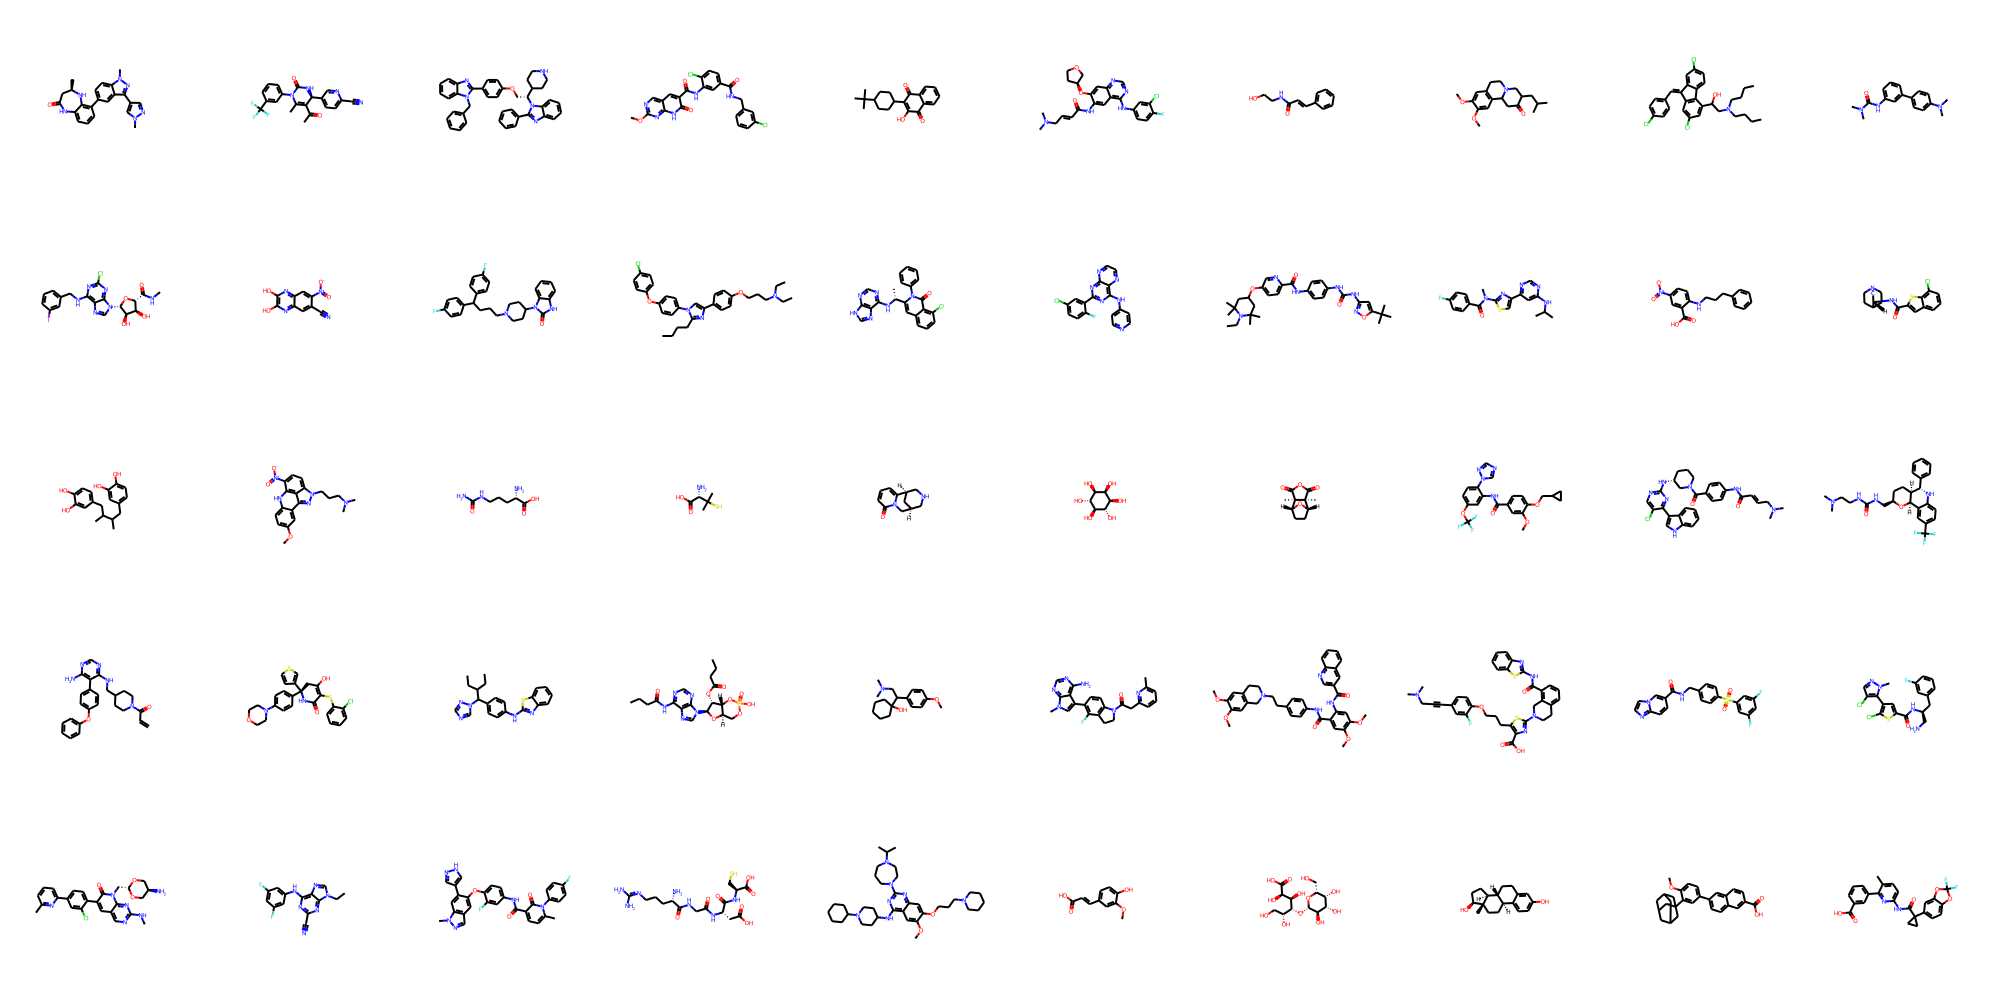

In [11015]:
smiles_list = [

'C[C@@H]1CC(=O)Nc2cccc(-c3ccc4c(c3)c(-c3cnn(C)c3)nn4C)c2N1',
'CC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N[C@H]1c1ccc(C#N)nc1',
'c1ccc(Cn2c(-c3ccc(OC[C@H](C4CCNCC4)n4c(-c5ccccc5)nc5ccccc54)cc3)nc3ccccc32)cc1',
'COc1ncc2cc(C(=O)Nc3cc(C(=O)NCc4cccc(Cl)c4)ccc3Cl)c(=O)[nH]c2n1',
'CC(C)(C)C1CCC(C2=C(O)C(=O)c3ccccc3C2=O)CC1',
'CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1',
'O=C(/C=C/c1ccccc1)NCCO',
'COc1cc2c(cc1OC)C1CC(=O)C(CC(C)C)CN1CC2',
'CCCCN(CCCC)CC(O)c1cc(Cl)cc2c1-c1ccc(Cl)cc1/C2=C/c1ccc(Cl)cc1',
'CN(C)C(=O)Nc1cccc(-c2ccc(N(C)C)cc2)c1',
'CNC(=O)[C@H]1O[C@@H](n2cnc3c(NCc4cccc(I)c4)nc(Cl)nc32)[C@H](O)[C@@H]1O',
'N#Cc1cc2nc(O)c(O)nc2cc1[N+](=O)[O-]',
'O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc(F)cc2)CC1',
'CCCCc1nc(-c2ccc(OCCCN(CC)CC)cc2)cn1-c1ccc(Oc2ccc(Cl)cc2)cc1',
'C[C@@H](Nc1ncnc2[nH]cnc12)c1cc2cccc(Cl)c2c(=O)n1-c1ccccc1',
'Fc1ccc(Cl)cc1-c1nc(Nc2ccncc2)c2nccnc2n1',
'CCN1C(C)(C)CC(Oc2ccc(C(=O)Nc3ccc(NC(=O)Nc4cc(C(C)(C)C)on4)cc3)nc2)CC1(C)C',
'CC(C)Nc1cc(-c2csc(N(C)C(=O)c3ccc(F)cc3)n2)ncn1',
'O=C(O)c1cc([N+](=O)[O-])ccc1NCCCc1ccccc1',
'O=C(N[C@H]1CN2CCC1CC2)c1cc2cccc(Cl)c2s1',
'CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1',
'COc1ccc2c(c1)-c1nn(CCCN(C)C)c3ccc([N+](=O)[O-])c(c13)N2',
'NC(=O)NCCC[C@H](N)C(=O)O',
'CC(C)(S)[C@@H](N)C(=O)O',
'O=c1cccc2n1C[C@@H]1CNC[C@H]2C1',
'O[C@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](O)[C@H]1O',
'C[C@]12C(=O)OC(=O)[C@@]1(C)[C@@H]1CC[C@H]2O1',
'COc1cc(C(=O)Nc2cc(OC(F)(F)F)ccc2-n2cncn2)ccc1OCC1CC1',
'CN(C)C/C=C/C(=O)Nc1ccc(C(=O)N2CCC[C@@H](Nc3ncc(Cl)c(-c4c[nH]c5ccccc45)n3)C2)cc1',
'CN(C)CCNC(=O)NC[C@H]1CC[C@@H]2[C@H](O1)c1cc(C(F)(F)F)ccc1N[C@H]2c1ccccc1',
'C=CC(=O)N1CCC(CNc2ncnc(N)c2-c2ccc(Oc3ccccc3)cc2)CC1',
'O=C1N[C@](c2ccc(N3CCOCC3)cc2)(c2ccsc2)CC(O)=C1Sc1ccccc1Cl',
'CCC(CC)C(c1ccc(Nc2nc3ccccc3s2)cc1)n1cncn1',
'CCCC(=O)Nc1ncnc2c1ncn2[C@@H]1O[C@@H]2COP(=O)(O)O[C@H]2[C@H]1OC(=O)CCC',
'COc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1',
'Cc1cccc(CC(=O)N2CCc3c2ccc(-c2cn(C)c4ncnc(N)c24)c3F)n1',
'COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3cc(OC)c(OC)cc3NC(=O)c3cnc4ccccc4c3)cc1)CC2',
'CN(C)CC#Cc1ccc(OCCCc2sc(N3CCc4cccc(C(=O)Nc5nc6ccccc6s5)c4C3)nc2C(=O)O)c(F)c1',
'O=C(NCc1ccc(S(=O)(=O)c2cc(F)cc(F)c2)cc1)c1ccc2nccn2c1',
'Cn1ncc(Cl)c1-c1cc(C(=O)N[C@H](CN)Cc2cccc(F)c2)sc1Cl',
'CNc1ncc2cc(-c3ccc(-c4cccc(C)n4)cc3Cl)c(=O)n(C[C@H]3OC[C@H](N)CO3)c2n1',
'CCn1cnc2c(Nc3cc(F)cc(F)c3)nc(C#N)nc21',
'Cc1ccc(C(=O)Nc2ccc(Oc3cc4cnn(C)c4cc3-c3cn[nH]c3)c(F)c2)c(=O)n1-c1ccc(F)cc1',
'NC(N)=NCCC[C@H](N)C(=O)NCC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CS)C(=O)O',
'COc1cc2c(NC3CCN(C4CCCCC4)CC3)nc(N3CCCN(C(C)C)CC3)nc2cc1OCCCN1CCCCC1',
'COc1cc(/C=C/C(=O)O)ccc1O',
'O=C(O)[C@H](O)[C@@H](O)[C@H](O[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O)[C@H](O)CO',
'C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C@@H]2O',
'COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC(C3)C1)C2',
'Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-c1cccc(C(=O)O)c1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



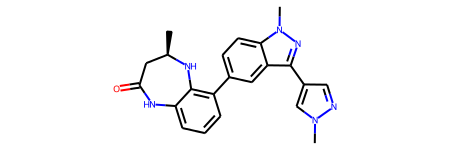

In [11016]:
M1 = mol_list [0]
M1

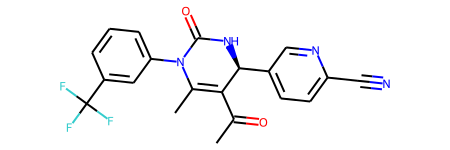

In [11017]:
M2 = mol_list [1]
M2

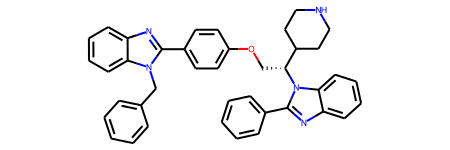

In [11018]:
M3 = mol_list [2]
M3

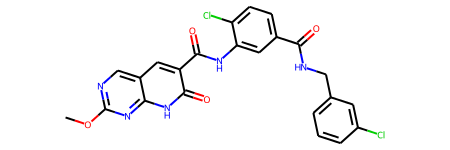

In [11019]:
M4 = mol_list [3]
M4

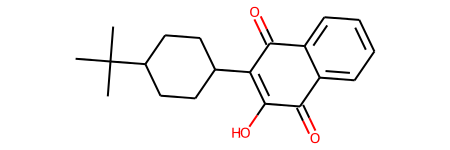

In [11020]:
M5 = mol_list [4]
M5

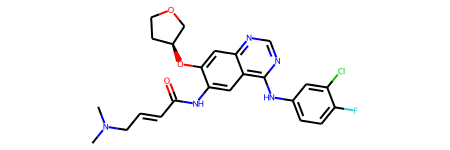

In [11021]:
M6 = mol_list [5]
M6

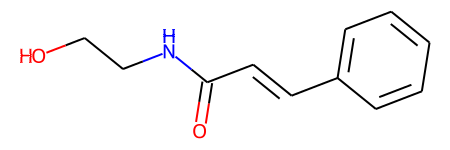

In [11022]:
M7 = mol_list [6]
M7

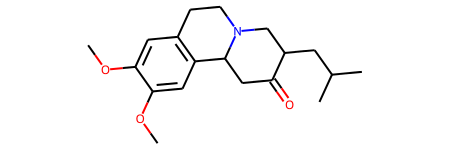

In [11023]:
M8 = mol_list [7]
M8

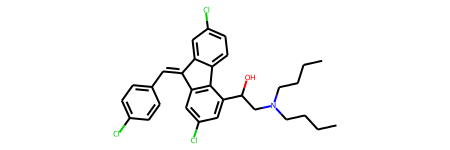

In [11024]:
M9 = mol_list [8]
M9

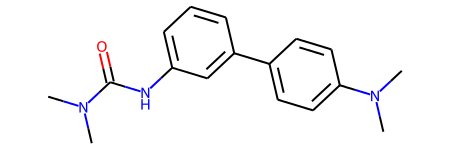

In [11025]:
M10 = mol_list [9]
M10

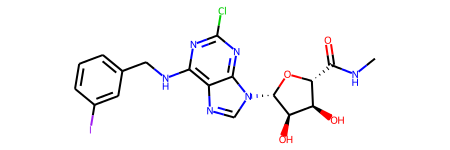

In [11026]:
M11 = mol_list [10]
M11

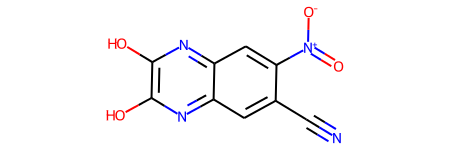

In [11027]:
M12 = mol_list [11]
M12

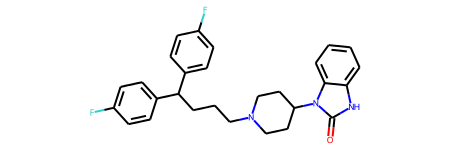

In [11028]:
M13 = mol_list [12]
M13

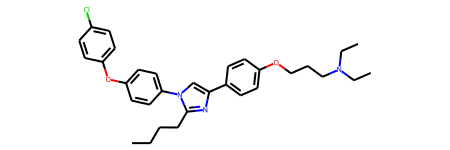

In [11029]:
M14 = mol_list [13]
M14

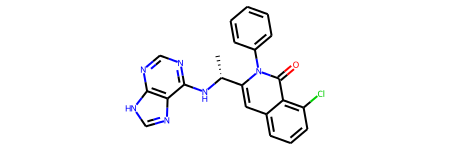

In [11030]:
M15 = mol_list [14]
M15

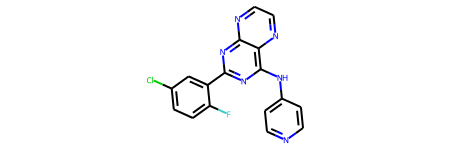

In [11031]:
M16 = mol_list [15]
M16

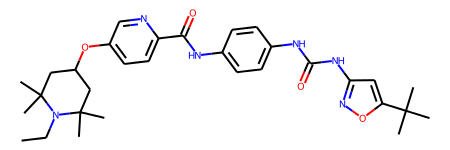

In [11032]:
M17 = mol_list [16]
M17

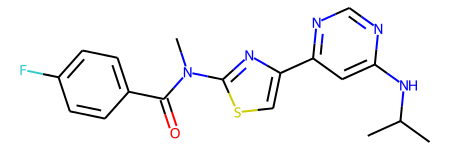

In [11033]:
M18 = mol_list [17]
M18

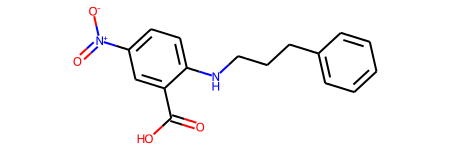

In [11034]:
M19 = mol_list [18]
M19

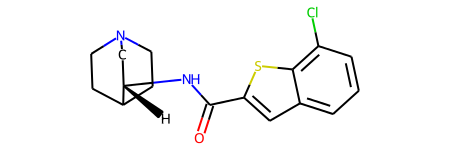

In [11035]:
M20 = mol_list [19]
M20

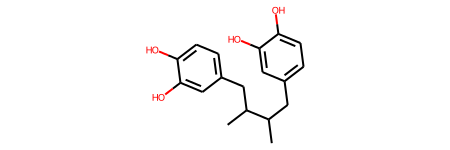

In [11036]:
M21 = mol_list [20]
M21

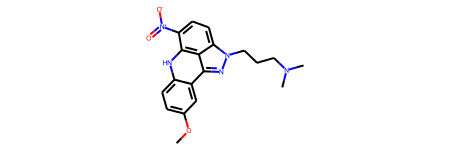

In [11037]:
M22 = mol_list [21]
M22

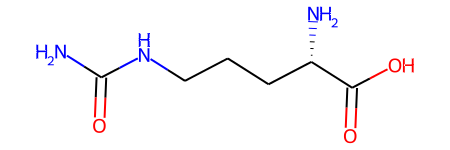

In [11038]:
M23 = mol_list [22]
M23

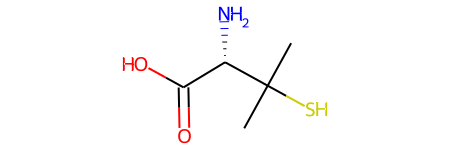

In [11039]:
M24 = mol_list [23]
M24

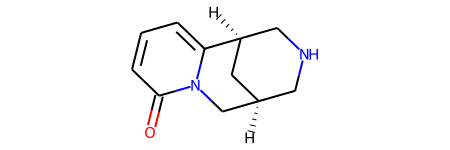

In [11040]:
M25 = mol_list [24]
M25

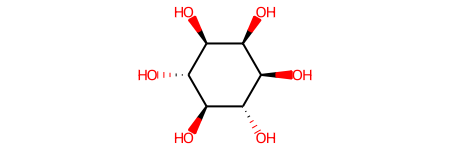

In [11041]:
M26 = mol_list [25]
M26

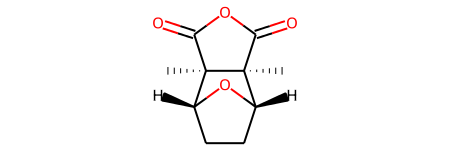

In [11042]:
M27 = mol_list [26]
M27

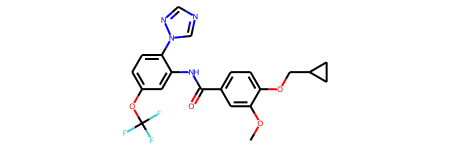

In [11043]:
M28 = mol_list [27]
M28

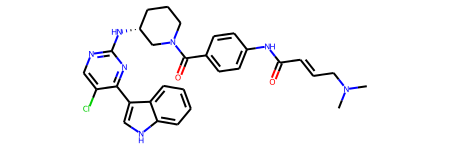

In [11044]:
M29 = mol_list [28]
M29

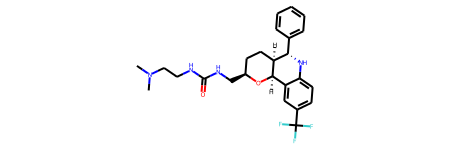

In [11045]:
M30 = mol_list [29]
M30

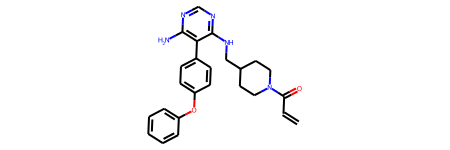

In [11046]:
M31 = mol_list [30]
M31

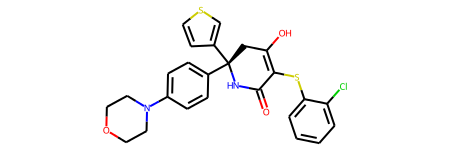

In [11047]:
M32 = mol_list [31]
M32

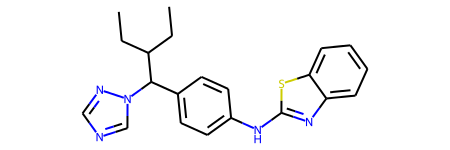

In [11048]:
M33 = mol_list [32]
M33

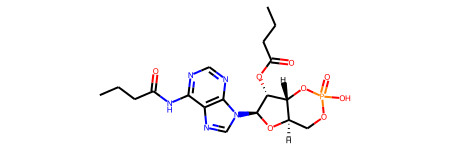

In [11049]:
M34 = mol_list [33]
M34

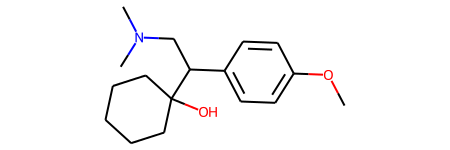

In [11050]:
M35 = mol_list [34]
M35

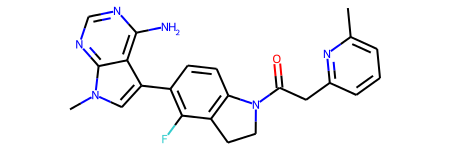

In [11051]:
M36 = mol_list [35]
M36

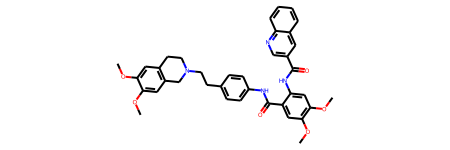

In [11052]:
M37= mol_list [36]
M37

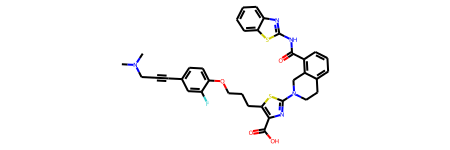

In [11053]:
M38= mol_list [37]
M38

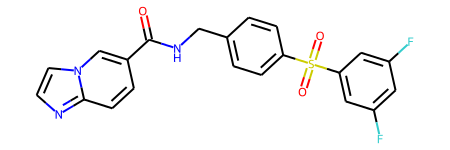

In [11054]:
M39= mol_list [38]
M39

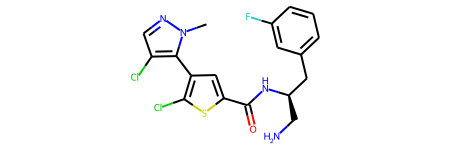

In [11055]:
M40= mol_list [39]
M40

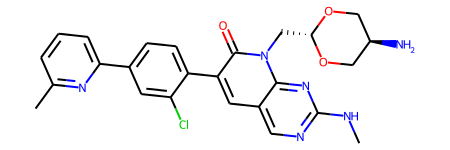

In [11056]:
M41= mol_list [40]
M41

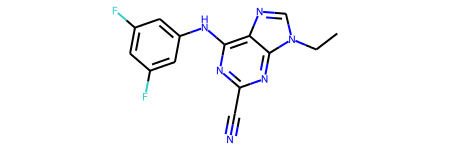

In [11057]:
M42= mol_list [41]
M42

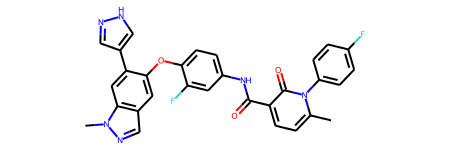

In [10929]:
M43= mol_list [42]
M43

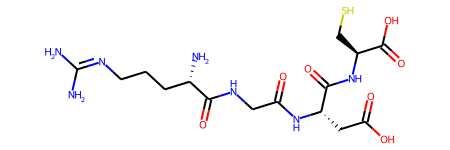

In [10930]:
M44= mol_list [43]
M44

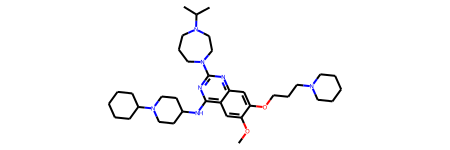

In [10931]:
M45= mol_list [44]
M45

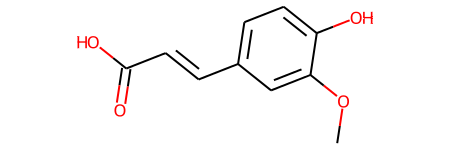

In [10932]:
M46= mol_list [45]
M46

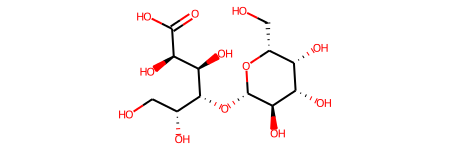

In [10933]:
M47= mol_list [46]
M47

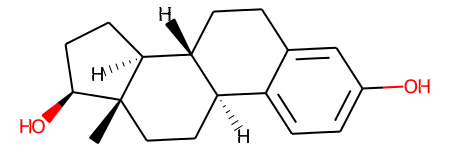

In [10934]:
M48= mol_list [47]
M48

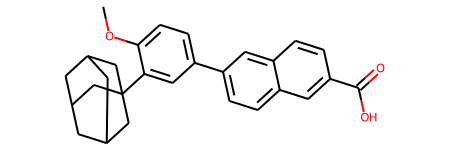

In [10935]:
M49= mol_list [48]
M49

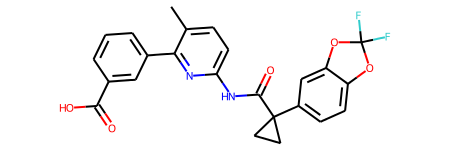

In [10936]:
M50= mol_list [49]
M50

In [11058]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[15,
 23,
 33,
 36,
 43,
 45,
 64,
 81,
 90,
 121,
 136,
 215,
 231,
 275,
 285,
 296,
 297,
 301,
 314,
 323,
 327,
 333,
 352,
 356,
 378,
 409,
 444,
 446,
 464,
 511,
 551,
 582,
 622,
 630,
 650,
 666,
 714,
 726,
 738,
 752,
 788,
 837,
 849,
 852,
 872,
 873,
 875,
 896,
 910,
 926,
 932,
 935,
 958,
 984,
 997,
 1019]

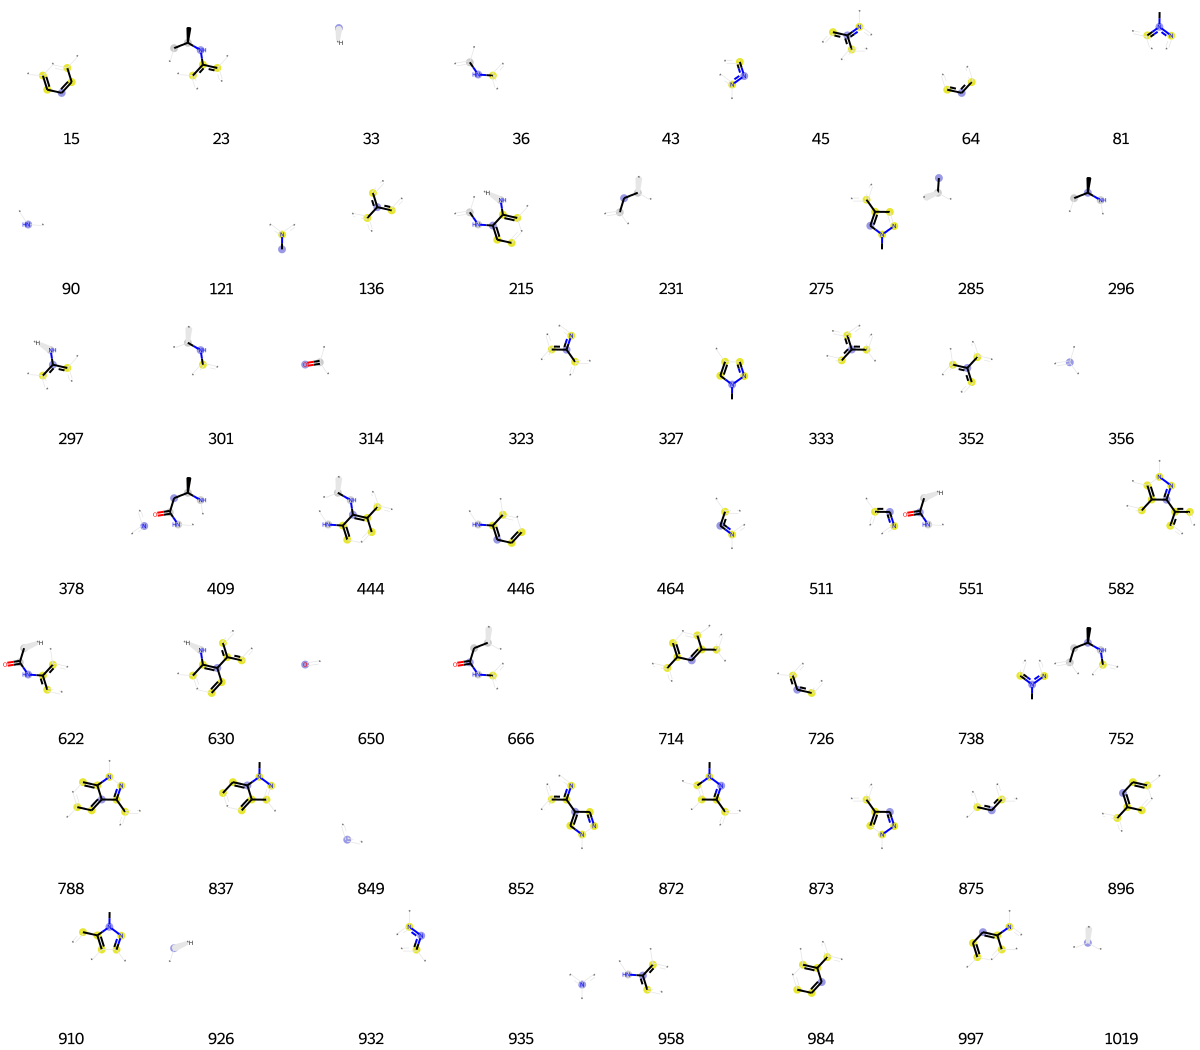

In [10938]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [11059]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[15,
 19,
 20,
 25,
 33,
 64,
 90,
 112,
 114,
 236,
 255,
 293,
 301,
 314,
 330,
 356,
 360,
 367,
 376,
 378,
 393,
 428,
 429,
 498,
 511,
 608,
 650,
 657,
 662,
 674,
 677,
 688,
 698,
 718,
 726,
 779,
 790,
 796,
 801,
 807,
 809,
 818,
 849,
 852,
 875,
 881,
 888,
 893,
 904,
 926,
 935,
 960,
 984,
 993,
 1017,
 1019]

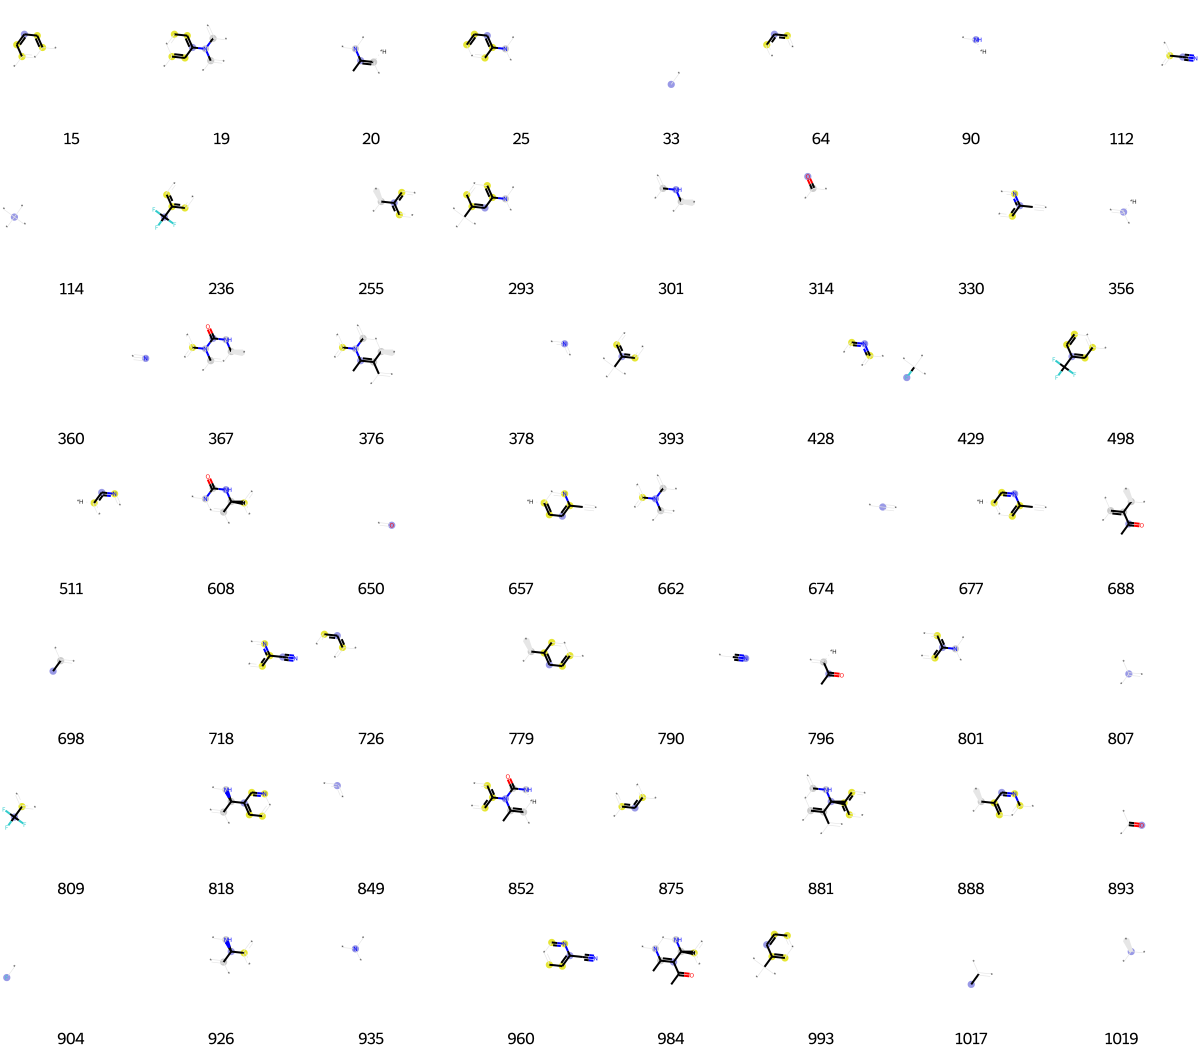

In [10940]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [11060]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 42,
 45,
 64,
 73,
 80,
 90,
 102,
 110,
 118,
 127,
 136,
 155,
 175,
 261,
 284,
 289,
 301,
 305,
 314,
 322,
 335,
 339,
 356,
 357,
 378,
 382,
 389,
 403,
 421,
 428,
 442,
 479,
 490,
 492,
 585,
 659,
 682,
 695,
 698,
 718,
 726,
 730,
 736,
 741,
 802,
 804,
 831,
 849,
 862,
 888,
 896,
 926,
 935,
 954,
 1019]

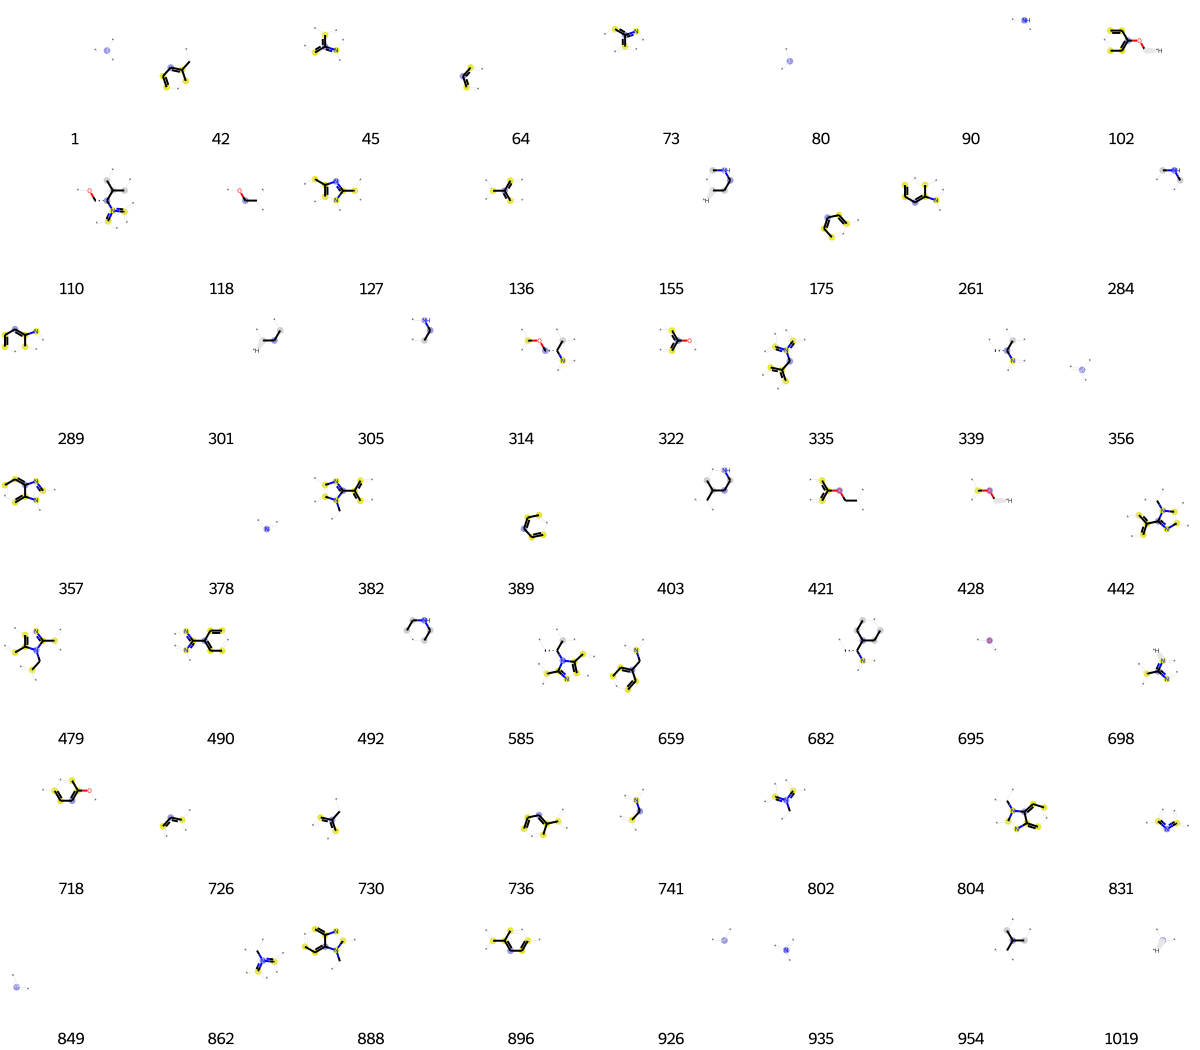

In [10942]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [11061]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[15,
 33,
 42,
 64,
 80,
 84,
 90,
 115,
 128,
 165,
 197,
 200,
 216,
 255,
 265,
 314,
 356,
 360,
 361,
 365,
 366,
 371,
 378,
 391,
 428,
 486,
 510,
 511,
 512,
 514,
 526,
 549,
 561,
 592,
 594,
 614,
 650,
 659,
 666,
 673,
 695,
 721,
 725,
 726,
 730,
 750,
 755,
 770,
 792,
 807,
 813,
 831,
 841,
 843,
 846,
 847,
 849,
 875,
 893,
 947,
 954,
 967,
 988]

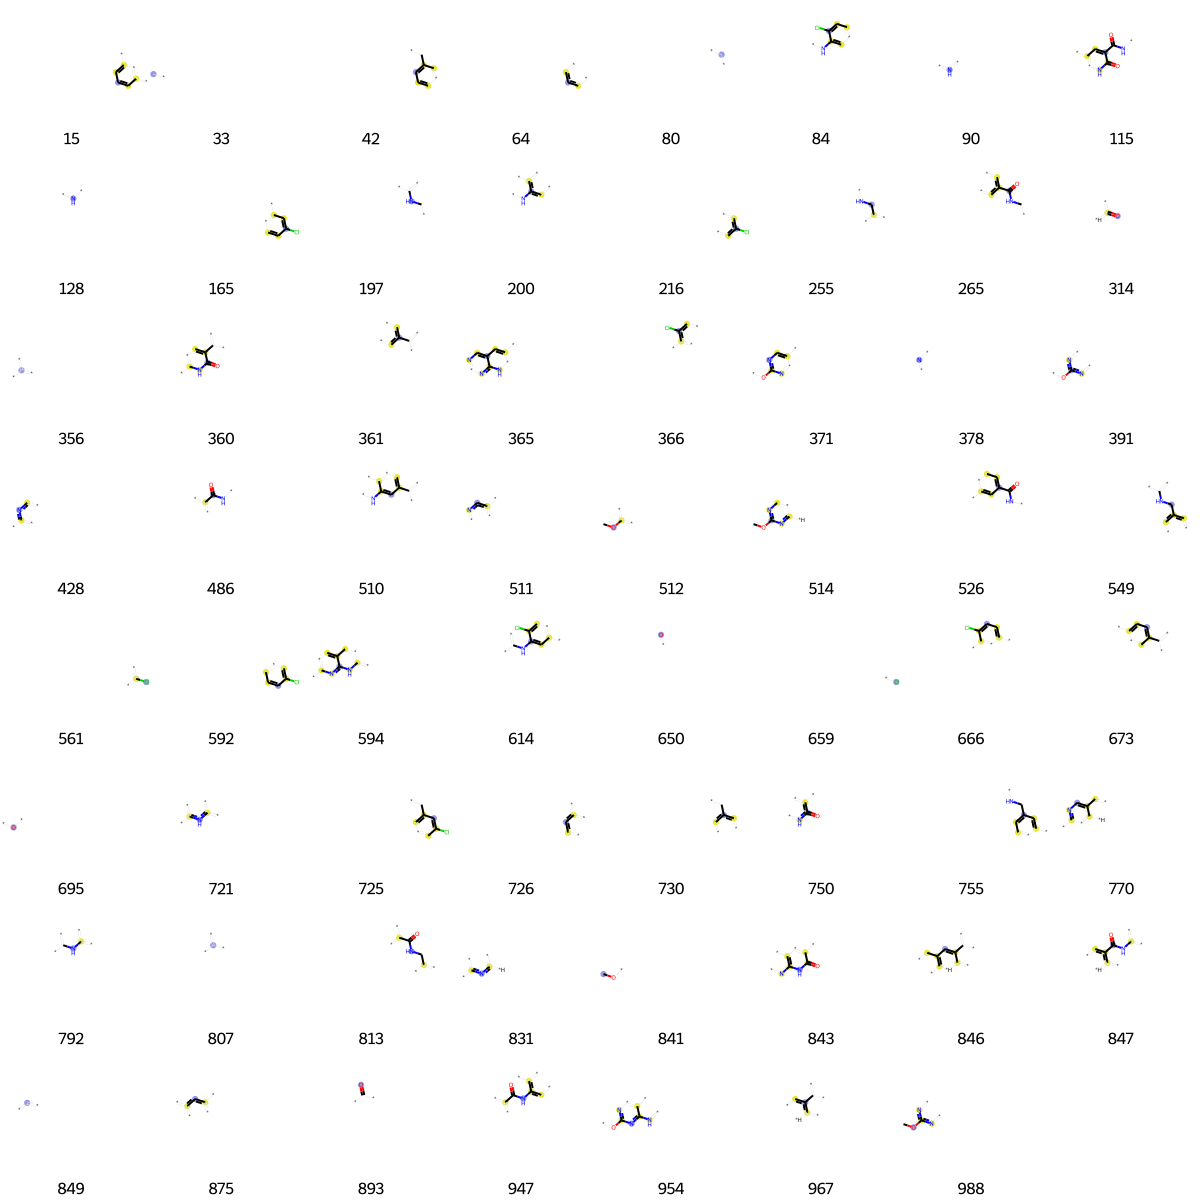

In [10944]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [11062]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 64,
 72,
 114,
 126,
 175,
 255,
 301,
 314,
 323,
 352,
 356,
 365,
 380,
 392,
 410,
 452,
 471,
 484,
 557,
 558,
 578,
 594,
 650,
 712,
 726,
 807,
 849,
 926,
 976,
 984,
 1019]

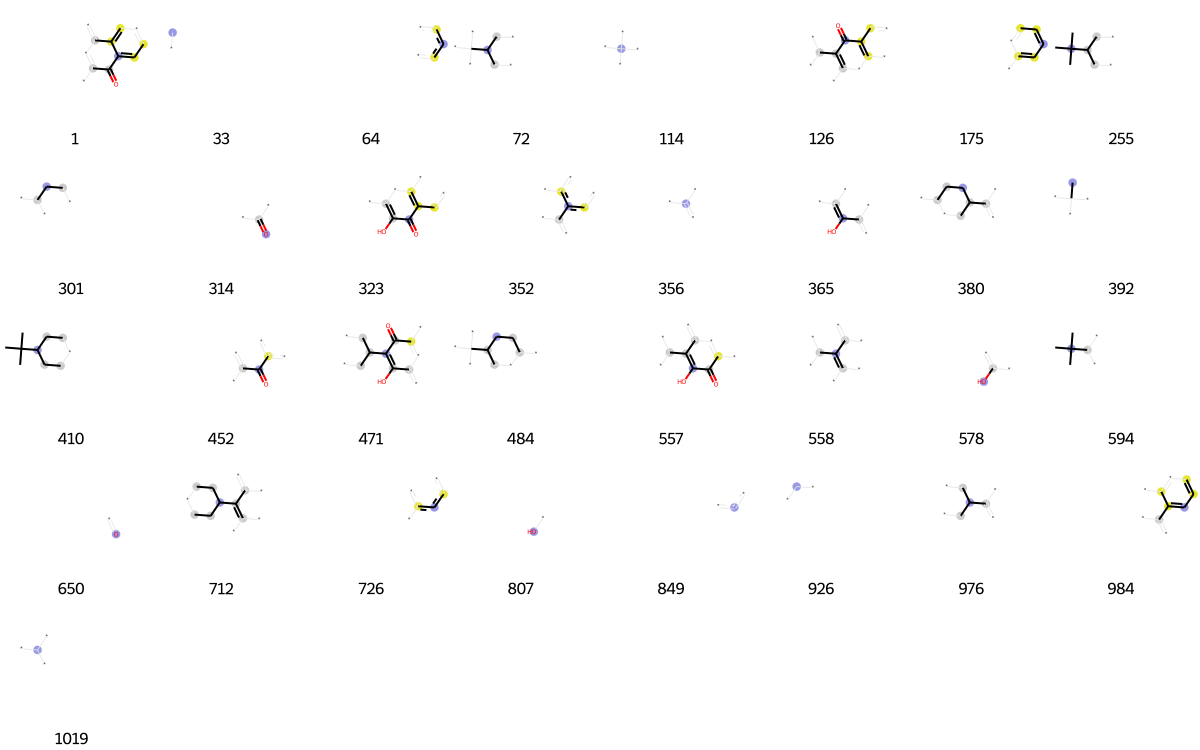

In [10946]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [11063]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[26,
 31,
 33,
 34,
 73,
 80,
 119,
 128,
 133,
 138,
 139,
 157,
 160,
 191,
 200,
 202,
 216,
 301,
 305,
 329,
 332,
 333,
 343,
 356,
 366,
 378,
 419,
 422,
 428,
 441,
 464,
 465,
 489,
 491,
 523,
 524,
 557,
 561,
 650,
 652,
 656,
 659,
 673,
 694,
 695,
 699,
 708,
 716,
 726,
 780,
 786,
 792,
 794,
 807,
 816,
 840,
 843,
 849,
 875,
 881,
 888,
 893,
 894,
 899,
 904,
 911,
 926,
 946,
 950,
 961,
 972,
 1006,
 1015,
 1019]

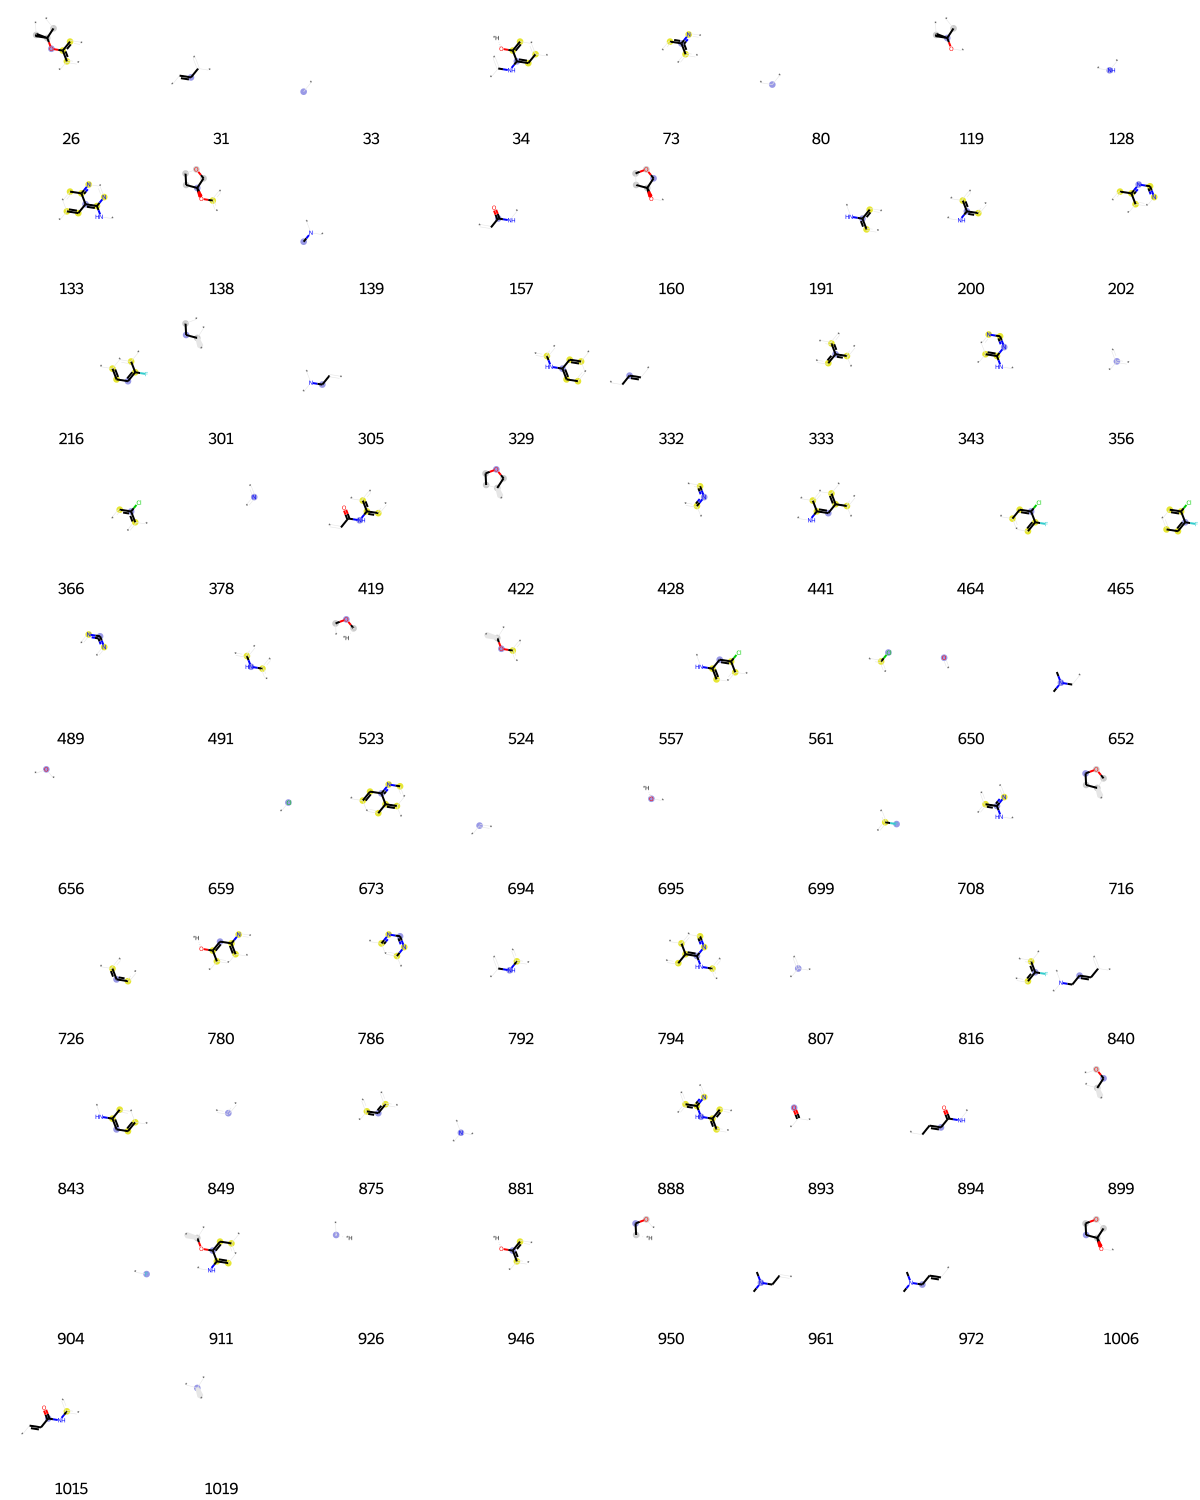

In [10948]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [11064]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[31,
 64,
 80,
 128,
 141,
 157,
 170,
 175,
 197,
 206,
 222,
 284,
 327,
 329,
 356,
 389,
 473,
 650,
 667,
 694,
 723,
 726,
 807,
 835,
 849,
 878,
 893,
 1009]

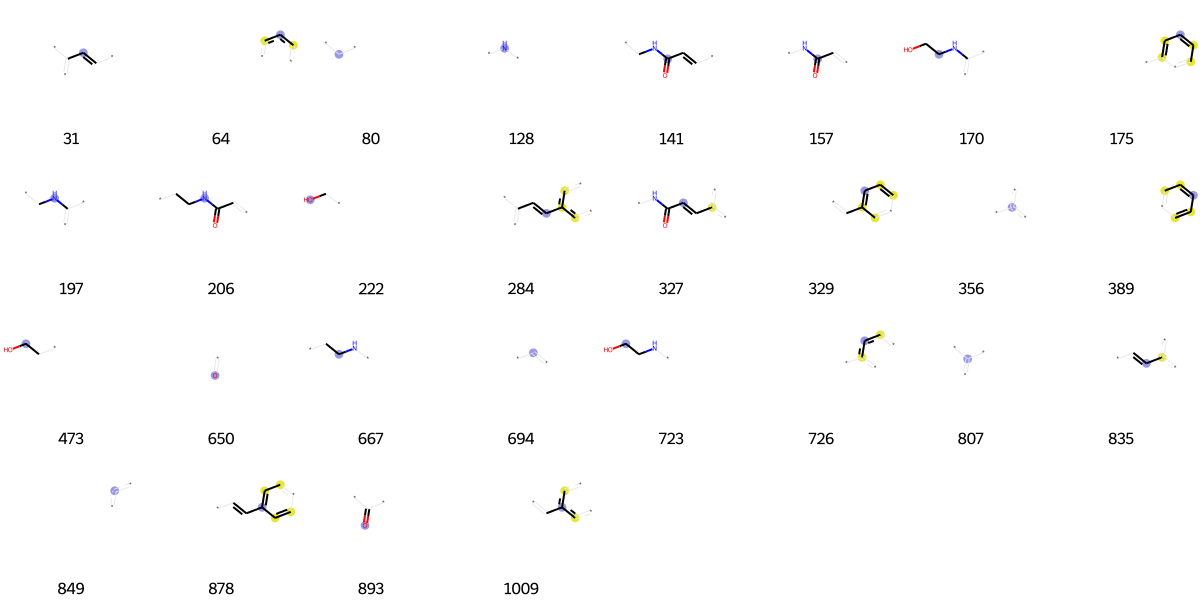

In [10950]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [11065]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 3,
 33,
 62,
 80,
 205,
 212,
 221,
 231,
 249,
 278,
 283,
 287,
 288,
 314,
 327,
 335,
 341,
 356,
 370,
 456,
 512,
 587,
 636,
 649,
 650,
 694,
 695,
 714,
 739,
 791,
 823,
 826,
 830,
 841,
 849,
 864,
 875,
 922,
 926,
 935,
 946,
 1019]

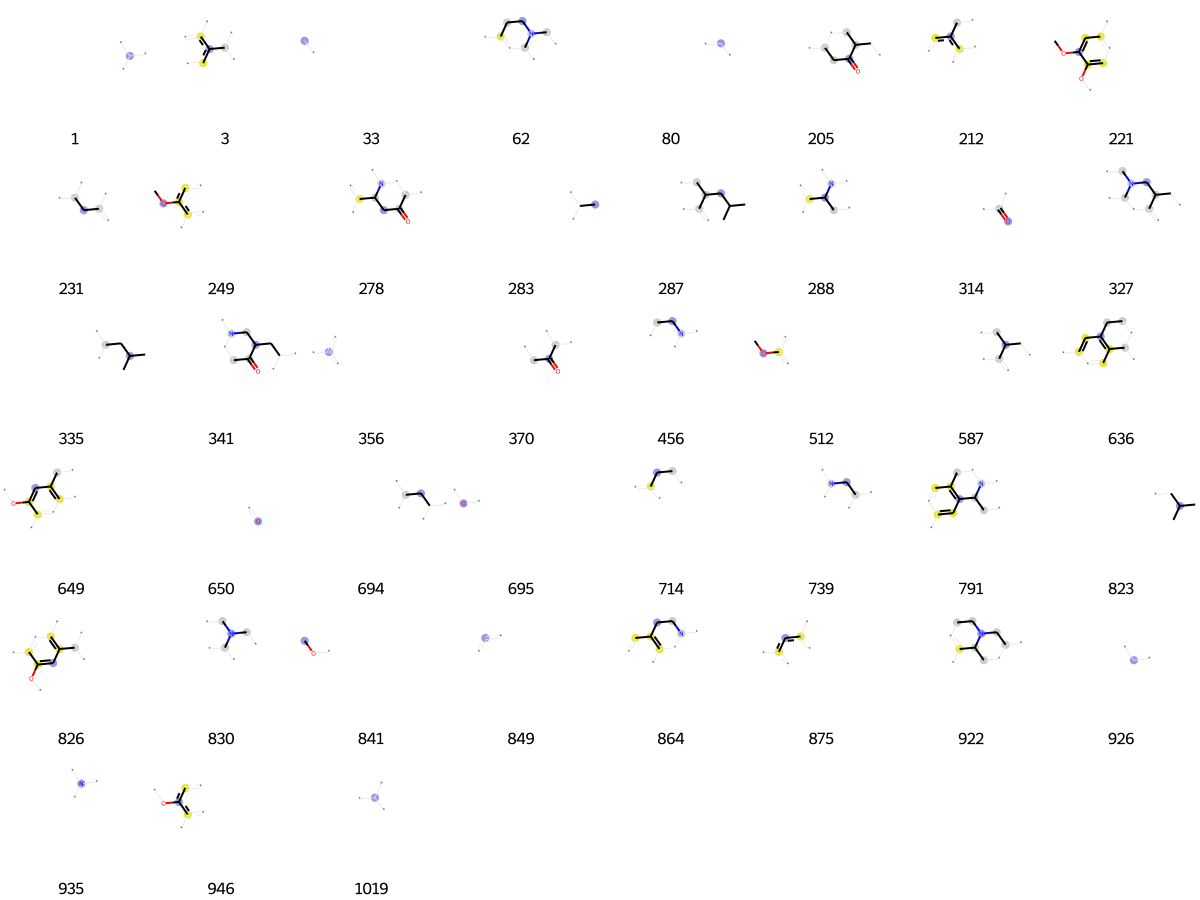

In [10952]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [11066]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 25,
 33,
 46,
 68,
 80,
 89,
 96,
 165,
 180,
 198,
 216,
 227,
 237,
 246,
 249,
 251,
 281,
 294,
 338,
 348,
 352,
 356,
 484,
 557,
 561,
 591,
 655,
 659,
 680,
 694,
 723,
 726,
 749,
 765,
 794,
 807,
 816,
 836,
 843,
 849,
 875,
 877,
 881,
 887,
 927,
 1009]

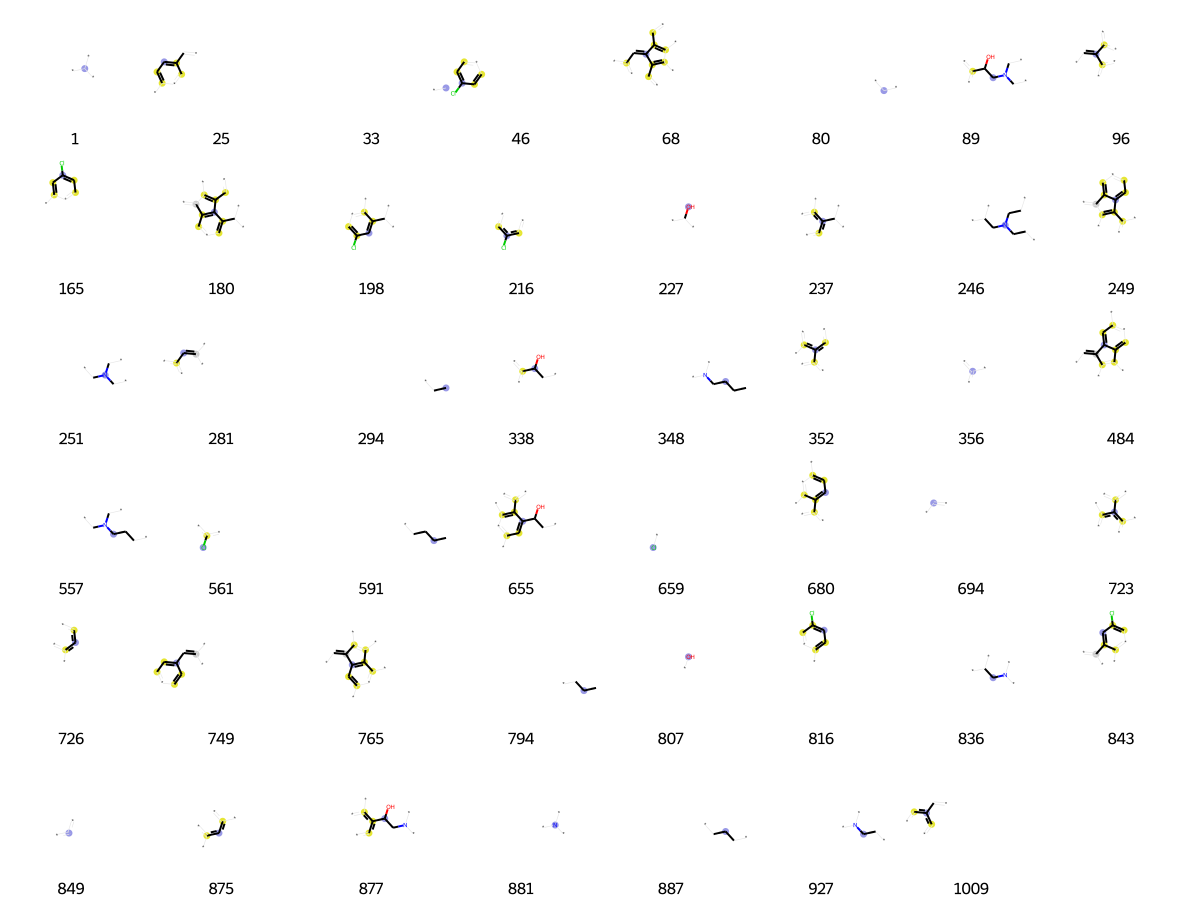

In [10954]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [11067]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[15,
 33,
 64,
 72,
 128,
 136,
 139,
 184,
 191,
 193,
 286,
 355,
 356,
 403,
 588,
 629,
 650,
 676,
 703,
 726,
 736,
 737,
 785,
 792,
 807,
 849,
 873,
 875,
 881,
 893,
 896,
 940,
 960]

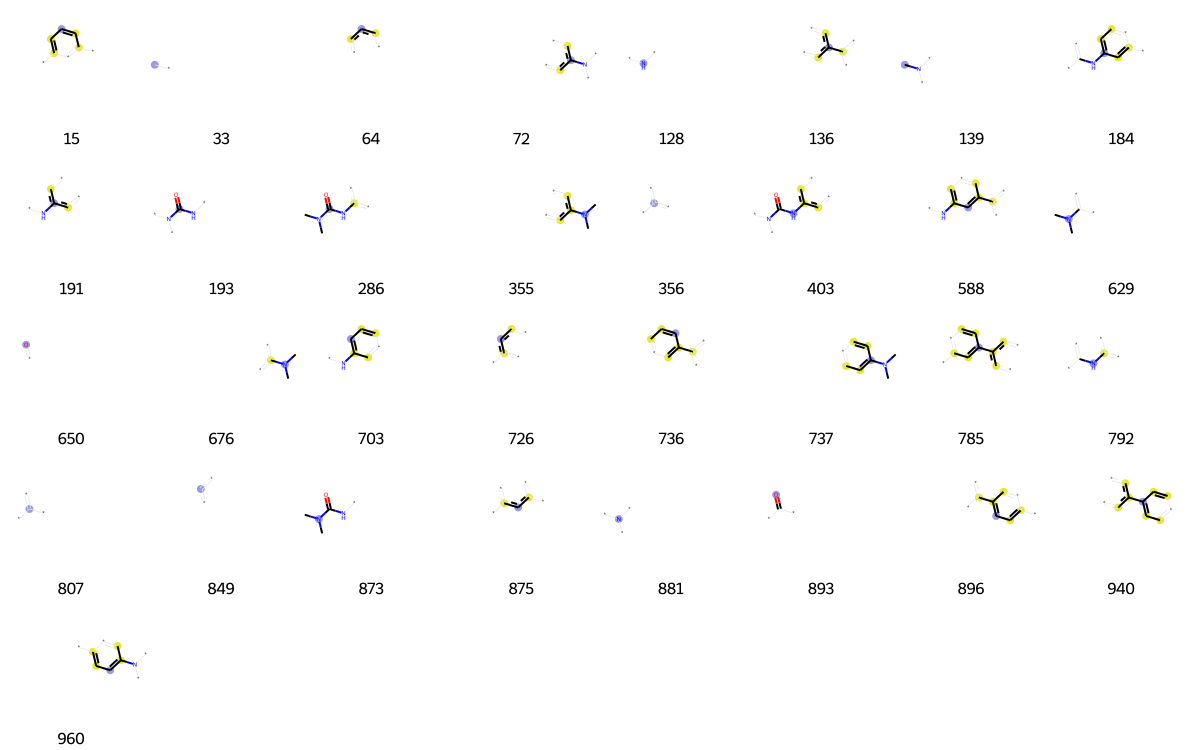

In [10956]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [11068]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[15,
 33,
 42,
 64,
 71,
 75,
 80,
 122,
 128,
 152,
 181,
 185,
 190,
 194,
 221,
 227,
 233,
 255,
 282,
 313,
 345,
 356,
 378,
 392,
 406,
 428,
 454,
 463,
 468,
 505,
 519,
 542,
 561,
 570,
 577,
 650,
 656,
 659,
 661,
 672,
 689,
 700,
 708,
 726,
 730,
 755,
 758,
 778,
 807,
 831,
 849,
 875,
 893,
 897,
 930,
 932,
 933,
 935,
 947,
 960,
 980,
 1019]

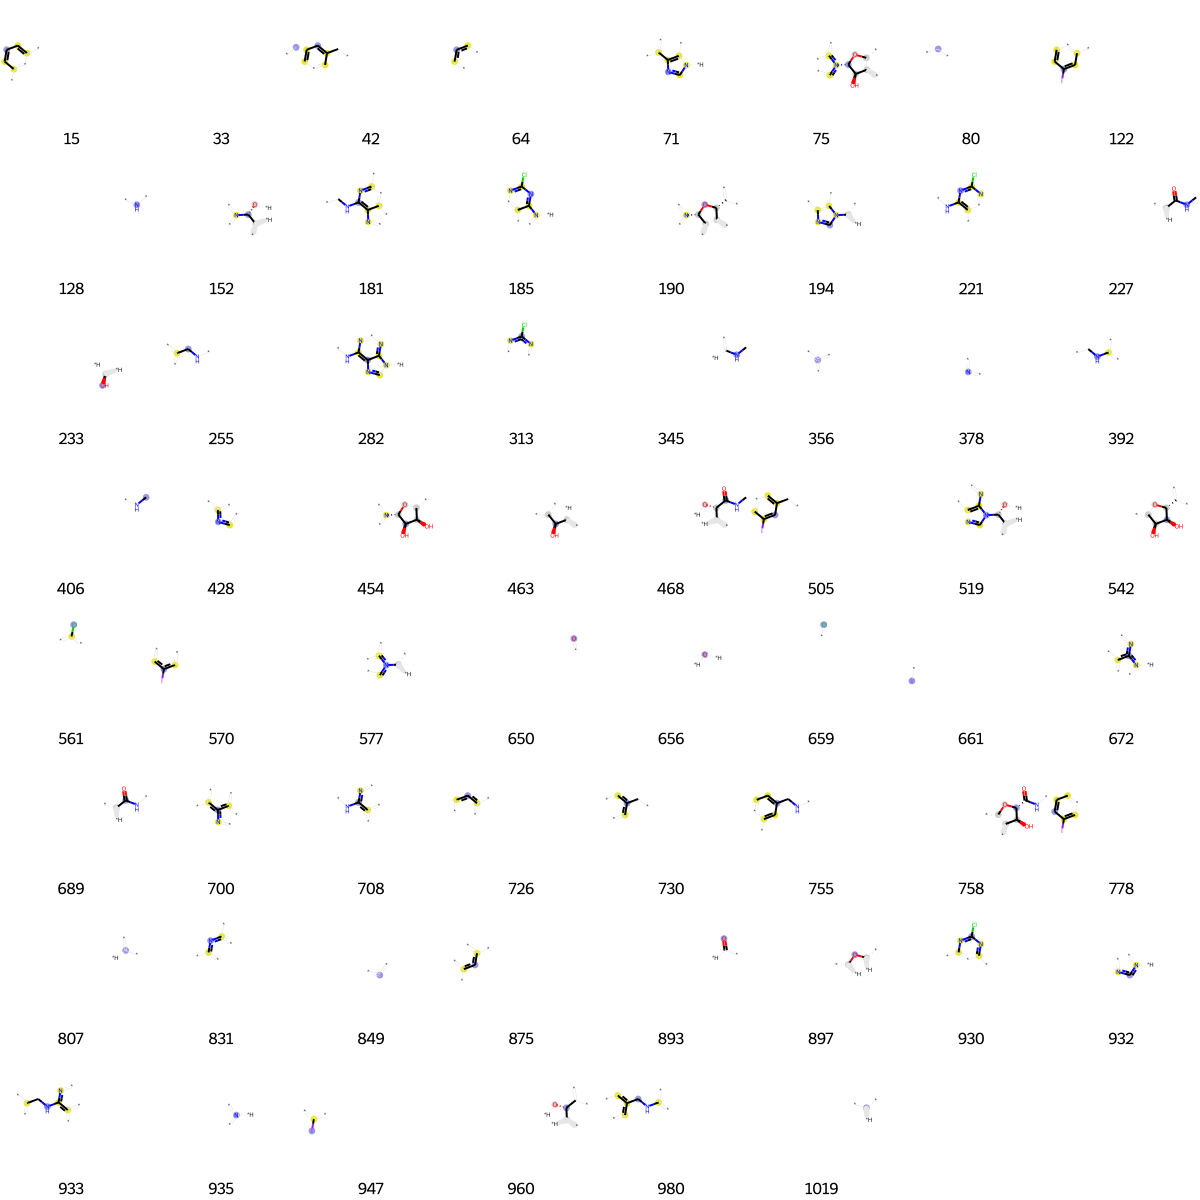

In [10958]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [11069]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[73,
 87,
 106,
 112,
 171,
 245,
 342,
 354,
 356,
 360,
 361,
 378,
 431,
 438,
 578,
 650,
 674,
 715,
 716,
 753,
 790,
 807,
 831,
 838,
 849,
 875,
 924,
 939,
 988]

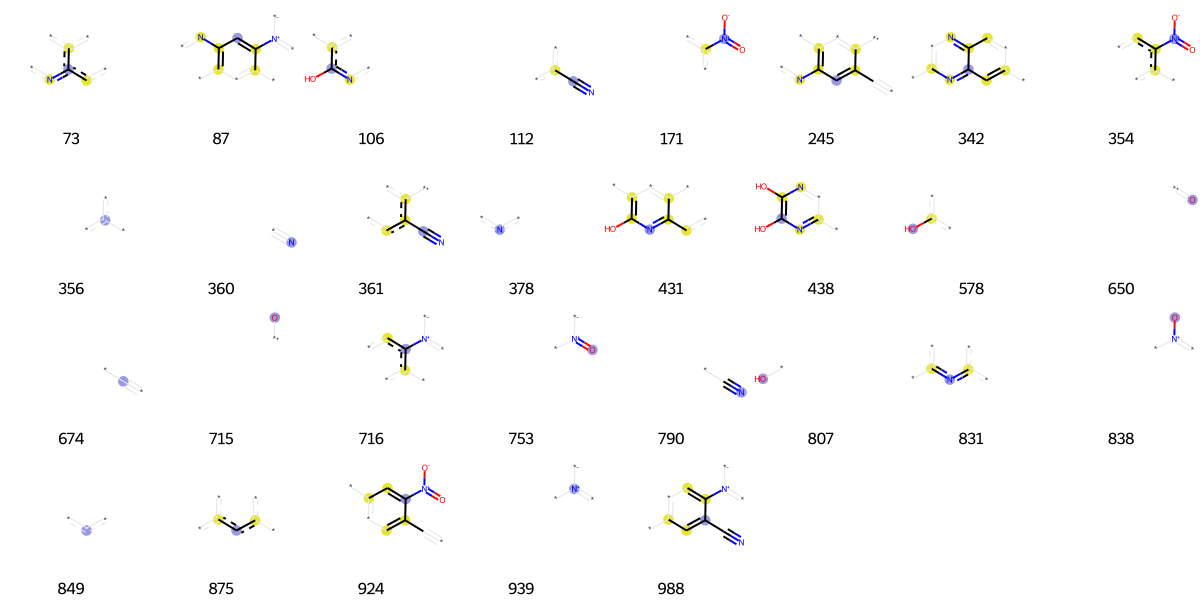

In [10960]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [11070]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 45,
 64,
 75,
 80,
 90,
 119,
 121,
 175,
 216,
 237,
 244,
 261,
 301,
 314,
 341,
 346,
 356,
 386,
 389,
 456,
 458,
 478,
 548,
 563,
 646,
 650,
 653,
 699,
 721,
 726,
 739,
 758,
 759,
 767,
 829,
 847,
 849,
 884,
 886,
 887,
 890,
 904,
 926,
 935,
 987,
 1019,
 1022]

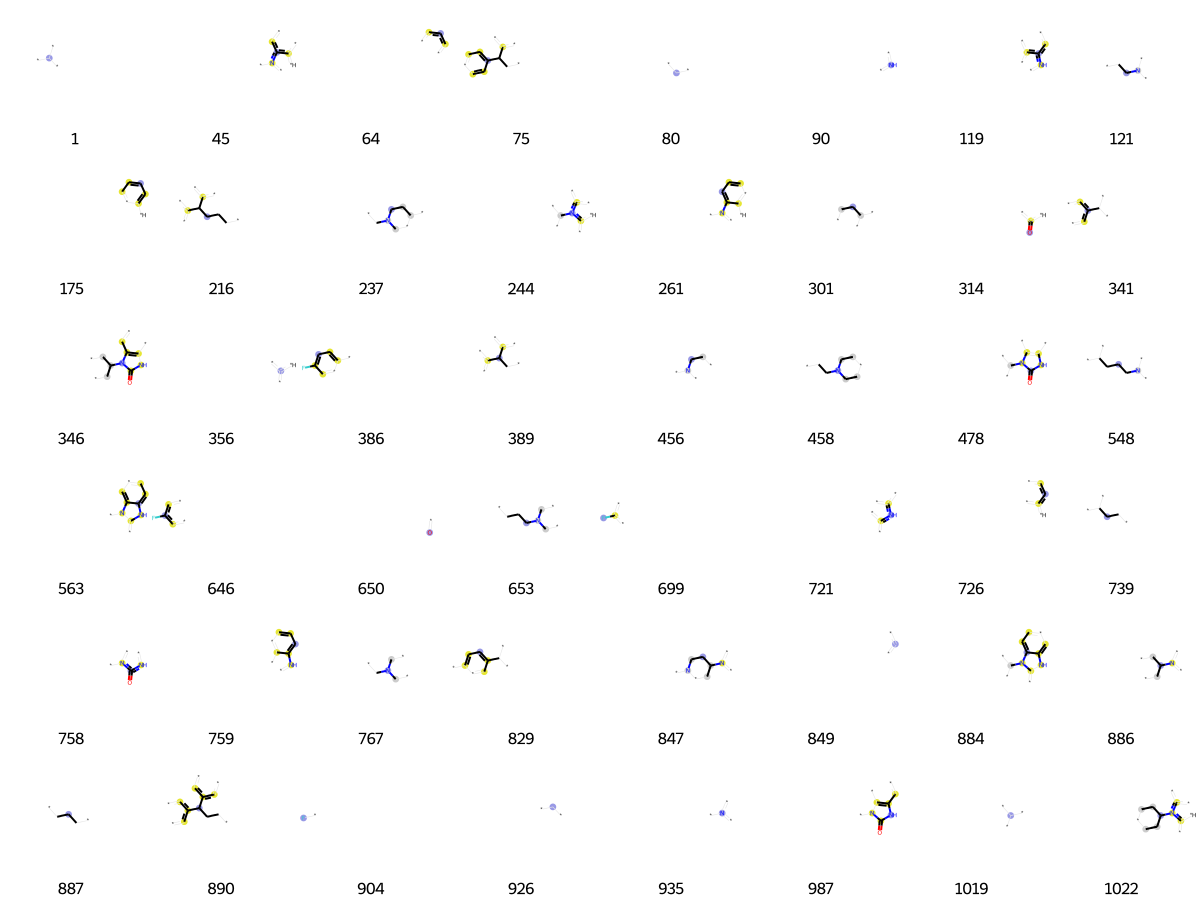

In [10962]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [11071]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[0,
 10,
 13,
 33,
 46,
 80,
 102,
 136,
 139,
 193,
 216,
 219,
 228,
 233,
 236,
 251,
 294,
 318,
 322,
 356,
 378,
 420,
 428,
 464,
 510,
 557,
 559,
 561,
 564,
 591,
 593,
 620,
 659,
 695,
 705,
 718,
 726,
 794,
 801,
 816,
 831,
 849,
 881,
 887,
 895,
 896,
 927,
 932,
 935,
 947,
 957,
 975,
 980]

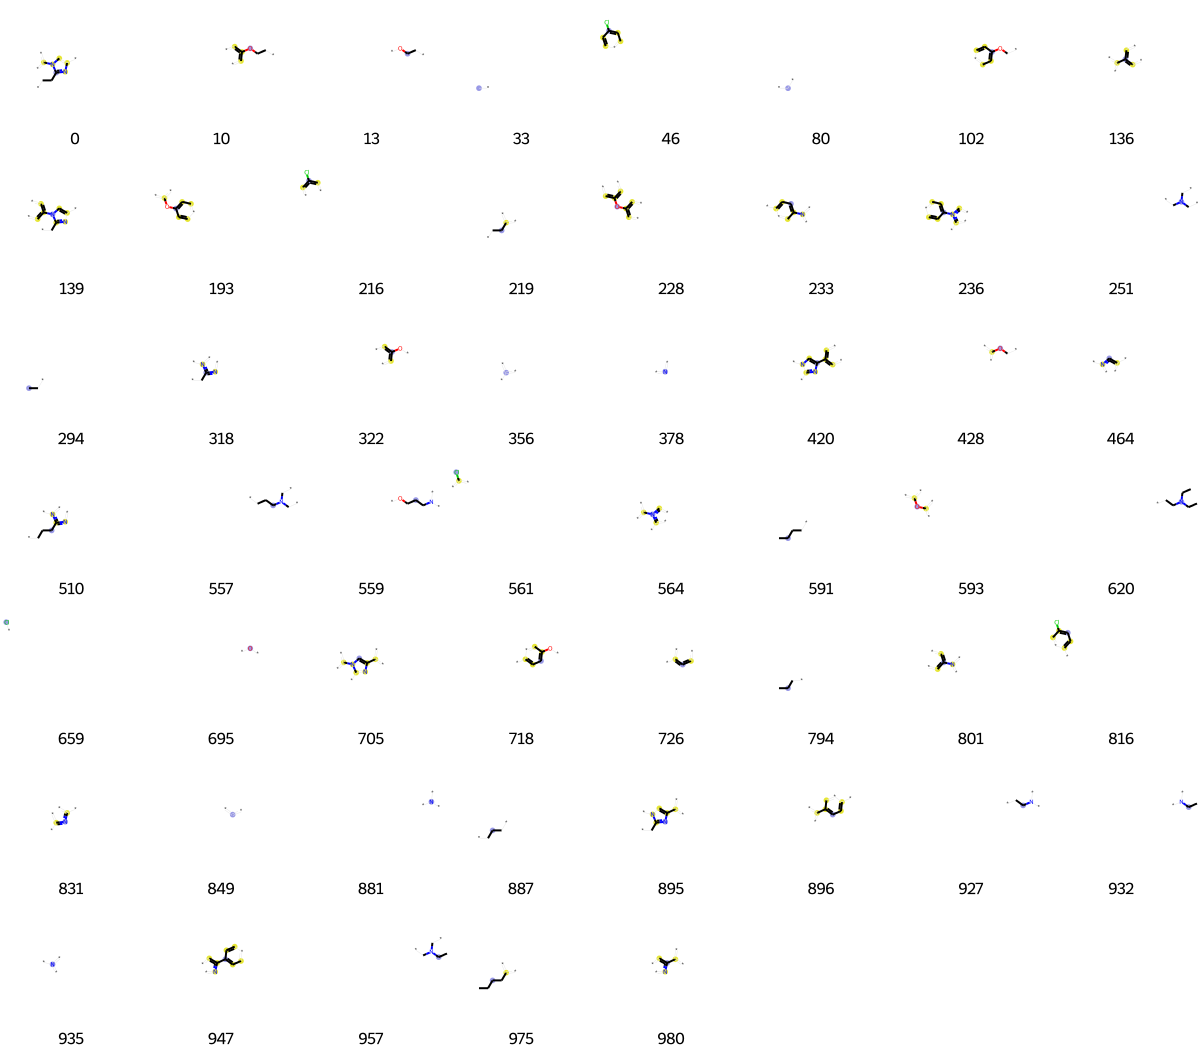

In [10964]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [11072]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 15,
 25,
 33,
 55,
 58,
 63,
 64,
 90,
 128,
 147,
 172,
 175,
 180,
 193,
 199,
 253,
 283,
 298,
 314,
 343,
 356,
 366,
 378,
 388,
 389,
 428,
 488,
 489,
 504,
 561,
 603,
 650,
 659,
 690,
 700,
 708,
 713,
 726,
 786,
 801,
 806,
 831,
 834,
 839,
 849,
 859,
 875,
 898,
 906,
 935,
 960,
 969,
 974,
 983]

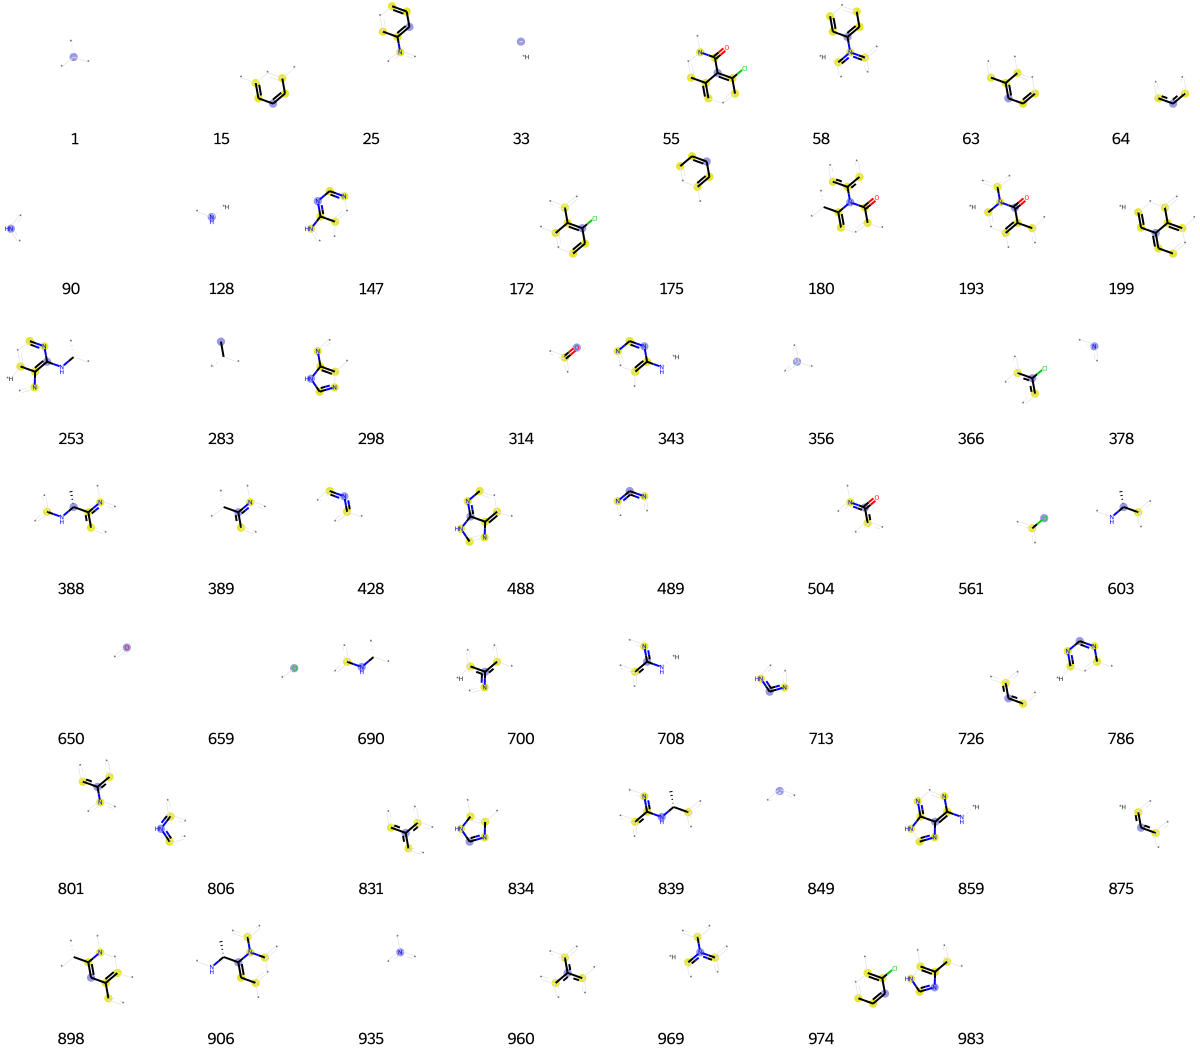

In [10966]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [11073]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[27,
 47,
 90,
 97,
 122,
 128,
 160,
 165,
 184,
 191,
 216,
 249,
 279,
 285,
 352,
 356,
 361,
 378,
 383,
 428,
 451,
 491,
 500,
 561,
 579,
 600,
 659,
 699,
 700,
 708,
 726,
 728,
 816,
 831,
 842,
 843,
 849,
 875,
 888,
 904,
 915]

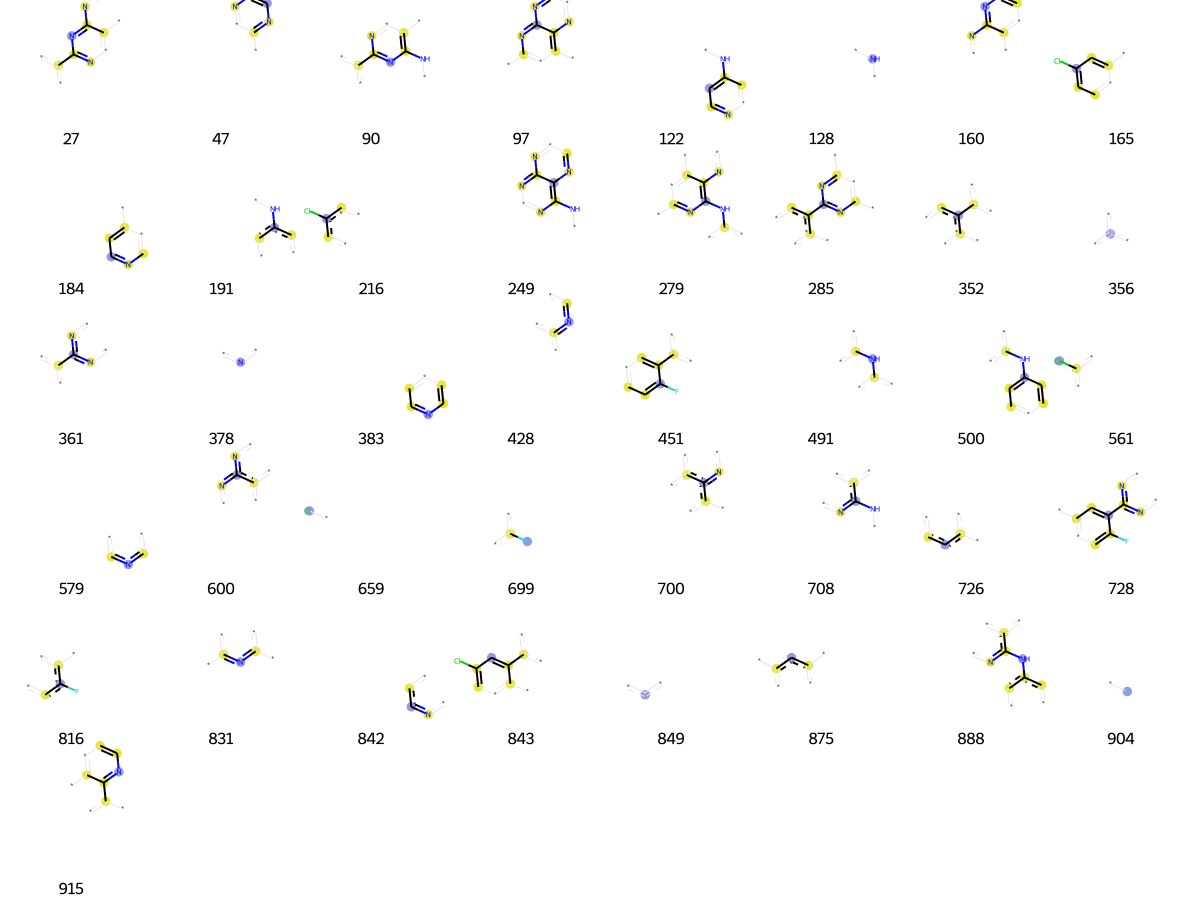

In [10968]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [11074]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[14,
 33,
 34,
 36,
 47,
 53,
 56,
 59,
 75,
 80,
 88,
 114,
 119,
 128,
 157,
 179,
 191,
 196,
 248,
 250,
 285,
 294,
 315,
 322,
 356,
 363,
 378,
 392,
 428,
 454,
 470,
 486,
 511,
 518,
 524,
 581,
 600,
 650,
 656,
 658,
 659,
 679,
 687,
 695,
 700,
 718,
 726,
 792,
 807,
 843,
 849,
 855,
 871,
 875,
 888,
 893,
 926,
 935,
 946,
 954,
 965,
 966,
 1019]

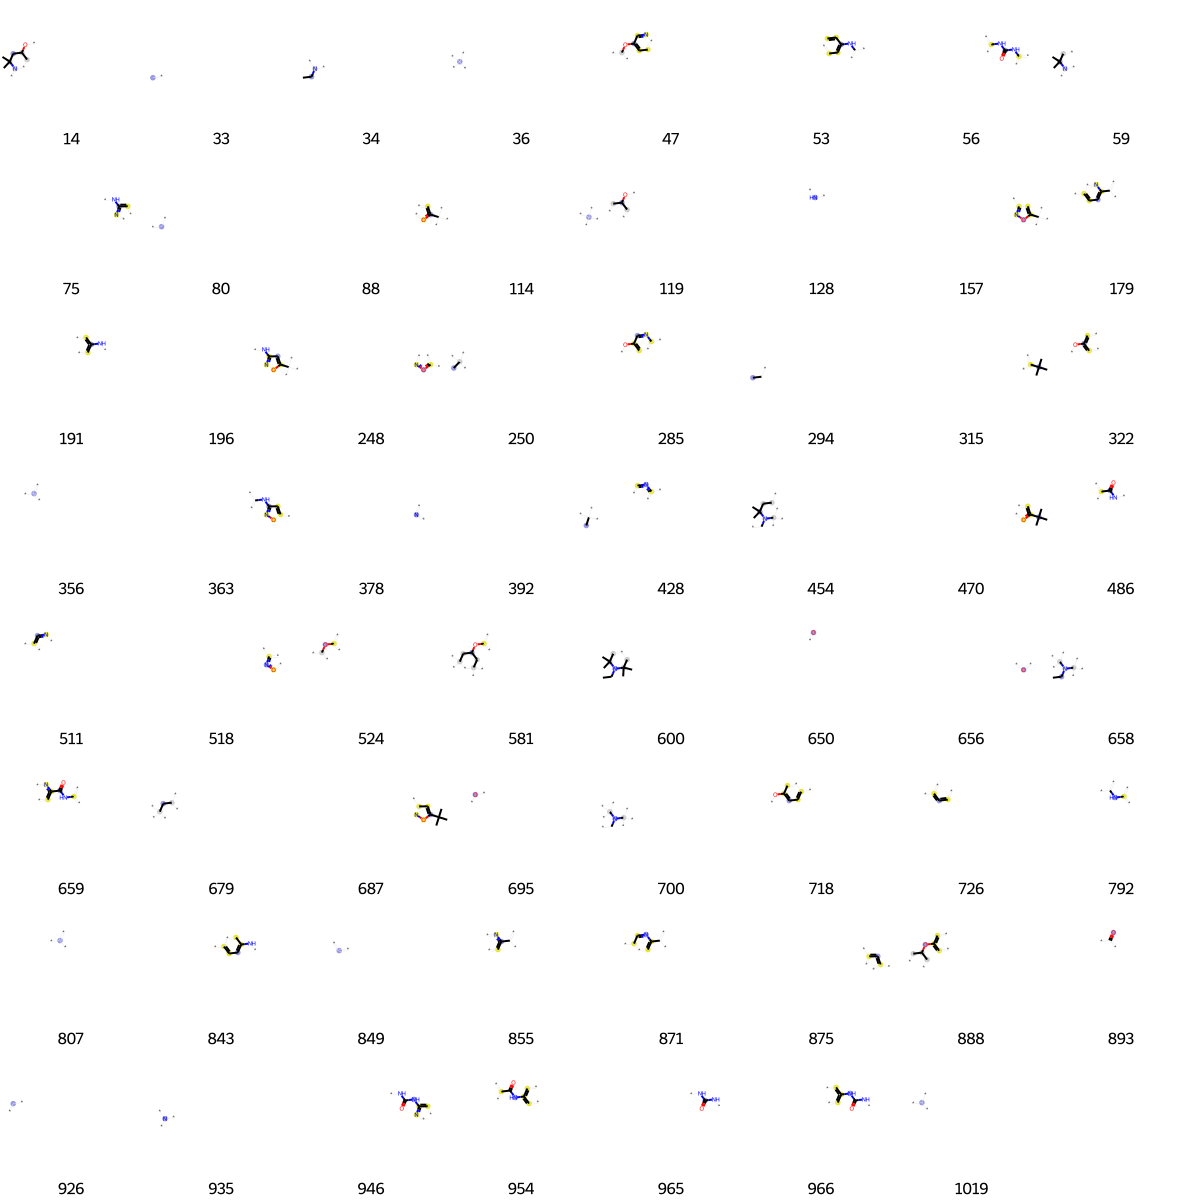

In [10970]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [11075]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 4,
 33,
 34,
 54,
 75,
 90,
 128,
 139,
 197,
 204,
 225,
 240,
 249,
 265,
 283,
 292,
 346,
 356,
 361,
 378,
 386,
 428,
 440,
 456,
 489,
 543,
 552,
 587,
 646,
 650,
 667,
 673,
 675,
 690,
 695,
 699,
 726,
 786,
 807,
 831,
 843,
 849,
 875,
 881,
 893,
 904,
 964,
 980,
 998]

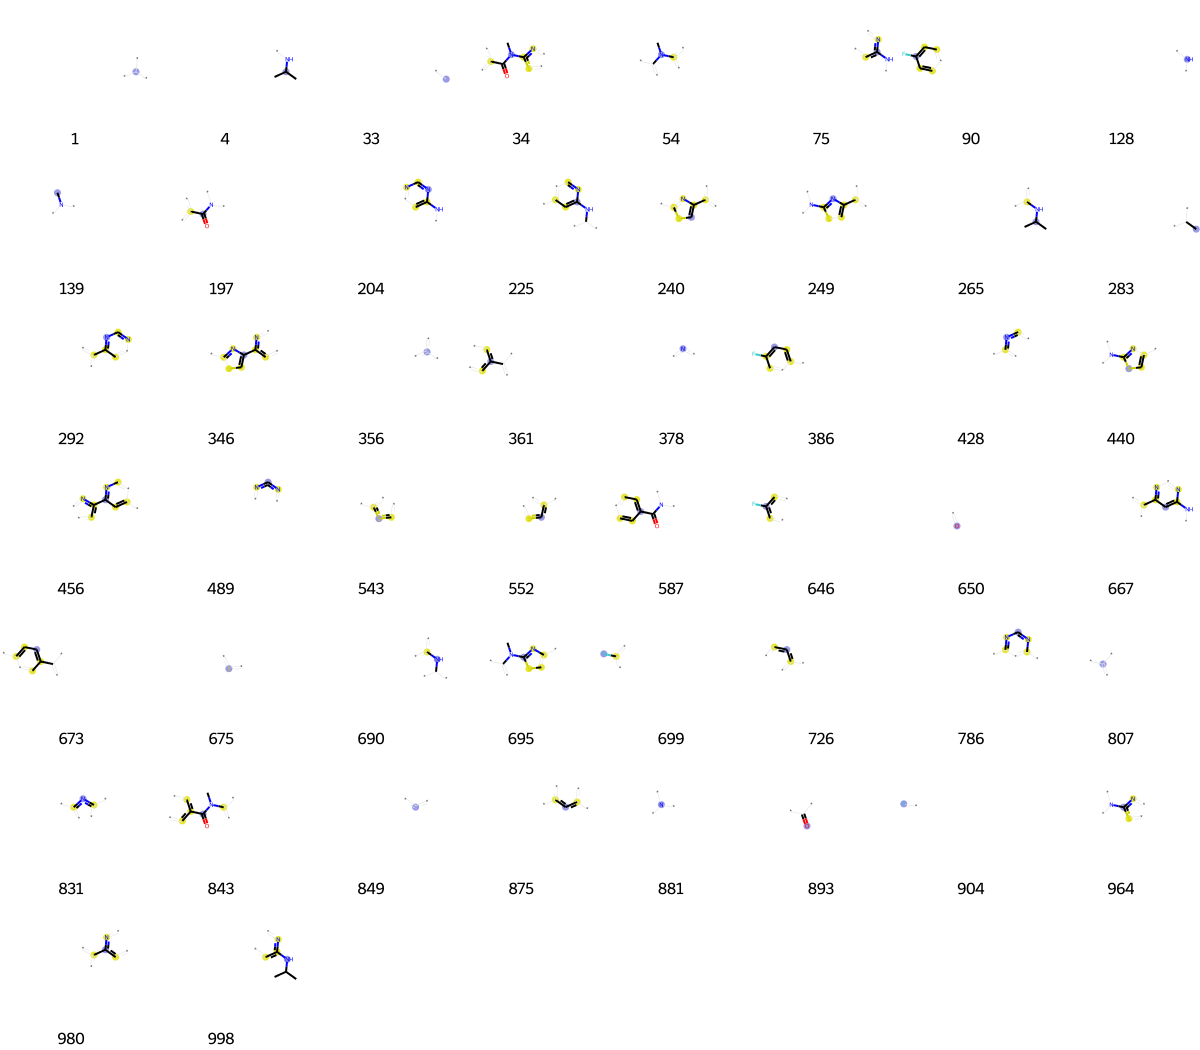

In [10972]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [11076]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[21,
 23,
 42,
 64,
 80,
 128,
 171,
 175,
 200,
 219,
 250,
 356,
 389,
 392,
 456,
 650,
 667,
 715,
 726,
 730,
 753,
 785,
 790,
 807,
 832,
 838,
 844,
 849,
 858,
 875,
 887,
 893,
 899,
 916,
 939,
 948,
 954,
 964,
 967,
 978]

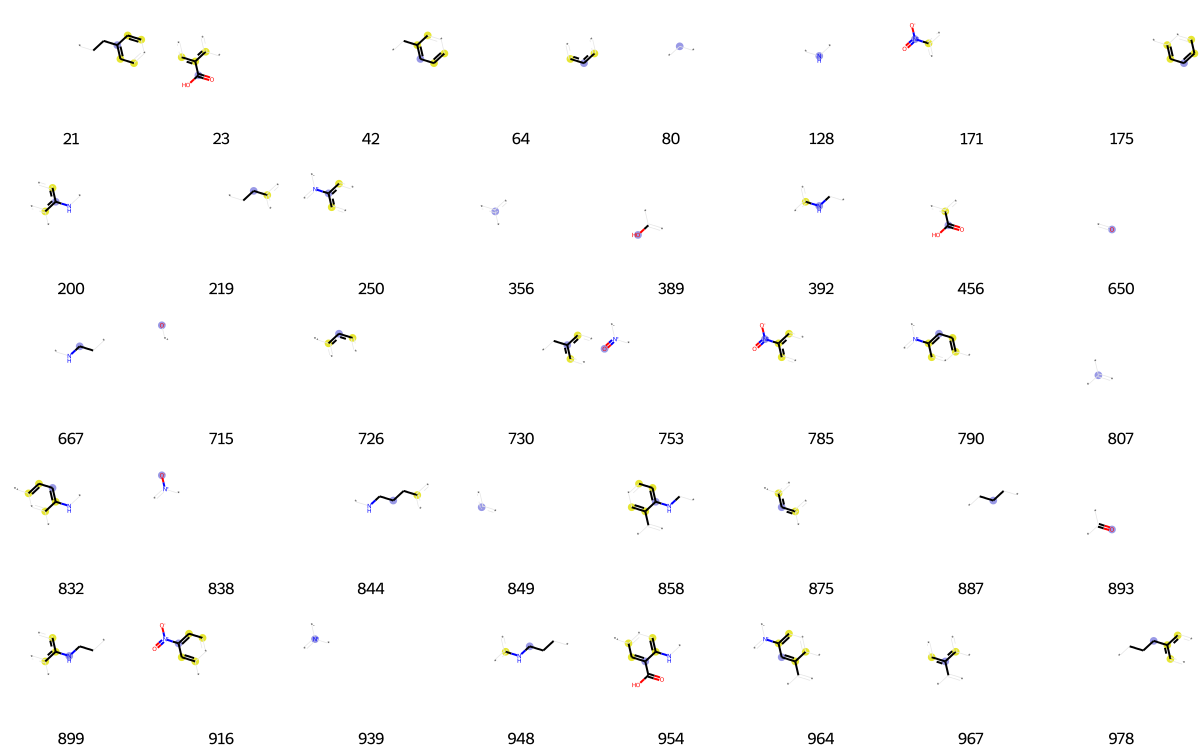

In [10974]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [11077]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[15,
 30,
 63,
 64,
 101,
 128,
 131,
 141,
 162,
 190,
 191,
 284,
 301,
 315,
 356,
 366,
 379,
 387,
 419,
 449,
 456,
 486,
 531,
 549,
 556,
 561,
 578,
 585,
 650,
 659,
 660,
 675,
 717,
 726,
 729,
 739,
 807,
 831,
 849,
 875,
 893,
 926,
 935,
 974,
 1019]

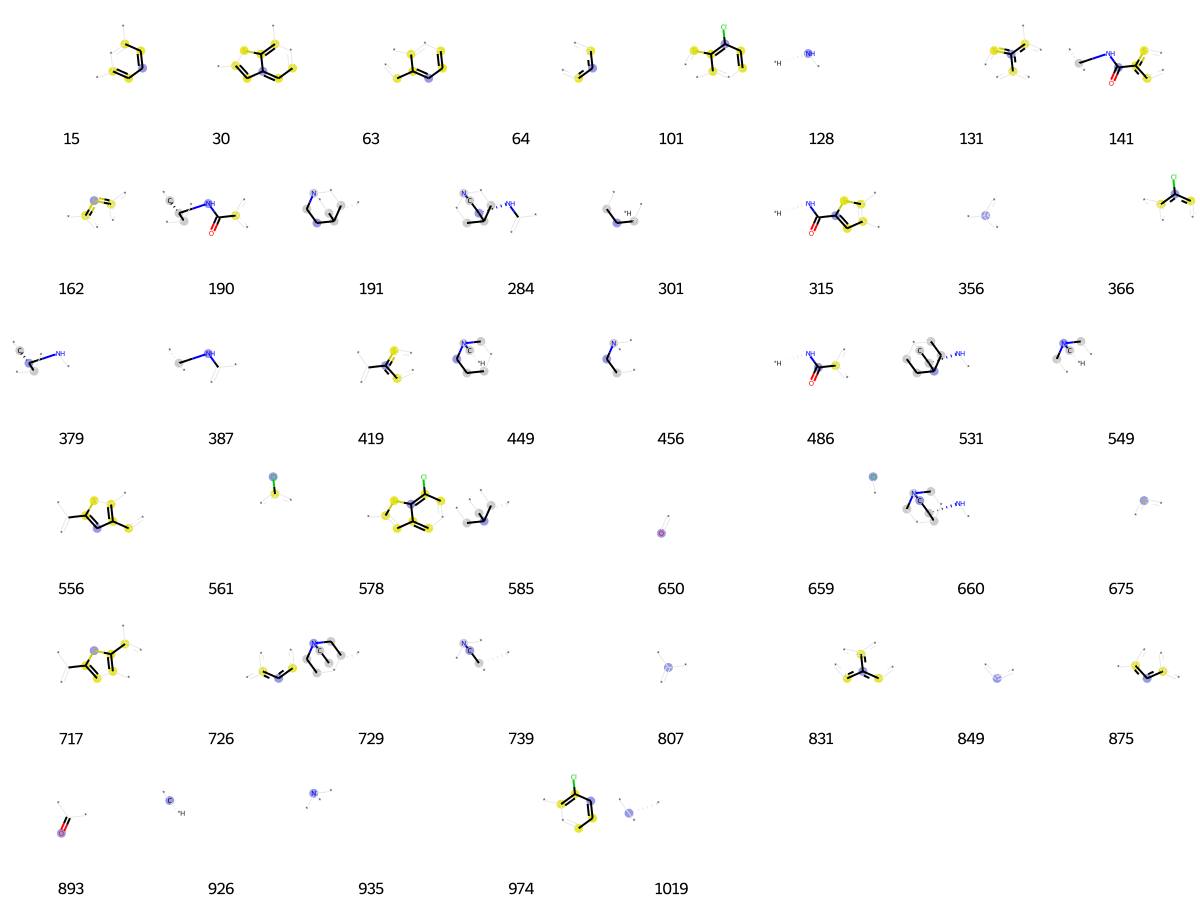

In [10976]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [11078]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 33,
 79,
 80,
 193,
 283,
 310,
 315,
 356,
 451,
 578,
 579,
 583,
 589,
 726,
 730,
 749,
 761,
 807,
 849,
 875,
 966]

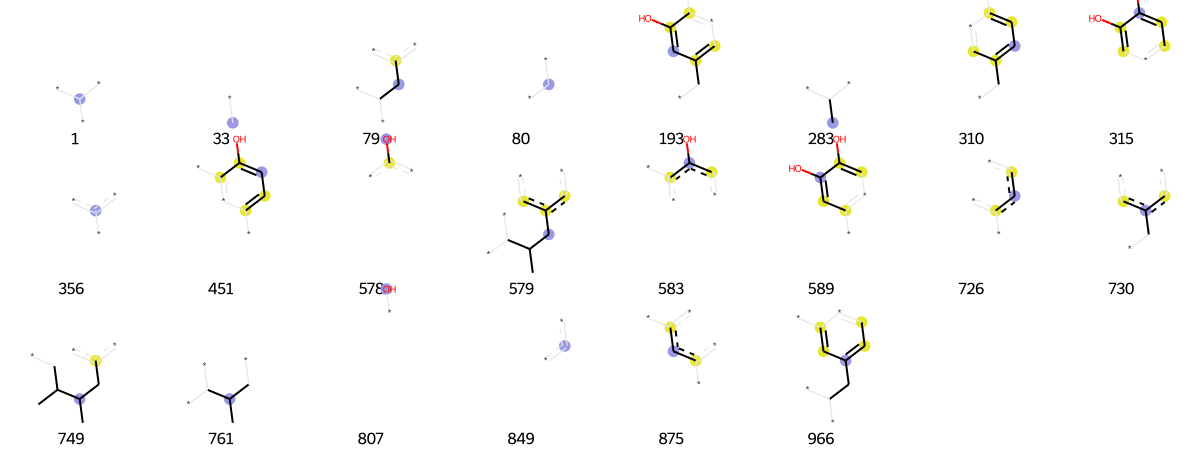

In [10978]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [11079]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[33,
 36,
 45,
 74,
 80,
 90,
 121,
 139,
 142,
 158,
 161,
 171,
 209,
 223,
 297,
 322,
 323,
 324,
 352,
 354,
 356,
 378,
 492,
 512,
 544,
 622,
 650,
 652,
 654,
 693,
 695,
 715,
 716,
 718,
 726,
 753,
 781,
 838,
 841,
 849,
 864,
 875,
 881,
 887,
 921,
 927,
 932,
 935,
 939,
 946,
 948,
 949,
 955,
 958,
 960,
 992,
 997]

In [11080]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 24,
 80,
 128,
 140,
 147,
 197,
 389,
 403,
 412,
 496,
 502,
 650,
 667,
 708,
 739,
 767,
 786,
 807,
 820,
 825,
 852,
 887,
 893]

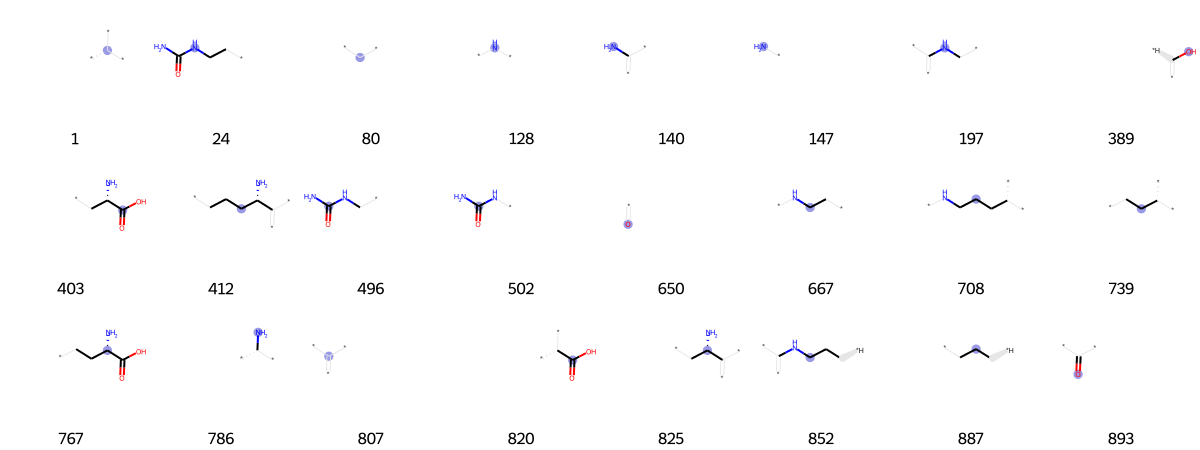

In [10981]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [11081]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 29,
 33,
 95,
 114,
 147,
 169,
 229,
 389,
 392,
 402,
 570,
 650,
 753,
 786,
 807,
 820,
 893]

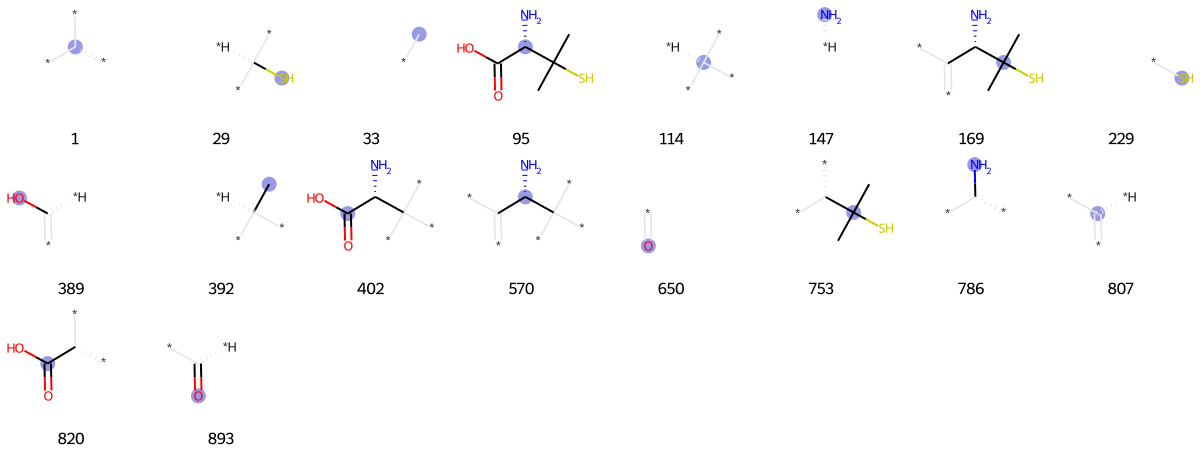

In [10983]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [11082]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[15,
 64,
 75,
 82,
 90,
 117,
 197,
 268,
 284,
 312,
 314,
 356,
 422,
 470,
 472,
 510,
 545,
 630,
 650,
 717,
 726,
 739,
 849,
 888,
 894,
 907,
 926,
 935,
 936,
 976,
 1019]

In [11083]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[13, 233, 463, 807, 1019]

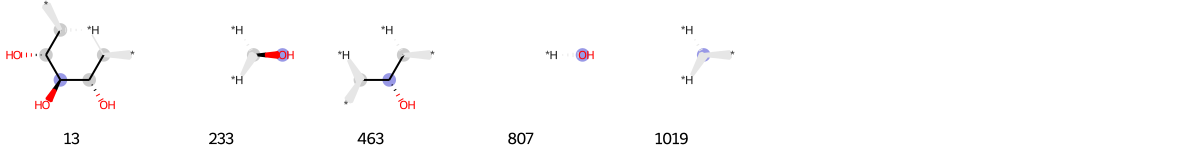

In [10986]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [11084]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33,
 36,
 65,
 111,
 157,
 250,
 274,
 301,
 314,
 356,
 465,
 650,
 656,
 696,
 706,
 723,
 767,
 786,
 897,
 926,
 1019]

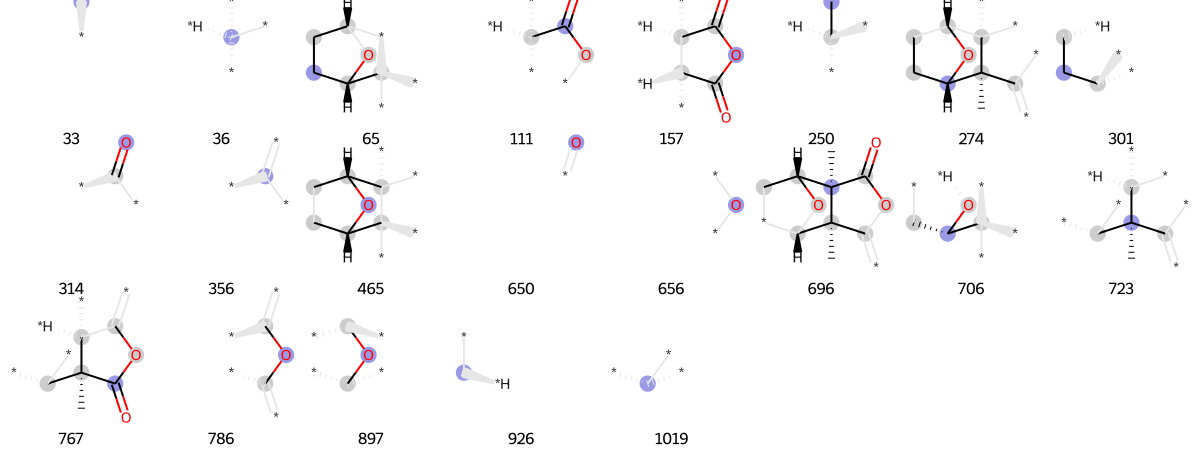

In [10988]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [11085]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[29,
 33,
 43,
 78,
 80,
 94,
 110,
 112,
 114,
 125,
 128,
 145,
 200,
 221,
 249,
 271,
 301,
 322,
 335,
 356,
 361,
 378,
 385,
 411,
 425,
 428,
 429,
 431,
 432,
 441,
 486,
 489,
 512,
 526,
 548,
 579,
 647,
 650,
 651,
 673,
 695,
 718,
 726,
 769,
 771,
 792,
 806,
 807,
 841,
 849,
 859,
 875,
 891,
 893,
 904,
 926,
 932,
 935,
 946,
 947,
 985,
 1019]

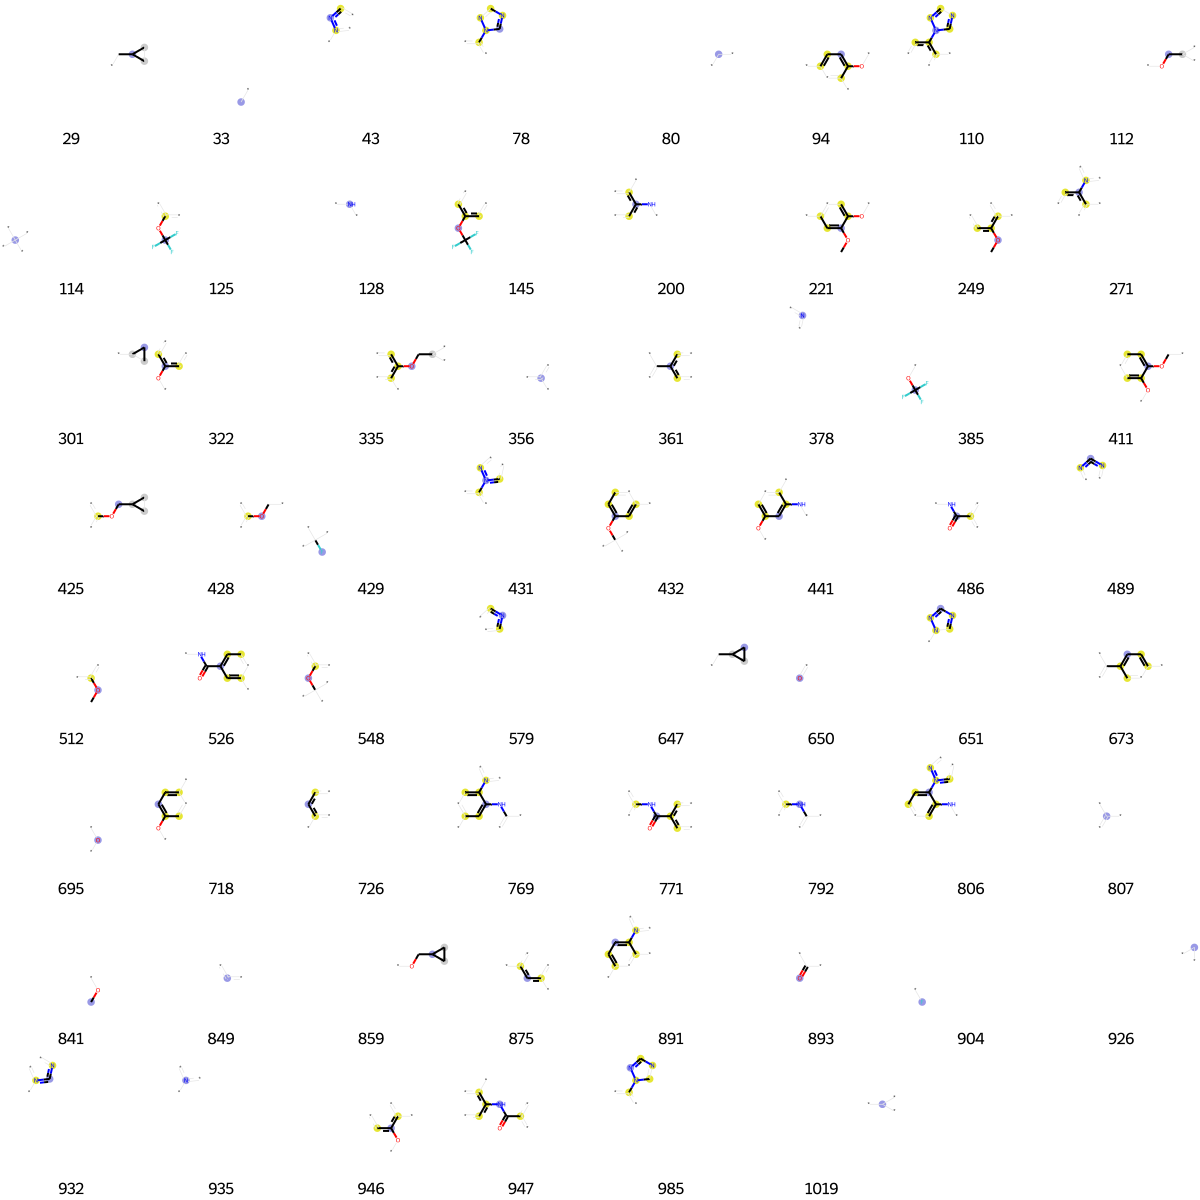

In [10990]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [11086]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[4,
 31,
 33,
 53,
 64,
 80,
 90,
 119,
 128,
 139,
 157,
 173,
 175,
 182,
 191,
 197,
 251,
 301,
 305,
 323,
 328,
 332,
 333,
 352,
 356,
 361,
 366,
 369,
 378,
 420,
 428,
 439,
 446,
 451,
 453,
 456,
 480,
 487,
 497,
 511,
 544,
 546,
 549,
 558,
 561,
 565,
 600,
 610,
 650,
 652,
 659,
 673,
 694,
 721,
 726,
 739,
 759,
 792,
 806,
 807,
 814,
 831,
 840,
 843,
 849,
 855,
 881,
 893,
 894,
 913,
 926,
 935,
 940,
 961,
 972,
 985,
 1015,
 1019]

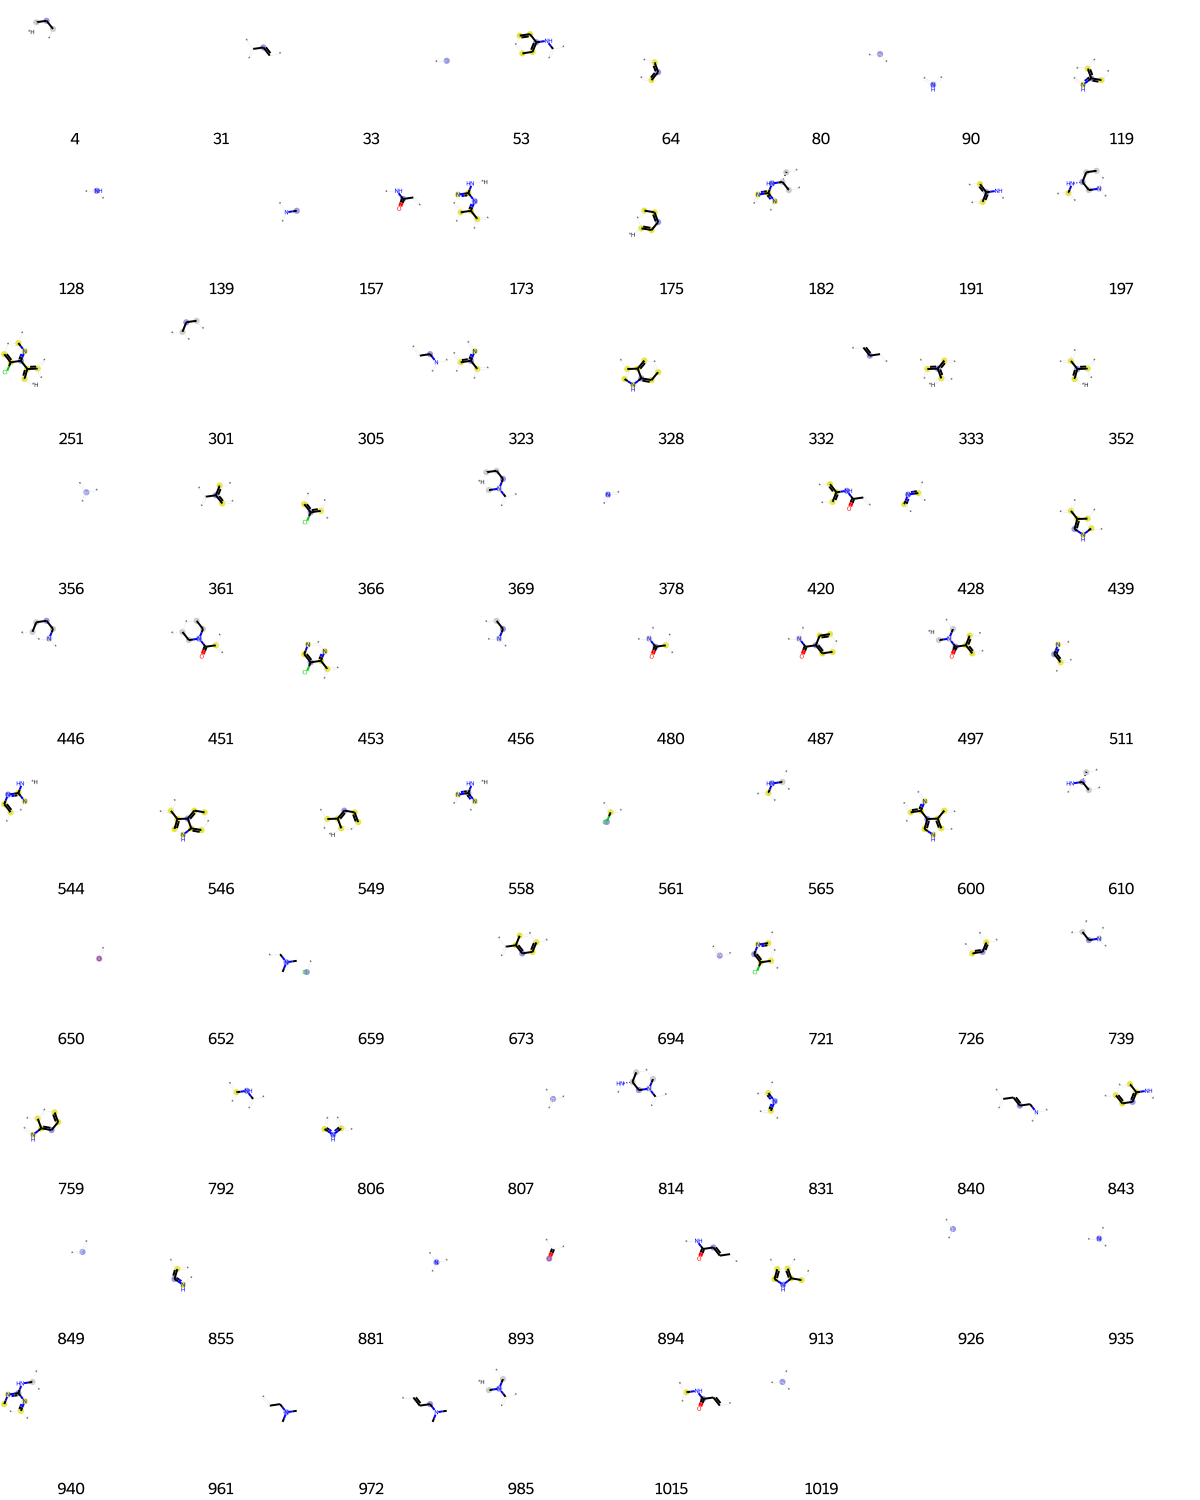

In [10992]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [11087]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[3,
 33,
 35,
 59,
 64,
 74,
 80,
 90,
 114,
 124,
 128,
 139,
 175,
 197,
 236,
 239,
 253,
 255,
 301,
 356,
 367,
 389,
 393,
 425,
 429,
 447,
 475,
 484,
 498,
 501,
 519,
 521,
 522,
 580,
 592,
 622,
 639,
 641,
 650,
 652,
 656,
 667,
 693,
 726,
 807,
 809,
 823,
 849,
 869,
 875,
 881,
 893,
 897,
 904,
 912,
 926,
 927,
 958,
 965,
 966,
 981,
 1019]

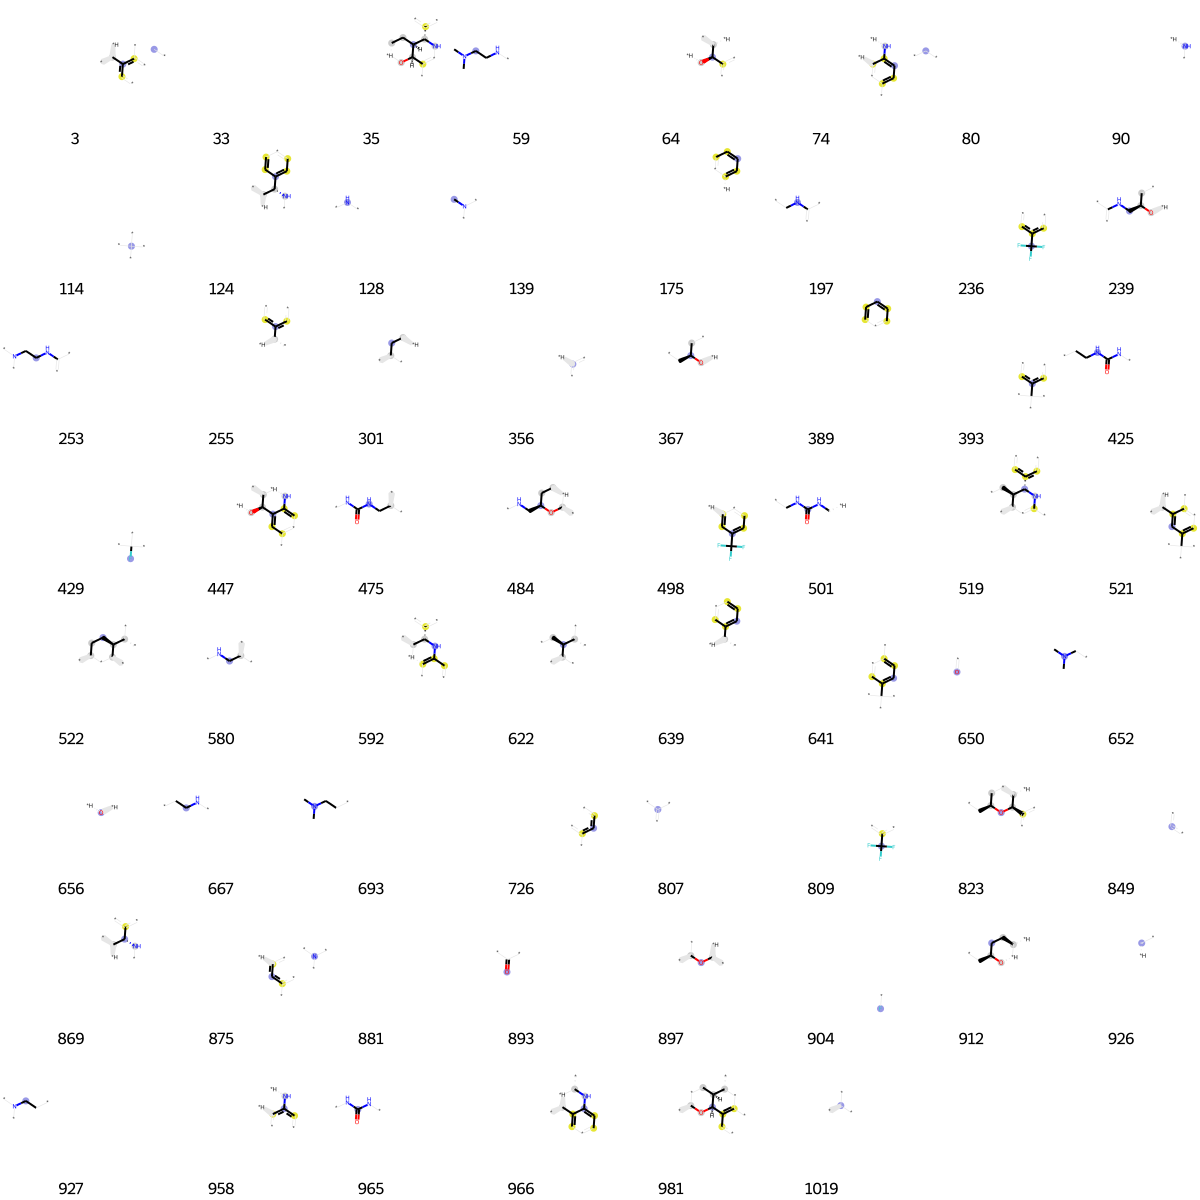

In [10994]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [11088]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[29,
 64,
 80,
 110,
 128,
 136,
 147,
 175,
 193,
 228,
 278,
 301,
 322,
 342,
 343,
 356,
 378,
 389,
 392,
 428,
 433,
 435,
 456,
 482,
 489,
 544,
 548,
 562,
 565,
 580,
 589,
 593,
 621,
 624,
 637,
 650,
 652,
 694,
 695,
 708,
 718,
 723,
 726,
 786,
 800,
 807,
 849,
 888,
 893,
 896,
 926,
 935,
 959,
 985,
 1001,
 1019]

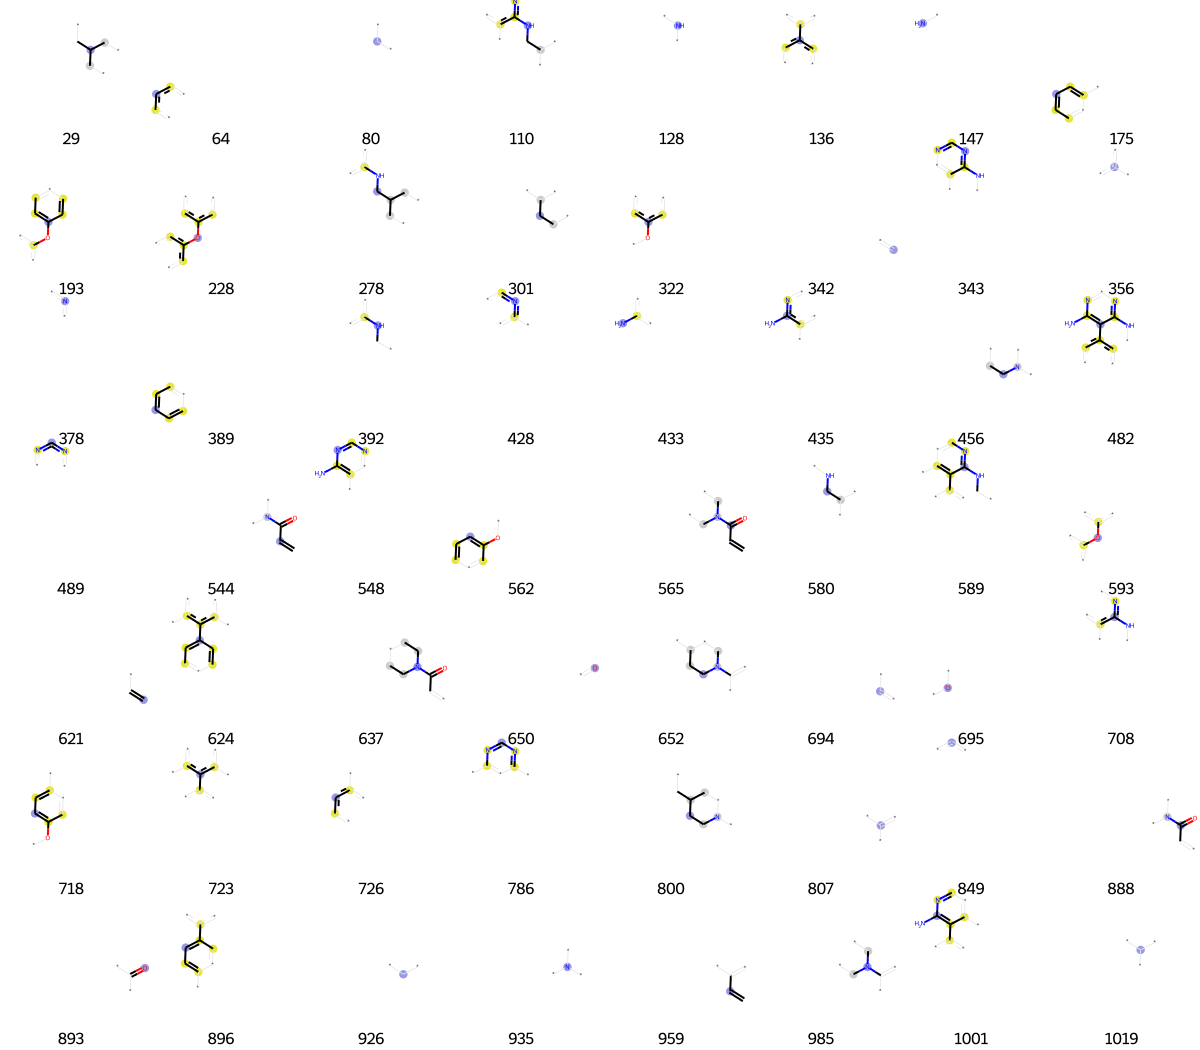

In [10996]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [11089]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 14,
 15,
 36,
 45,
 64,
 90,
 116,
 164,
 175,
 233,
 235,
 262,
 314,
 356,
 363,
 366,
 377,
 381,
 388,
 403,
 407,
 417,
 456,
 469,
 474,
 484,
 523,
 552,
 556,
 561,
 578,
 633,
 650,
 656,
 659,
 675,
 687,
 726,
 738,
 745,
 798,
 801,
 807,
 824,
 849,
 868,
 884,
 909,
 917,
 926,
 935,
 940,
 950,
 974,
 987,
 1014,
 1015]

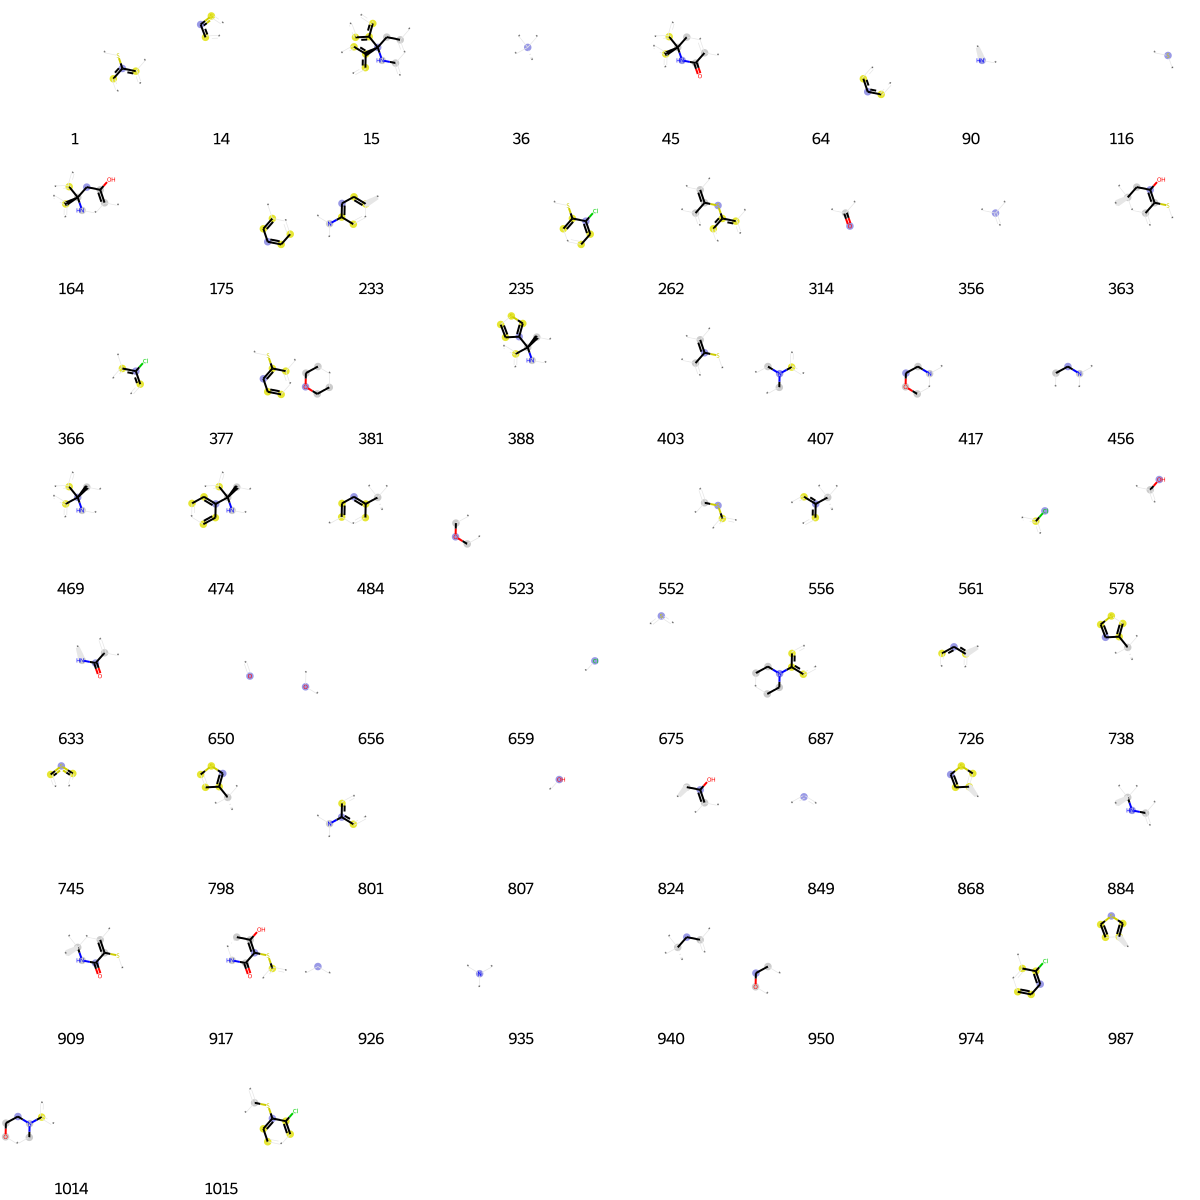

In [10998]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [11090]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 33,
 34,
 43,
 64,
 73,
 80,
 128,
 140,
 156,
 162,
 175,
 179,
 191,
 206,
 289,
 294,
 308,
 341,
 356,
 360,
 378,
 385,
 413,
 461,
 489,
 491,
 500,
 520,
 548,
 557,
 564,
 579,
 651,
 664,
 675,
 716,
 722,
 726,
 727,
 800,
 829,
 831,
 843,
 849,
 885,
 932,
 935,
 980]

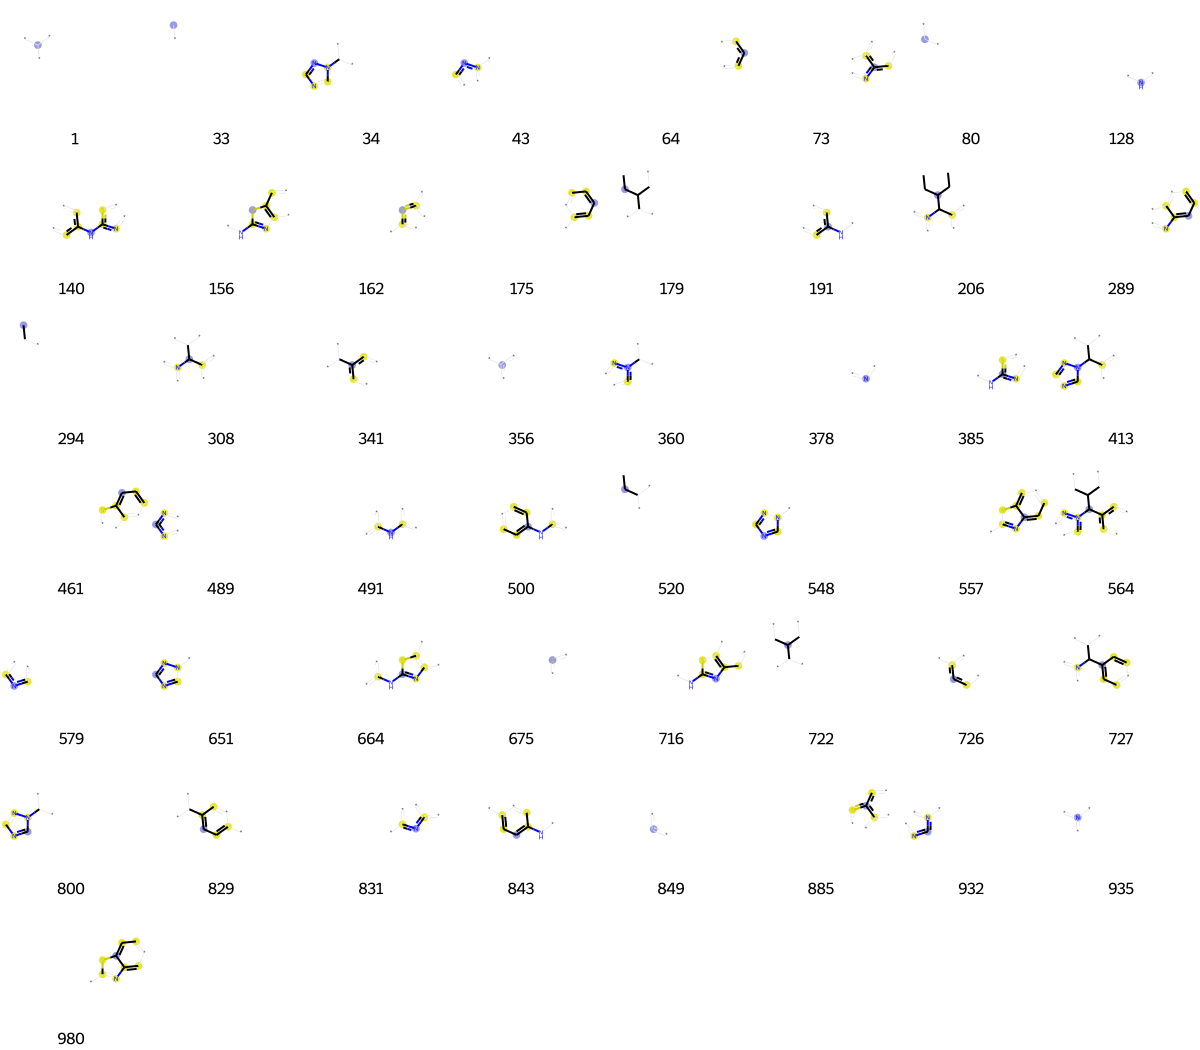

In [11000]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [11091]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[33,
 41,
 71,
 80,
 102,
 120,
 128,
 152,
 194,
 209,
 221,
 228,
 229,
 282,
 294,
 333,
 336,
 343,
 351,
 356,
 358,
 362,
 367,
 378,
 400,
 428,
 444,
 450,
 473,
 489,
 495,
 499,
 519,
 540,
 553,
 577,
 639,
 650,
 656,
 672,
 682,
 695,
 700,
 708,
 786,
 792,
 794,
 795,
 807,
 810,
 833,
 849,
 880,
 893,
 897,
 899,
 926,
 932,
 935,
 990,
 1019,
 1023]

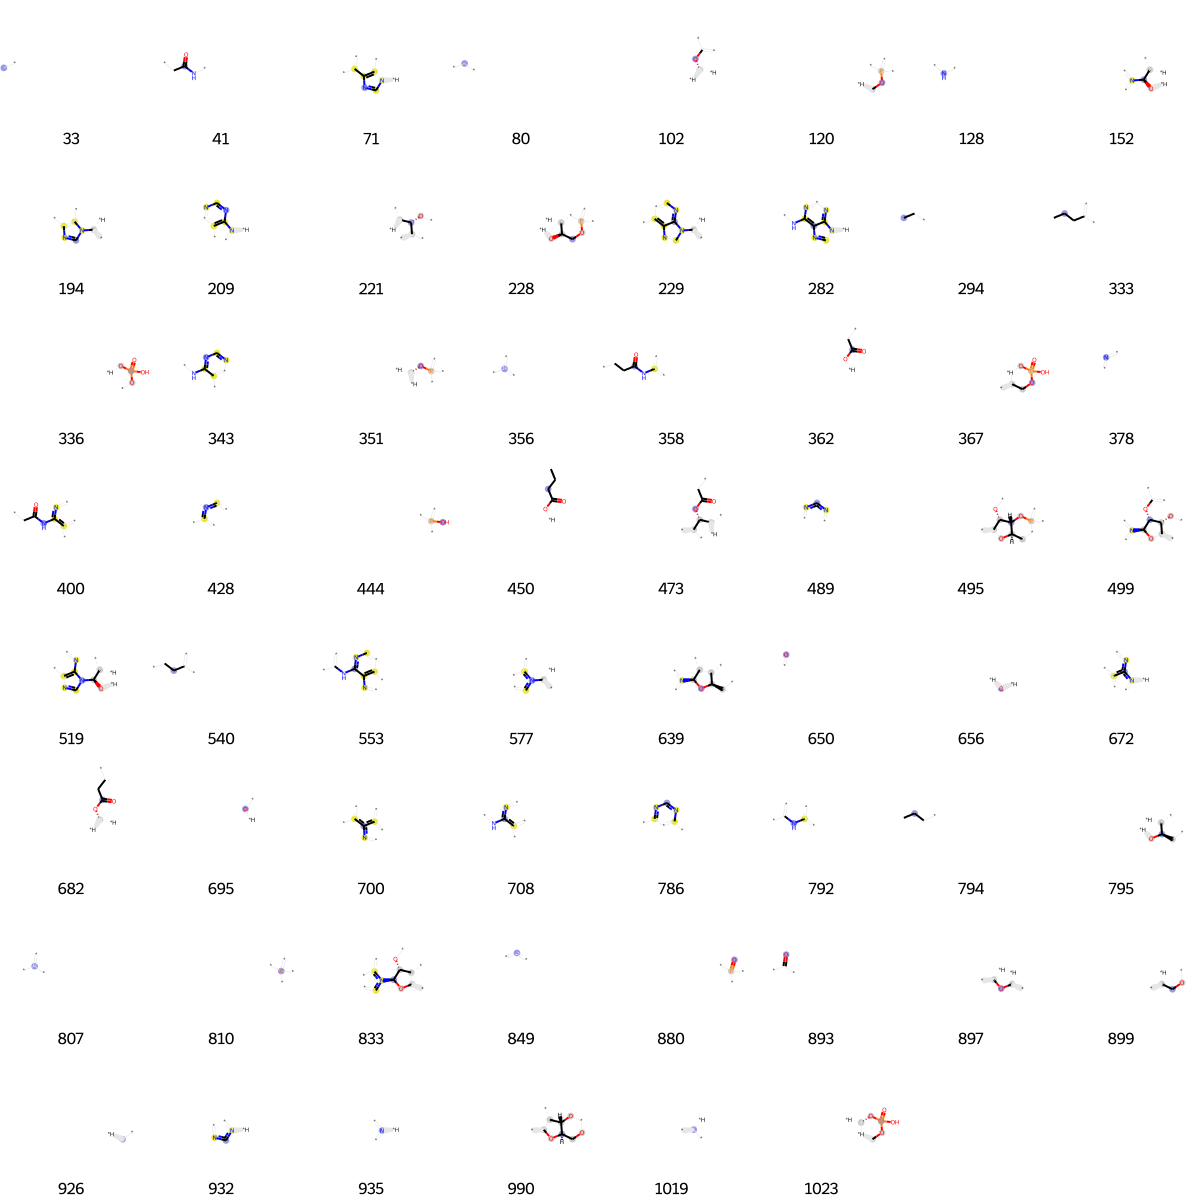

In [11002]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [11092]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 2,
 4,
 33,
 36,
 80,
 126,
 130,
 138,
 139,
 300,
 322,
 341,
 356,
 512,
 565,
 614,
 652,
 695,
 708,
 718,
 726,
 738,
 781,
 807,
 820,
 829,
 831,
 836,
 841,
 849,
 881,
 926,
 932,
 980]

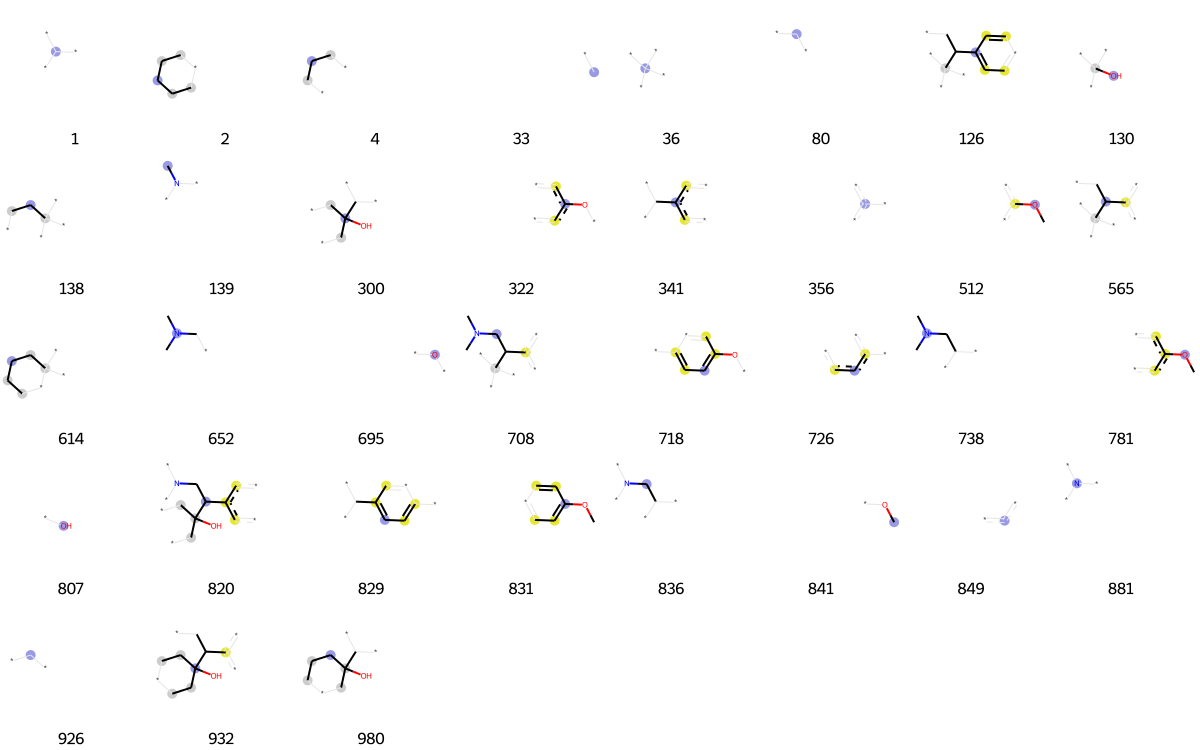

In [11004]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [11093]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[15,
 33,
 64,
 80,
 83,
 121,
 147,
 172,
 174,
 179,
 209,
 241,
 271,
 296,
 309,
 324,
 325,
 352,
 356,
 361,
 363,
 377,
 378,
 385,
 394,
 413,
 421,
 428,
 433,
 435,
 453,
 456,
 459,
 464,
 489,
 512,
 548,
 650,
 672,
 680,
 698,
 699,
 707,
 714,
 719,
 724,
 726,
 734,
 752,
 786,
 807,
 831,
 849,
 891,
 893,
 904,
 926,
 935,
 960,
 1009]

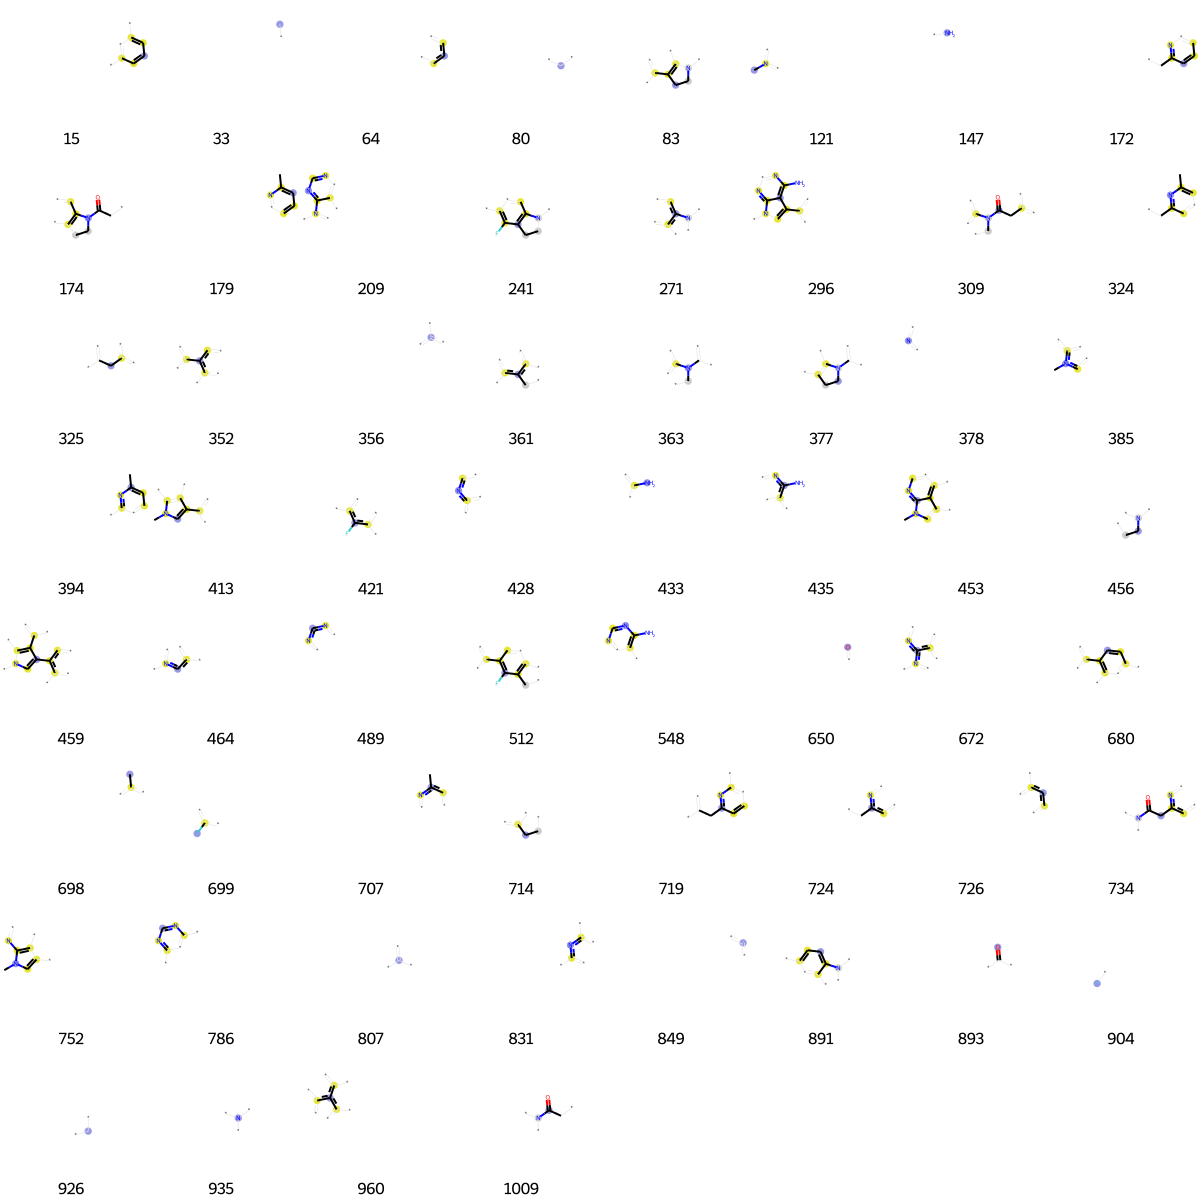

In [11006]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [11094]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[21,
 33,
 53,
 63,
 64,
 72,
 73,
 80,
 115,
 121,
 128,
 168,
 175,
 191,
 194,
 200,
 212,
 218,
 219,
 221,
 231,
 249,
 289,
 303,
 310,
 356,
 361,
 378,
 384,
 428,
 456,
 486,
 502,
 511,
 512,
 649,
 650,
 653,
 695,
 714,
 726,
 730,
 744,
 767,
 771,
 774,
 792,
 807,
 831,
 841,
 843,
 847,
 849,
 864,
 875,
 893,
 910,
 922,
 926,
 935,
 946,
 947,
 954,
 967,
 997]

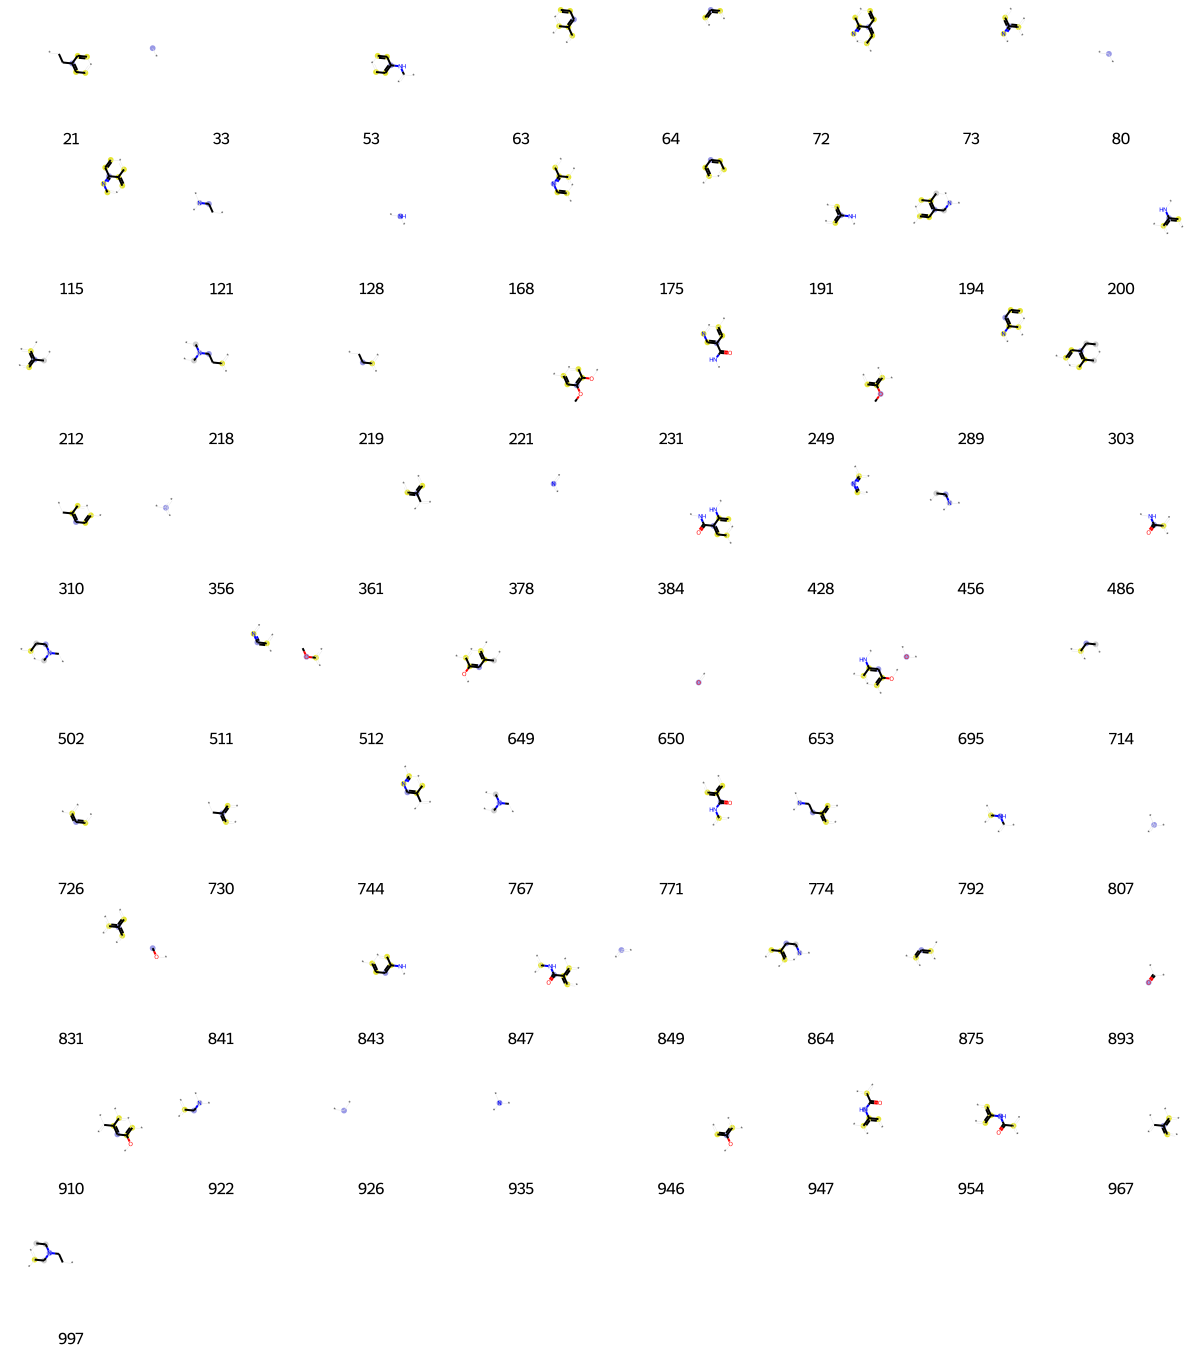

In [11008]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [11095]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[13,
 15,
 23,
 33,
 43,
 49,
 64,
 73,
 80,
 94,
 99,
 102,
 128,
 139,
 141,
 151,
 156,
 161,
 162,
 175,
 212,
 219,
 249,
 289,
 293,
 314,
 317,
 353,
 356,
 361,
 378,
 385,
 389,
 393,
 407,
 423,
 428,
 430,
 444,
 456,
 461,
 486,
 488,
 490,
 494,
 557,
 577,
 599,
 624,
 641,
 650,
 652,
 674,
 675,
 684,
 695,
 699,
 703,
 714,
 716,
 726,
 786,
 792,
 804,
 807,
 816,
 827,
 831,
 847,
 849,
 864,
 875,
 881,
 885,
 887,
 892,
 893,
 904,
 921,
 922,
 926,
 930,
 932,
 935,
 946,
 967,
 979,
 980]

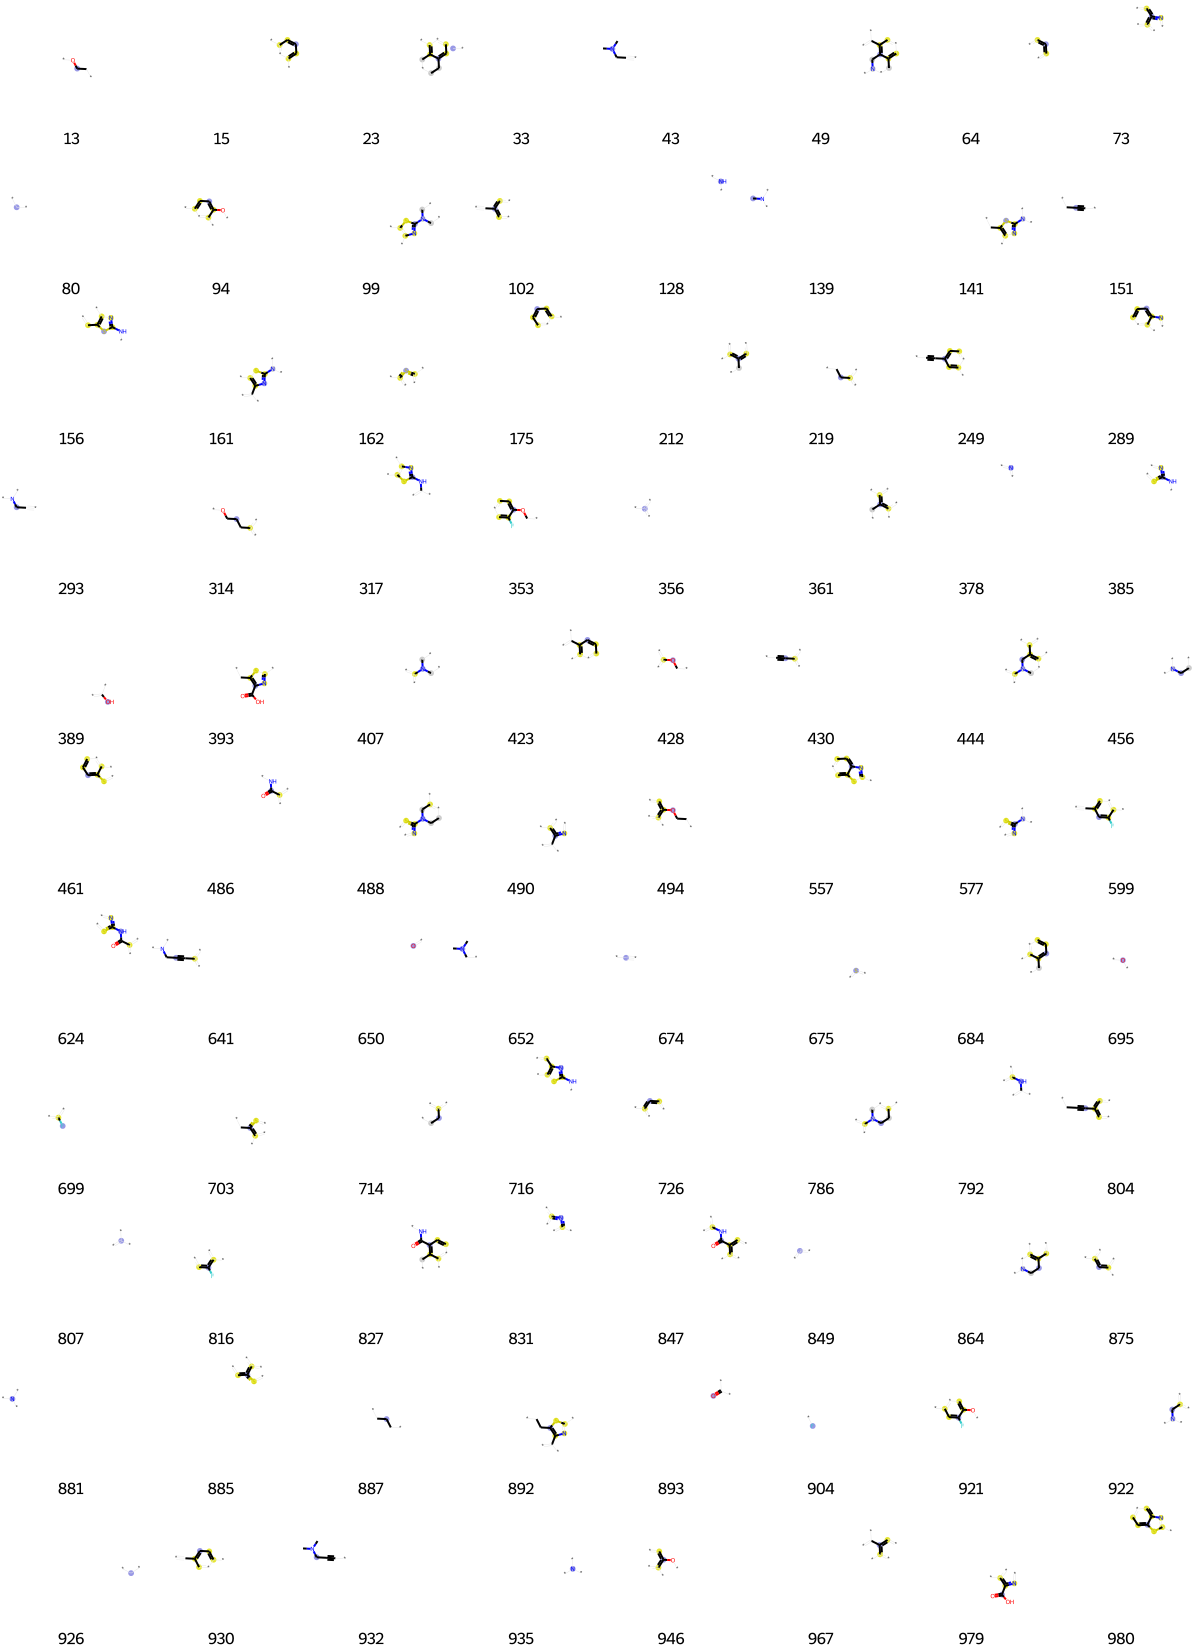

In [11010]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [11096]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 42,
 45,
 64,
 73,
 80,
 90,
 102,
 110,
 118,
 127,
 136,
 155,
 175,
 261,
 284,
 289,
 301,
 305,
 314,
 322,
 335,
 339,
 356,
 357,
 378,
 382,
 389,
 403,
 421,
 428,
 442,
 479,
 490,
 492,
 585,
 659,
 682,
 695,
 698,
 718,
 726,
 730,
 736,
 741,
 802,
 804,
 831,
 849,
 862,
 888,
 896,
 926,
 935,
 954,
 1019]

In [11097]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 15,
 33,
 42,
 43,
 64,
 79,
 80,
 81,
 105,
 114,
 117,
 121,
 128,
 147,
 162,
 216,
 230,
 265,
 267,
 289,
 298,
 308,
 315,
 324,
 352,
 356,
 366,
 378,
 409,
 419,
 439,
 463,
 472,
 483,
 486,
 511,
 551,
 561,
 646,
 650,
 659,
 675,
 699,
 720,
 726,
 730,
 748,
 807,
 849,
 875,
 885,
 893,
 904,
 911,
 935,
 966,
 981]

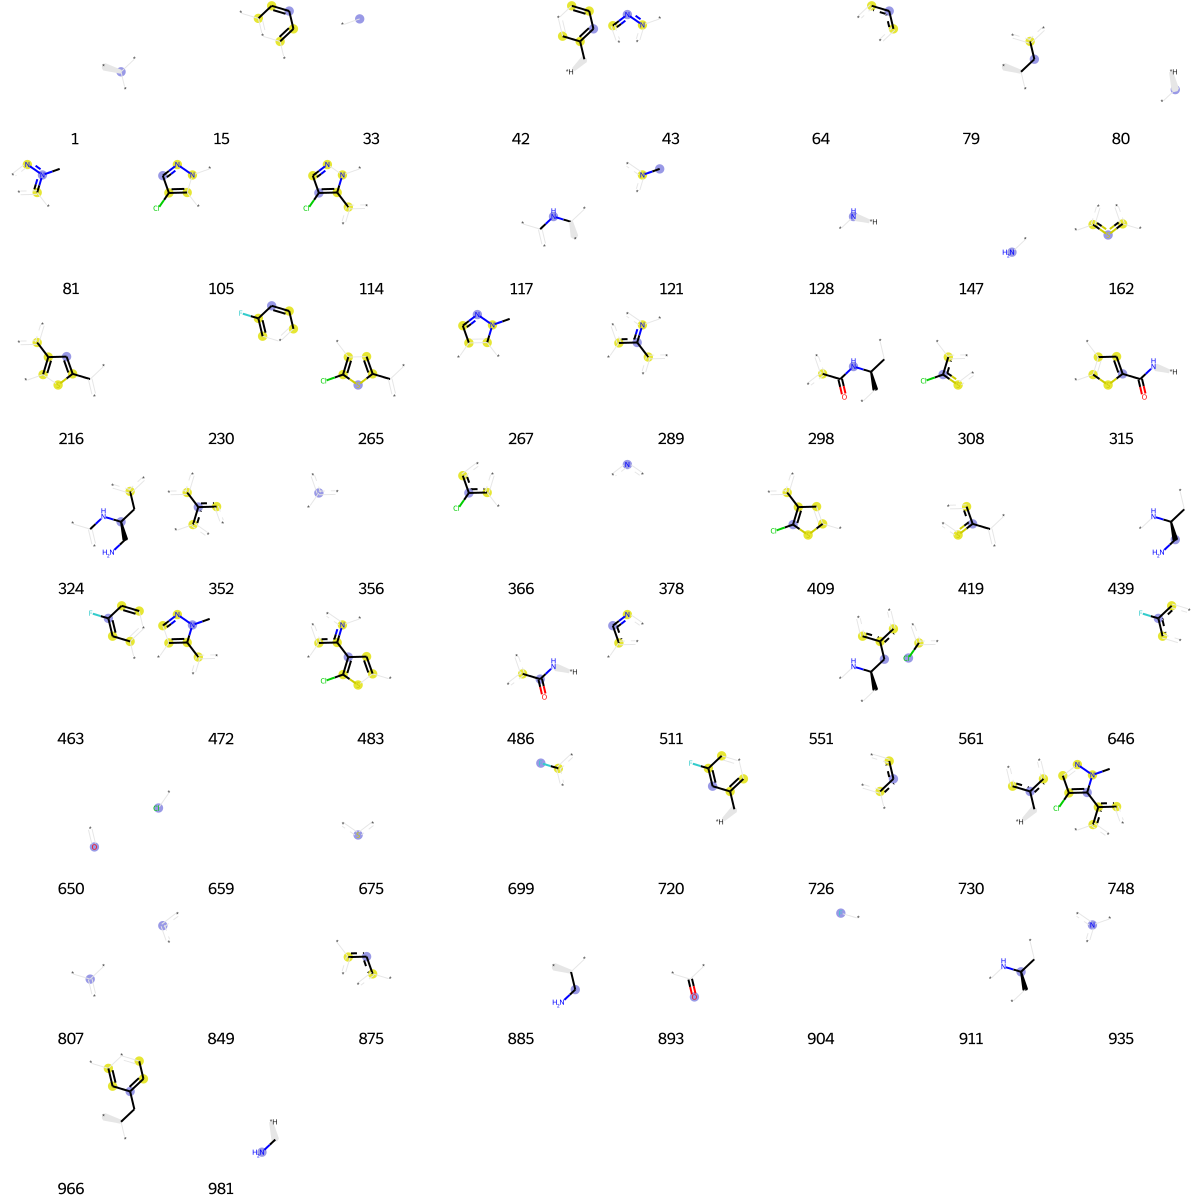

In [11098]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [11099]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[15,
 29,
 33,
 64,
 80,
 89,
 125,
 128,
 136,
 138,
 147,
 152,
 157,
 179,
 252,
 260,
 299,
 314,
 316,
 352,
 356,
 366,
 378,
 394,
 406,
 428,
 474,
 504,
 511,
 544,
 558,
 561,
 581,
 608,
 622,
 650,
 656,
 658,
 659,
 660,
 671,
 672,
 680,
 698,
 707,
 726,
 770,
 802,
 806,
 808,
 827,
 829,
 831,
 849,
 875,
 876,
 896,
 899,
 908,
 910,
 926,
 935,
 980,
 997,
 1012,
 1019]

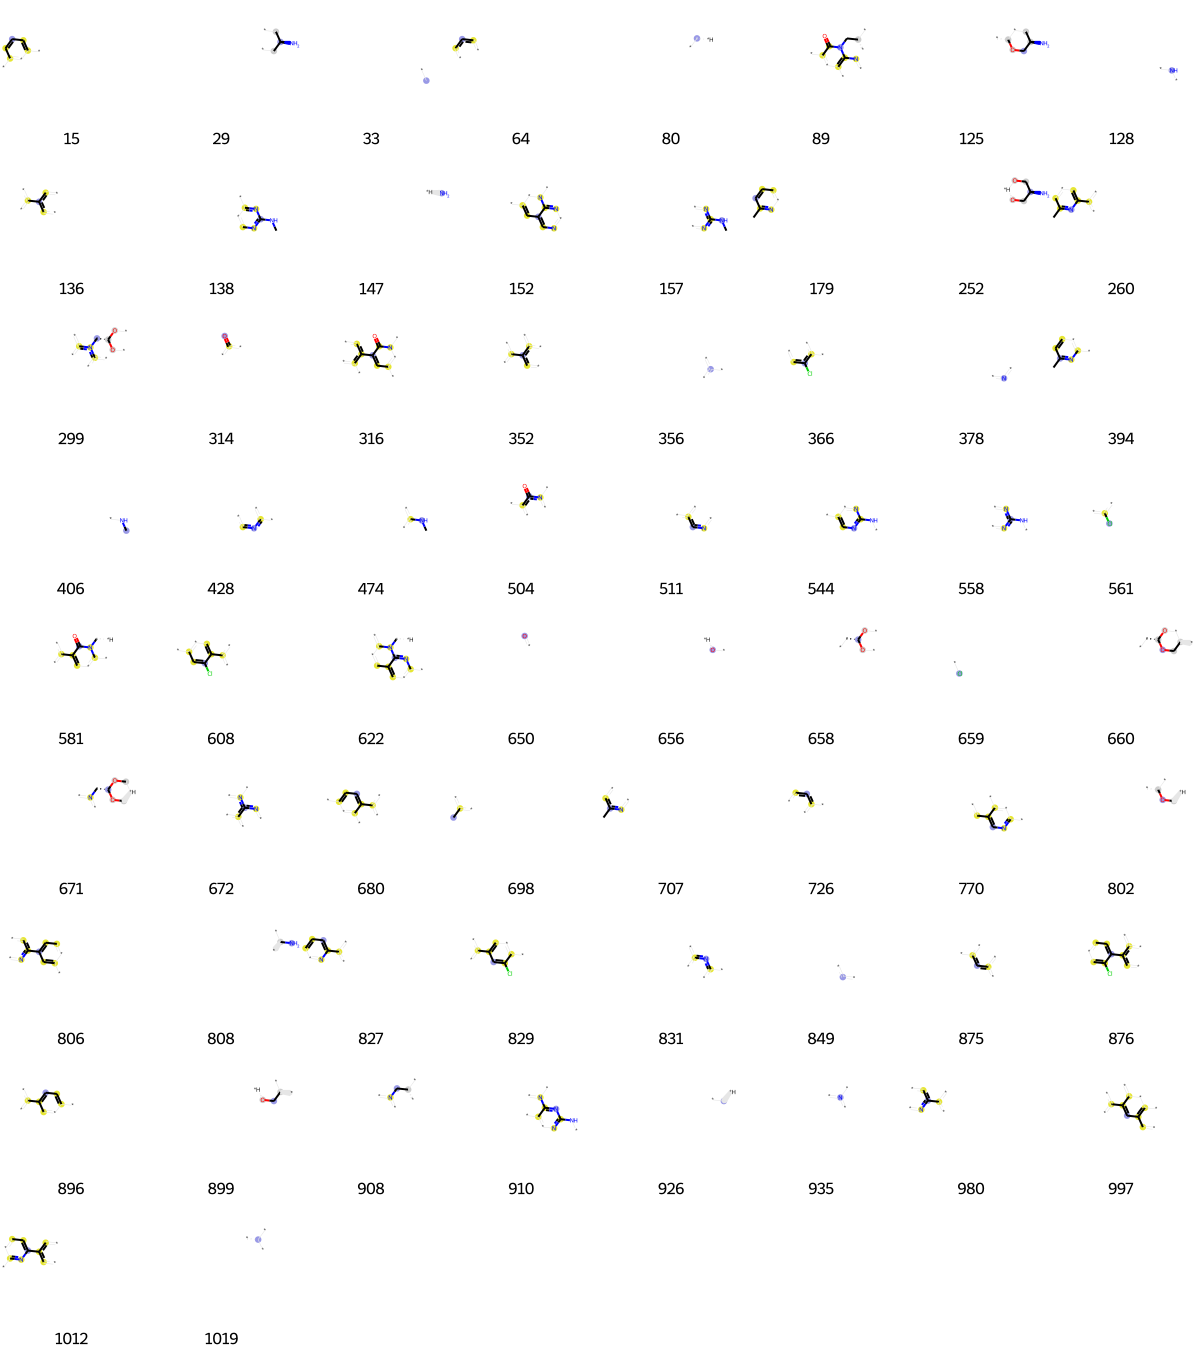

In [11100]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [11101]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 34,
 71,
 80,
 112,
 127,
 128,
 143,
 150,
 167,
 191,
 208,
 279,
 282,
 294,
 351,
 356,
 360,
 378,
 428,
 429,
 431,
 475,
 491,
 516,
 551,
 646,
 672,
 674,
 699,
 700,
 708,
 749,
 767,
 790,
 815,
 831,
 849,
 875,
 888,
 904,
 932,
 935]

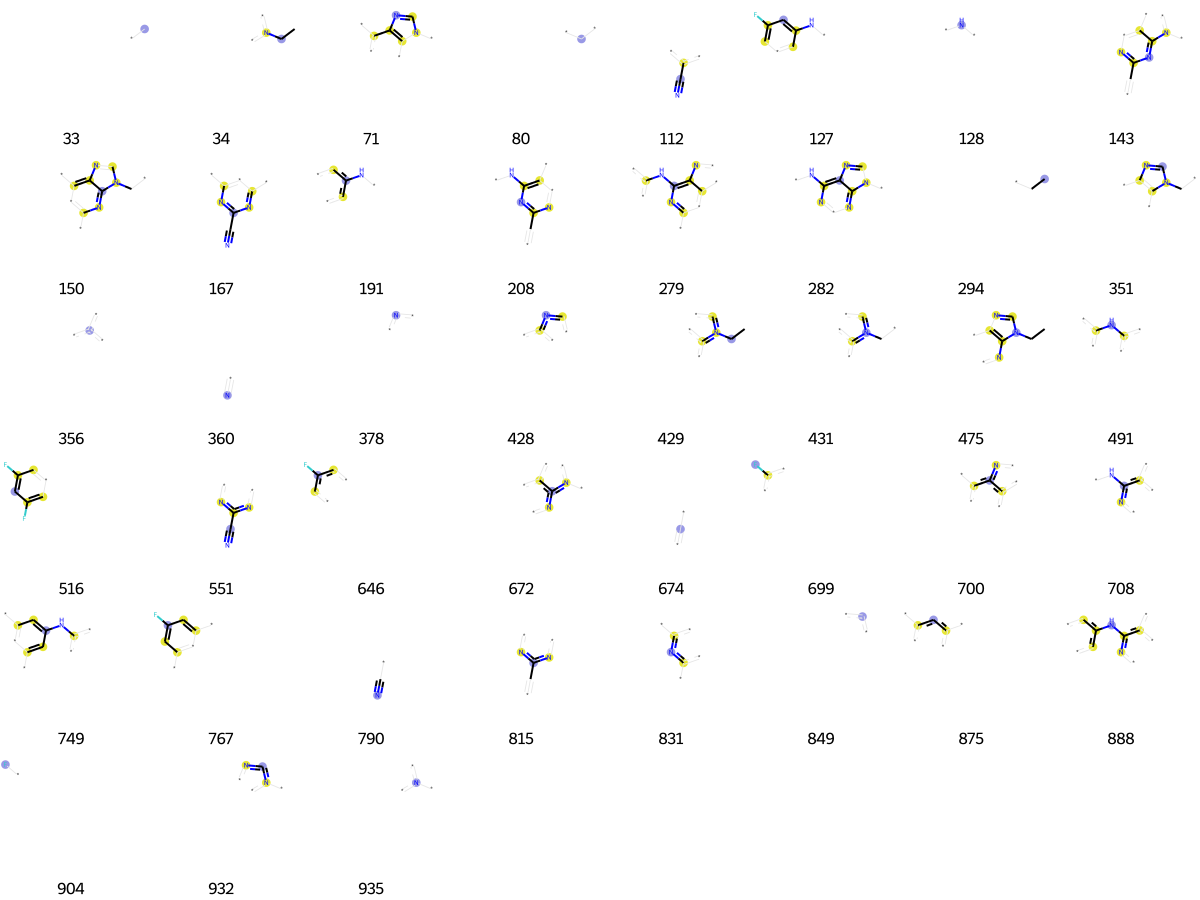

In [11102]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [11103]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 43,
 45,
 58,
 67,
 68,
 80,
 81,
 90,
 94,
 118,
 121,
 128,
 136,
 159,
 175,
 181,
 184,
 191,
 233,
 267,
 313,
 314,
 326,
 352,
 356,
 378,
 386,
 391,
 486,
 504,
 511,
 576,
 593,
 609,
 616,
 646,
 650,
 654,
 671,
 695,
 698,
 699,
 726,
 739,
 792,
 801,
 807,
 808,
 816,
 831,
 843,
 847,
 849,
 855,
 875,
 883,
 893,
 904,
 915,
 921,
 935,
 938,
 946,
 954,
 967,
 969,
 1009]

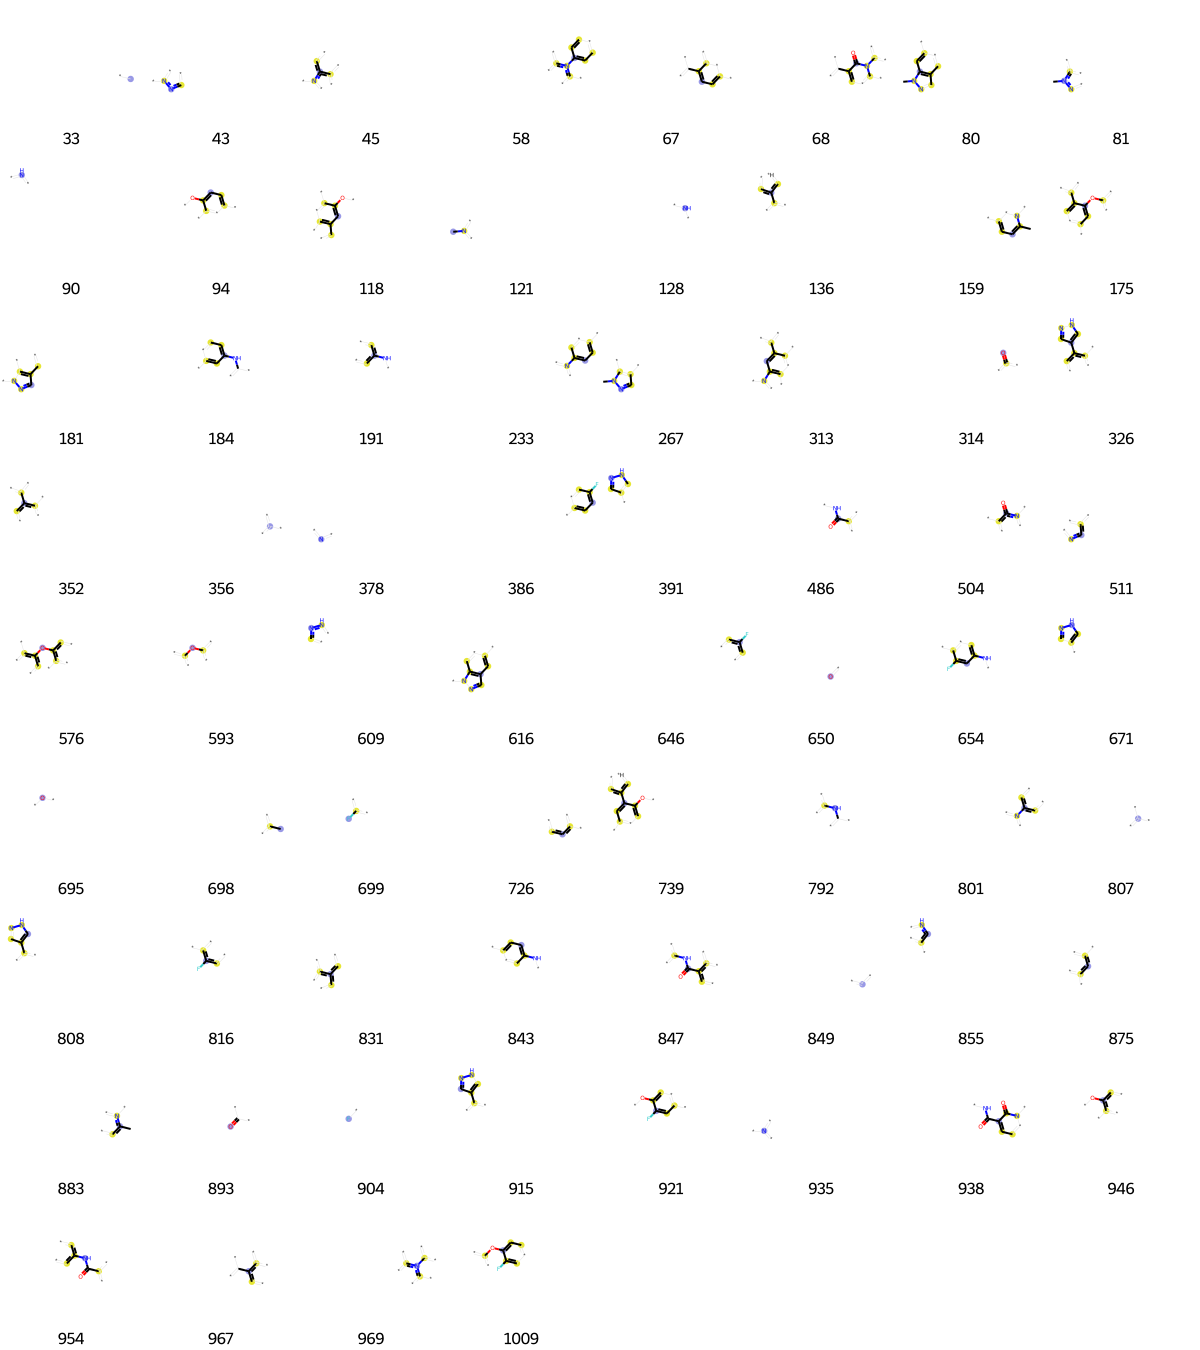

In [11104]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [11105]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 41,
 80,
 86,
 117,
 128,
 140,
 144,
 147,
 197,
 229,
 263,
 266,
 321,
 351,
 389,
 412,
 416,
 435,
 551,
 573,
 600,
 650,
 675,
 691,
 713,
 719,
 720,
 725,
 736,
 739,
 786,
 798,
 807,
 820,
 825,
 849,
 865,
 875,
 887,
 893,
 902,
 978,
 980,
 992,
 996,
 1018]

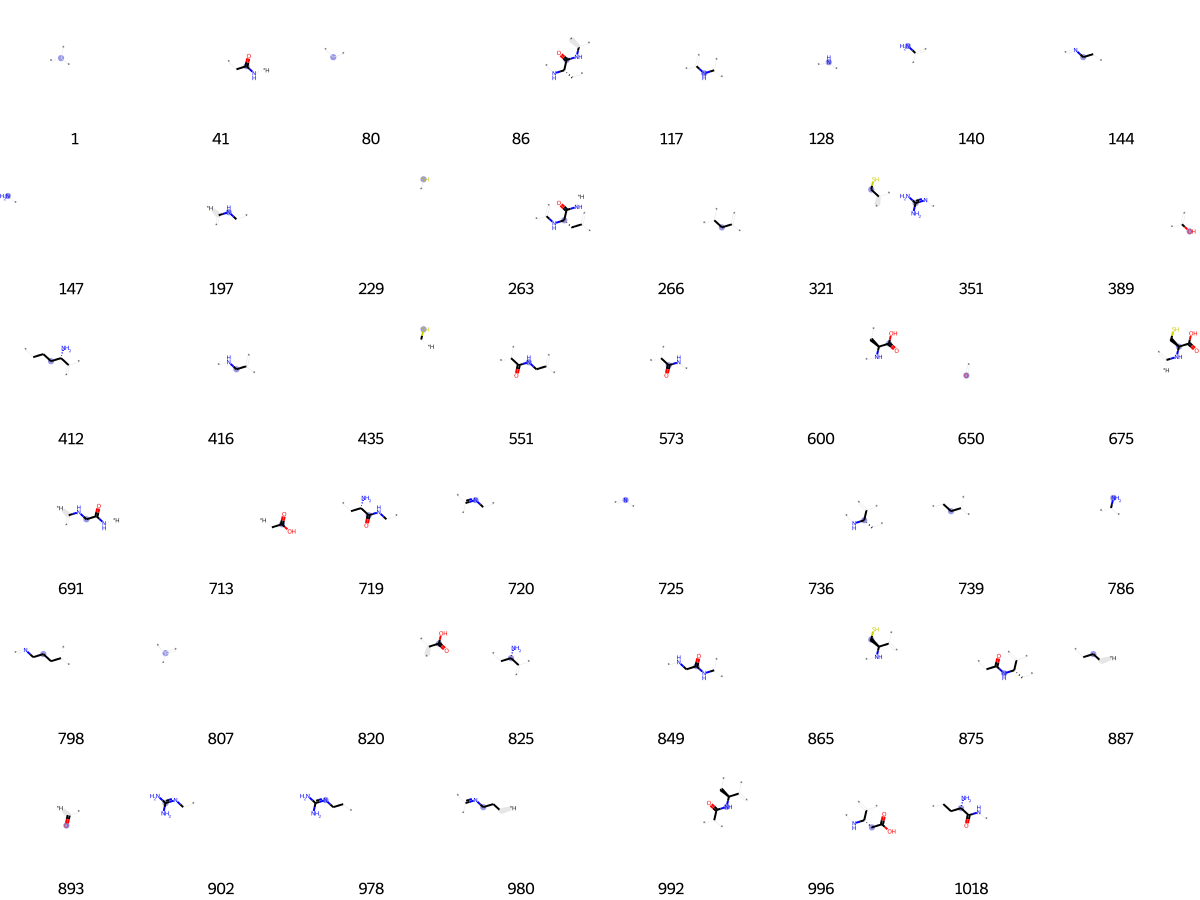

In [11106]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [11107]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 2,
 4,
 8,
 13,
 33,
 59,
 73,
 80,
 82,
 119,
 121,
 128,
 133,
 140,
 144,
 157,
 221,
 232,
 241,
 249,
 283,
 301,
 333,
 335,
 356,
 378,
 398,
 407,
 428,
 440,
 456,
 458,
 484,
 494,
 512,
 558,
 565,
 593,
 603,
 610,
 624,
 644,
 653,
 680,
 688,
 695,
 708,
 747,
 767,
 780,
 796,
 827,
 830,
 831,
 841,
 849,
 875,
 886,
 887,
 890,
 891,
 903,
 926,
 935,
 946,
 969,
 974,
 1018,
 1019]

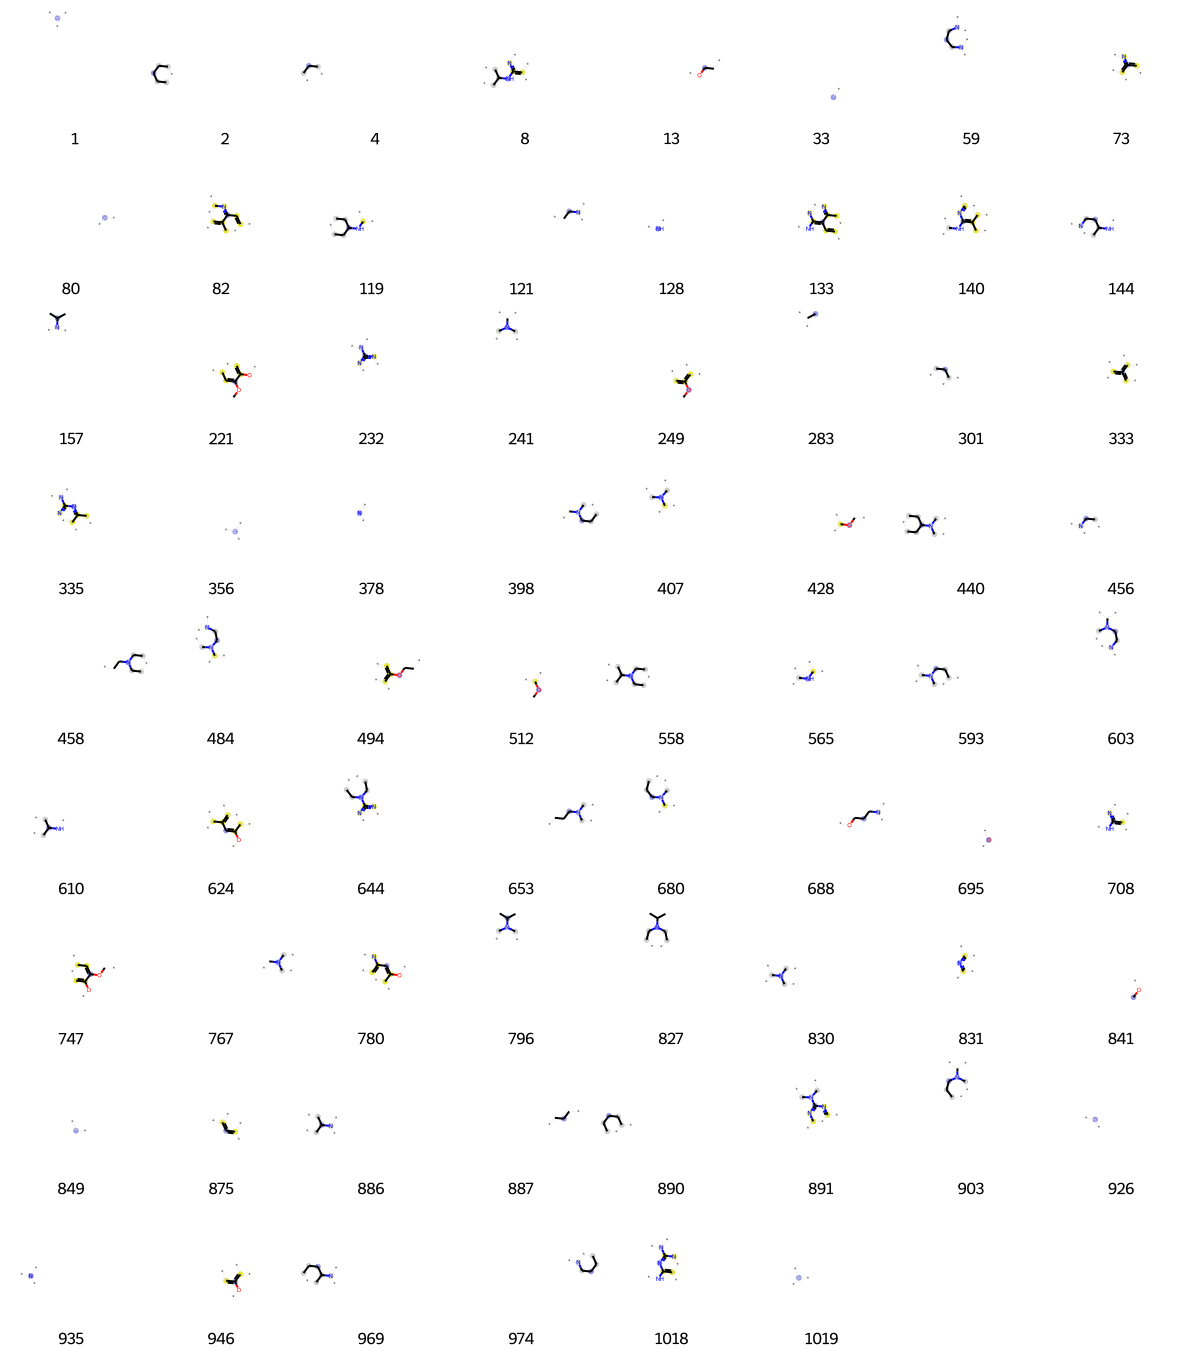

In [11108]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [11109]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[25,
 31,
 33,
 144,
 249,
 284,
 356,
 389,
 451,
 508,
 512,
 578,
 583,
 614,
 650,
 694,
 695,
 726,
 804,
 807,
 835,
 841,
 849,
 875,
 893,
 946,
 970,
 976,
 1009,
 1017]

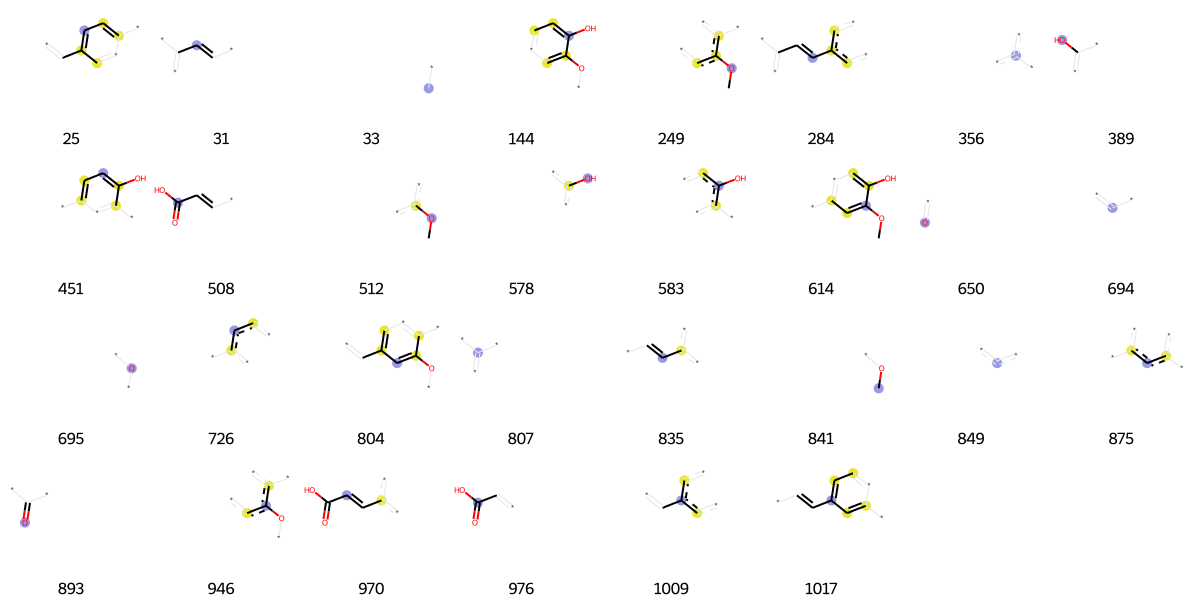

In [11110]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [11111]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 13,
 80,
 83,
 178,
 210,
 216,
 222,
 227,
 233,
 299,
 306,
 357,
 387,
 389,
 411,
 413,
 463,
 481,
 482,
 489,
 492,
 610,
 650,
 656,
 695,
 740,
 767,
 807,
 820,
 829,
 831,
 888,
 893,
 897,
 953,
 1019]

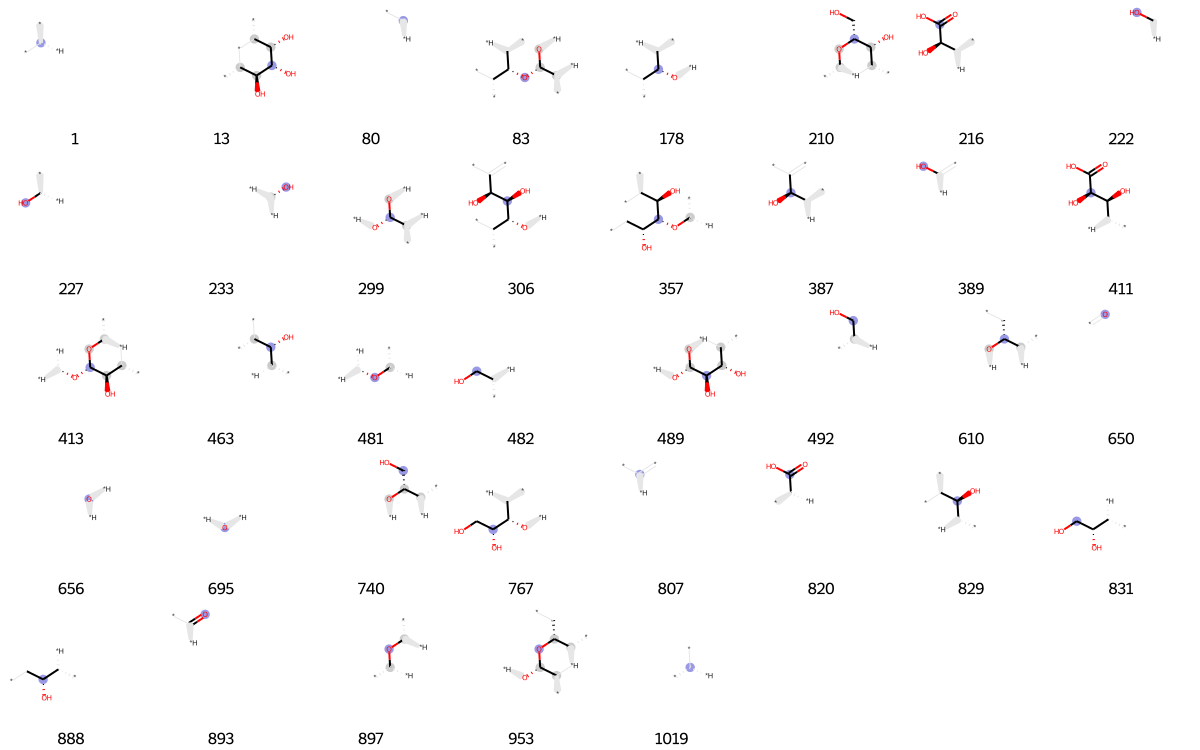

In [11112]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [11113]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[3,
 15,
 33,
 36,
 49,
 105,
 118,
 138,
 212,
 233,
 250,
 289,
 301,
 356,
 381,
 408,
 453,
 455,
 519,
 561,
 562,
 578,
 622,
 636,
 713,
 714,
 726,
 728,
 745,
 760,
 807,
 823,
 849,
 875,
 887,
 917,
 926,
 927,
 1019]

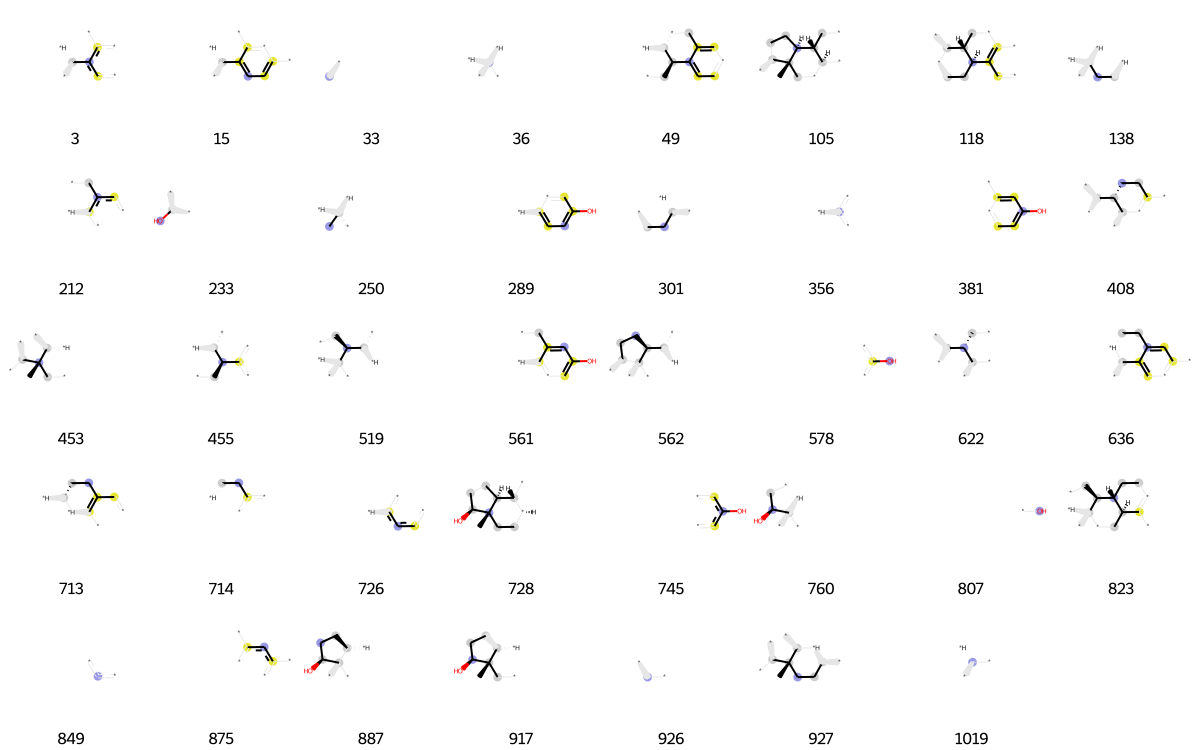

In [11114]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [11115]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 36,
 94,
 114,
 135,
 136,
 203,
 204,
 225,
 249,
 250,
 258,
 268,
 288,
 322,
 356,
 361,
 389,
 422,
 456,
 512,
 578,
 650,
 673,
 675,
 679,
 695,
 726,
 785,
 807,
 831,
 841,
 849,
 875,
 893,
 896,
 926,
 946,
 952,
 956,
 980,
 1019]

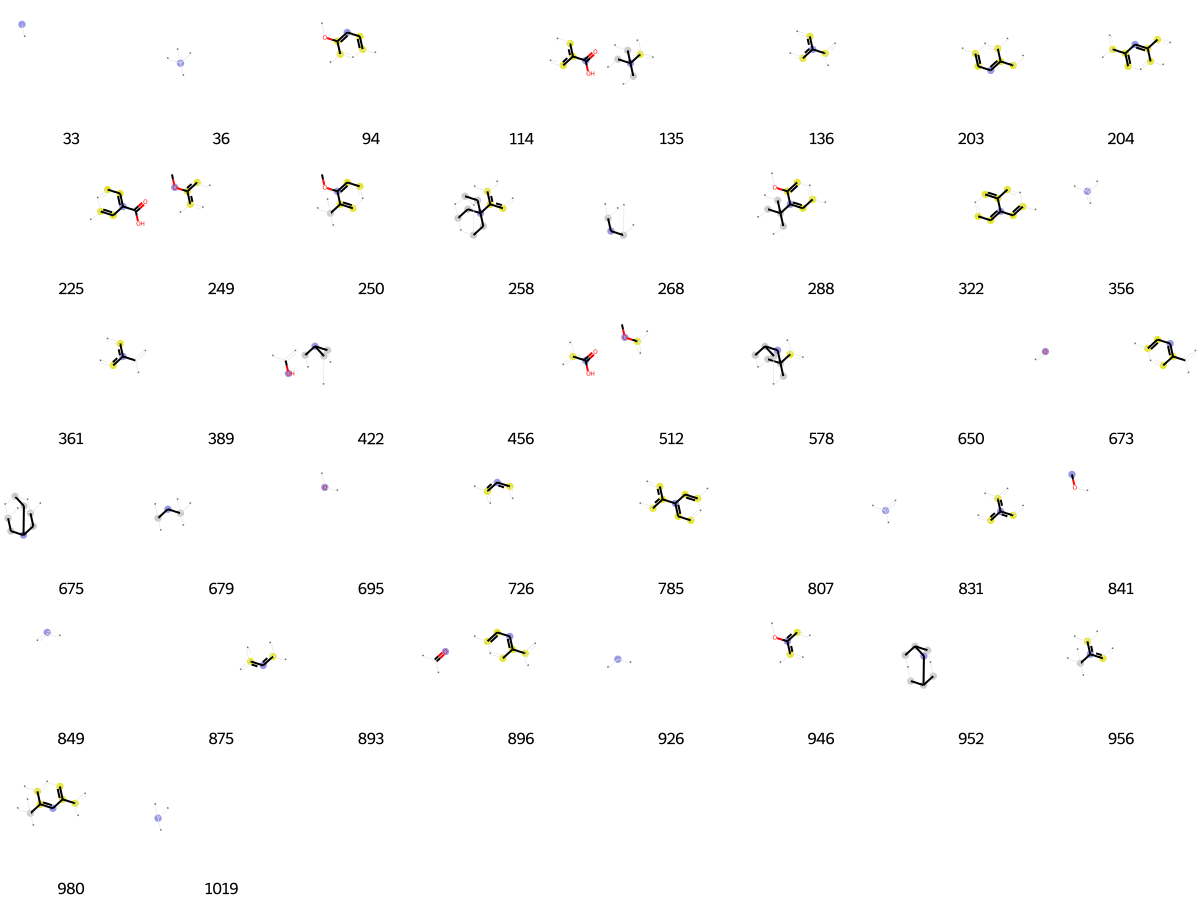

In [11116]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [11117]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[11,
 15,
 32,
 33,
 36,
 41,
 62,
 64,
 75,
 114,
 128,
 136,
 138,
 166,
 225,
 251,
 258,
 278,
 292,
 300,
 310,
 323,
 356,
 361,
 367,
 378,
 389,
 410,
 456,
 484,
 546,
 556,
 650,
 656,
 657,
 667,
 675,
 682,
 698,
 708,
 726,
 728,
 736,
 737,
 792,
 806,
 807,
 831,
 849,
 875,
 881,
 893,
 904,
 905,
 926,
 961,
 967,
 990]

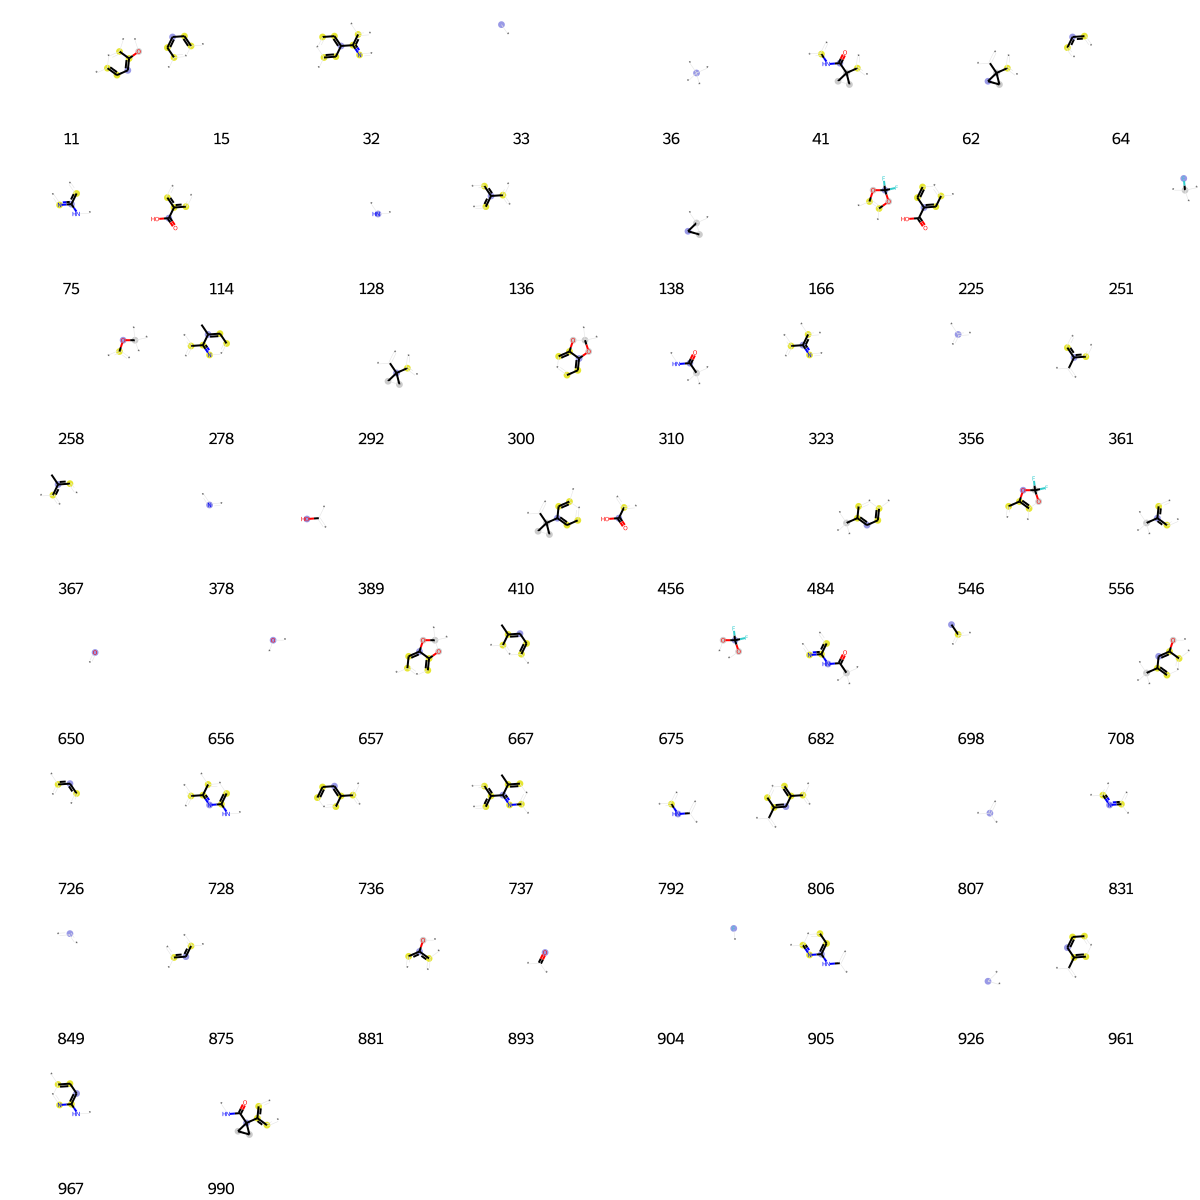

In [11118]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])